## KHÁM PHÁ DỮ LIỆU

### 1. Đọc dữ liệu, tính số dòng và cột

Đầu tiên, ta import các thư viện cần thiết.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# .. import more libraries

Tiếp đến đọc các file điểm thi của các năm và lưu vào các dataframe tương ứng. Sau đó in ra 5 dòng đầu tiên.

In [2]:
grade_df = {}
grade_df['2020'] = pd.read_csv('diemthi2020_final.csv', index_col=0)
grade_df['2020'].head()

SBD Tỉnh/Thành phố  Toán   Văn   Lí  Hóa  Sinh  TB-KHTN    Sử   Địa  \
0  18014547      BẮC GIANG   6.4  6.75  NaN  NaN   NaN      NaN  4.75  7.00   
1  18014530      BẮC GIANG   7.6  6.00  NaN  NaN   NaN      NaN  3.75  7.75   
2  18014521      BẮC GIANG   4.8  4.75  NaN  NaN   NaN      NaN  4.00  6.50   
3  18014517      BẮC GIANG   8.0  7.00  NaN  NaN   NaN      NaN  8.25  8.00   
4  18014523      BẮC GIANG   8.2  6.50  8.0  8.5   5.0     7.17   NaN   NaN   

   GDCD  TB-KHXH  Ngoại ngữ  
0  6.50     6.08        4.2  
1  7.75     6.42        2.8  
2   NaN     5.25        NaN  
3  9.50     8.58        5.8  
4   NaN      NaN        4.0

In [3]:
grade_df['2021'] = pd.read_csv('diemthi2021_final.csv', index_col=0)
grade_df['2021'].head()

SBD  Toán    Lí   Hóa  Sinh    Sử   Địa   Văn  GDCD  Ngoại ngữ  \
0  1000002   9.2   NaN   NaN   NaN  5.75  9.75  8.25  9.25       10.0   
1  1000003   4.4   NaN   NaN   NaN  4.25  4.00  6.25   NaN        NaN   
2  1000004   8.4  4.00  3.00  3.50   NaN   NaN  6.75   NaN       10.0   
3  1000005   8.8  8.25  5.75  5.25   NaN   NaN  8.25   NaN        9.4   
4  1000006   8.0   NaN   NaN   NaN  5.00  6.50  8.75  9.25        8.6   

  Tỉnh/Thành phố  TB-KHTN  TB-KHXH  
0         HÀ NỘI      NaN     8.25  
1         HÀ NỘI      NaN      NaN  
2         HÀ NỘI     3.50      NaN  
3         HÀ NỘI     6.42      NaN  
4         HÀ NỘI      NaN     6.92

In [4]:
grade_df['2022'] = pd.read_csv('diemthi2022_final.csv', index_col=0)
grade_df['2022'].head()

SBD  Toán   Văn  Ngoại ngữ  Lí  Hóa  Sinh    Sử  Địa  GDCD  \
0  1000001   3.6  5.00        4.0 NaN  NaN   NaN  2.75  6.0  8.75   
1  1000002   8.4  6.75        7.6 NaN  NaN   NaN  8.50  7.5  8.25   
2  1000003   5.8  7.50        5.0 NaN  NaN   NaN  7.25  5.5  8.75   
3  1000004   7.4  7.50        8.6 NaN  NaN   NaN  7.50  6.5  7.50   
4  1000005   7.2  8.50        9.0 NaN  NaN   NaN  8.00  8.5  8.25   

  Tỉnh/Thành phố  TB-KHTN  TB-KHXH  
0         HÀ NỘI      NaN     5.83  
1         HÀ NỘI      NaN     8.08  
2         HÀ NỘI      NaN     7.17  
3         HÀ NỘI      NaN     7.17  
4         HÀ NỘI      NaN     8.25

Tính số dòng, số cột và lưu vào 2 biến `n_rows` và `n_cols`.

In [5]:
n_rows = {}
n_cols = {}
for year in grade_df.keys():
    n_rows[year], n_cols[year] = grade_df[year].shape
    print(f'Number of rows in {year}: {n_rows[year]}')
    print(f'Number of columns in {year}: {n_cols[year]}')

Number of rows in 2020: 870486
Number of columns in 2020: 13
Number of rows in 2021: 960902
Number of columns in 2021: 13
Number of rows in 2022: 995441
Number of columns in 2022: 13


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu này tương ứng với điểm thi các môn của một thí sinh riêng biệt. Gồm các môn Toán, Ngữ Văn, Ngoại Ngữ, Vật Lý, Hóa Học, Sinh Học, Lịch Sử, Địa Lý, GDCD và điểm trung bình các tổ hợp môn.
Do vậy, ta có thể thấy rằng không có dòng nào bị "lạc loài".

### 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương `duplicated()` và `any()` trên các dataframe `grade_df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược.

In [6]:
have_duplicate_rows = {}
for year in grade_df.keys():
    have_duplicate_rows[year] = grade_df[year].duplicated().any()
    print(f'Have duplicate rows in {year}: {have_duplicate_rows[year]}')

Have duplicate rows in 2020: False
Have duplicate rows in 2021: False
Have duplicate rows in 2022: False


Như vậy ta thấy rằng dữ liệu không có các dòng bị lặp.

### 4. Kiểu dữ liệu của mỗi cột

Ta sử dụng phương thức `dtypes` trên `grade_df` để xem kiểu dữ liệu của mỗi cột. Kết quả được lưu vào dataframe `col_dtypes`; dataframe này có tên dòng là các năm và tên cột là các cột trong `grade_df`.

In [7]:
col_dtypes = {}
for year in grade_df.keys():
    col_dtypes[year] = grade_df[year].dtypes
col_dtypes = pd.DataFrame(col_dtypes).T
col_dtypes

GDCD      Hóa       Lí Ngoại ngữ    SBD     Sinh       Sử  TB-KHTN  \
2020  float64  float64  float64   float64  int64  float64  float64  float64   
2021  float64  float64  float64   float64  int64  float64  float64  float64   
2022  float64  float64  float64   float64  int64  float64  float64  float64   

      TB-KHXH     Toán Tỉnh/Thành phố      Văn      Địa  
2020  float64  float64         object  float64  float64  
2021  float64  float64         object  float64  float64  
2022  float64  float64         object  float64  float64

Có thể thấy, kiểu dữ liệu các cột ở ba năm đều giống nhau. Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp, nên không cần phải xử lý.

### 5. Xem xét sự phân bố giá trị của các cột dữ liệu dạng số.

Ta cần xem xét đến các giá trị thiếu trong dữ liệu:
- Không thực hiện thống kê trên 3 cột SBD, Unnamed và Tỉnh/Thành phố do các cột này không có ý nghĩa và cột Tỉnh/Thành phố không phải dạng số và sẽ được xem xét sau.
- Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức `isnull()` trên dataframe `grade_df` và tính tổng số giá trị thiếu của từng cột bằng phương thức `sum()`. 
- Cuối cùng ta chia số dòng và lưu kết quả vào `missing_ratio`.

In [8]:
missing_ratio = {}
for year in grade_df.keys():
    missing_ratio[year] = grade_df[year].select_dtypes(include=['float64']).isnull().sum() / n_rows[year]
missing_ratio = pd.DataFrame(missing_ratio).T
missing_ratio

GDCD       Hóa        Lí  Ngoại ngữ      Sinh        Sử   TB-KHTN  \
2020  0.445161  0.660493  0.663077   0.113027  0.666420  0.346823  0.658150   
2021  0.460029  0.651471  0.653136   0.122572  0.657041  0.354898  0.660342   
2022  0.443118  0.671134  0.672986   0.125404  0.676326  0.337317  0.679855   

       TB-KHXH      Toán       Văn       Địa  
2020  0.346564  0.004486  0.015992  0.362342  
2021  0.460237  0.010607  0.013516  0.360770  
2022  0.443372  0.012773  0.014098  0.339568

Có thể thấy, các cột phân loại như `SBD`, `Tỉnh/Thành phố`, `Unnamed` (tương ứng với số thứ tự) đều có tỉ lệ giá trị thiếu là 0. Các cột còn lại đều là cột điểm thi và có tỉ lệ giá trị thiếu khác 0. Điều này cho thấy rằng có một số thí sinh không thi một số môn nào đó và không ảnh hưởng đến việc phân tích sau này.

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()` trên `grade_df`.

In [9]:
print(f'Descriptive statistics of 2020:')
grade_df['2020'].describe()

Descriptive statistics of 2020:


SBD           Toán            Văn             Lí  \
count  8.704860e+05  866581.000000  856565.000000  293287.000000   
mean   2.800845e+07       6.662271       6.601825       6.718001   
std    1.898843e+07       1.819042       1.248463       1.497900   
min    1.000001e+06       0.000000       0.000000       0.000000   
25%    1.200657e+07       5.400000       6.000000       5.750000   
50%    2.801803e+07       7.000000       6.750000       7.000000   
75%    4.400927e+07       8.000000       7.500000       7.750000   
max    6.400582e+07      10.000000      10.000000      10.000000   

                 Hóa           Sinh        TB-KHTN             Sử  \
count  295536.000000  290377.000000  297576.000000  568581.000000   
mean        6.705225       5.588041       6.341871       5.181097   
std         1.607924       1.350572       1.109016       1.598987   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.500000       4.750000       5.670000       4.000000   
50%         7.000000       5.500000       6.500000       5.000000   
75%         8.000000       6.500000       7.170000       6.250000   
max        10.000000      10.000000       9.880000      10.000000   

                 Địa           GDCD        TB-KHXH      Ngoại ngữ  
count  555072.000000  482980.000000  568807.000000  772098.000000  
mean        6.773215       8.125164       6.549127       4.568337  
std         1.171702       1.090310       1.215503       1.808446  
min         0.000000       0.000000       0.000000       0.000000  
25%         6.000000       7.500000       5.830000       3.200000  
50%         7.000000       8.250000       6.580000       4.200000  
75%         7.500000       9.000000       7.380000       5.600000  
max        10.000000      10.000000      10.000000      10.000000

In [10]:
print(f'Descriptive statistics of 2021:')
grade_df['2021'].describe()

Descriptive statistics of 2021:


SBD           Toán             Lí            Hóa  \
count  9.609020e+05  950710.000000  333302.000000  334902.000000   
mean   2.632163e+07       6.618351       6.582776       6.634617   
std    1.906657e+07       1.683284       1.393538       1.598686   
min    1.000002e+06       0.600000       0.000000       0.000000   
25%    8.003250e+06       5.400000       5.750000       5.500000   
50%    2.601839e+07       7.000000       6.750000       7.000000   
75%    4.200339e+07       8.000000       7.750000       8.000000   
max    6.400684e+07      10.000000      10.000000      10.000000   

                Sinh             Sử            Địa            Văn  \
count  329550.000000  619880.000000  614237.000000  947914.000000   
mean        5.511298       4.975644       6.955494       6.483819   
std         1.443058       1.770025       1.178250       1.363939   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.500000       3.500000       6.250000       5.750000   
50%         5.500000       4.750000       7.000000       6.500000   
75%         6.500000       6.250000       7.750000       7.500000   
max        10.000000      10.000000      10.000000      10.000000   

                GDCD      Ngoại ngữ        TB-KHTN        TB-KHXH  
count  518859.000000  843122.000000  326378.000000  518659.000000  
mean        8.377862       5.855004       6.237838       6.833293  
std         1.155020       2.216757       1.073473       1.142297  
min         0.000000       0.000000       1.580000       0.420000  
25%         7.750000       4.000000       5.500000       6.080000  
50%         8.500000       5.600000       6.330000       6.830000  
75%         9.250000       7.800000       7.000000       7.670000  
max        10.000000      10.000000       9.670000       9.920000

In [11]:
print(f'Descriptive statistics of 2022:')
grade_df['2022'].describe()

Descriptive statistics of 2022:


SBD           Toán            Văn      Ngoại ngữ  \
count  9.954410e+05  982726.000000  981407.000000  870609.000000   
mean   2.759692e+07       6.466254       6.507746       5.157686   
std    1.917092e+07       1.675435       1.379602       1.949547   
min    1.000001e+06       0.000000       0.000000       0.000000   
25%    1.000217e+07       5.400000       5.580000       3.600000   
50%    2.801886e+07       6.800000       6.500000       4.800000   
75%    4.400582e+07       7.800000       7.500000       6.600000   
max    6.400659e+07      10.000000      10.000000      10.000000   

                  Lí            Hóa           Sinh             Sử  \
count  325523.000000  327367.000000  322198.000000  659662.000000   
mean        6.723779       6.703898       5.019109       6.343930   
std         1.441925       1.600393       1.448270       1.612879   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.750000       5.500000       4.000000       5.250000   
50%         7.000000       7.000000       4.750000       6.500000   
75%         7.750000       8.000000       6.000000       7.500000   
max        10.000000      10.000000      10.000000      10.000000   

                 Địa           GDCD        TB-KHTN        TB-KHXH  
count  657421.000000  554343.000000  318685.000000  554090.000000  
mean        6.677929       8.033266       6.137013       7.088246  
std         1.215013       1.067272       1.102178       1.086883  
min         0.000000       0.000000       0.000000       1.080000  
25%         5.750000       7.500000       5.420000       6.420000  
50%         6.750000       8.250000       6.250000       7.170000  
75%         7.500000       8.750000       6.920000       7.830000  
max        10.000000      10.000000       9.670000      10.000000

### 6. Xem xét sự phân bố giá trị của các cột dữ liệu không phải dạng số.

Trong 3 bộ dữ liệu về điểm thi của cả 3 năm thì chỉ có duy nhất cột 'Tỉnh/Thành phố' là cột có kiểu dữ liệu không phải dạng số.

**Nhận xét:** Do cột 'Tỉnh/Thành phố' có thể được suy ra từ SBD của thí sinh, do đó có thể rút ra một số nhận xét sau:
- Không tồn tại giá trị thiếu trong cột 'Tỉnh/Thành phố' do tương ứng với mỗi thí sinh trong bộ dữ liệu đều sẽ suy ra được mã tỉnh.
- Số lượng các giá trị khác nhau của cột này cũng sẽ bằng 63, chính là 63 tỉnh thành trên đất nước Việt Nam (tuy mã tỉnh lớn nhất là 64 nhưng không có mã tỉnh 20, nên tương ứng chỉ có 63 tỉnh thành).
- Ta sẽ thực hiện tính tỉ lệ % (từ 0 đến 100) của mỗi giá trị khác nhau trong cột 'Tỉnh/Thành phố' được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios). Sau đó lưu vào DataFrame với dòng là value_ratios và cột tương ứng là 3 năm từ 2020 đến 2022. 
- Viết hàm 'computeValueRatios' nhận vào một DataFrame dữ liệu của một năm và trả về dictionary lưu value_ratios cần tính đã trình bày ở trên của năm đó.
- Sau khi có được ba dictionary cho ba năm, dùng chúng tạo thành một DataFrame.

In [12]:
def computeValueRatios(df):
    col_name='Tỉnh/Thành phố'
    df=df.copy()
    df=df.select_dtypes(exclude=['float64','int64'])
    vals=list(df[col_name].values)
    num_vals=list(set(vals))
    dic={}
    new=[(df[col_name].value_counts()[j]/len(vals)*100).round(3) for j in num_vals]
    dic={num_vals[j]:new[j] for j in range(len(num_vals))}
    dic_sort={k:v for k,v in sorted(dic.items(), key= lambda item:item[1], reverse=True)}
    return dic_sort

In [13]:
# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
col_names=['2020','2021','2022']
titles=["value_ratios"]
values_list=[computeValueRatios(grade_df[f'{i}']) for i in range(2020,2023)]
dic={col_names[i]:[values_list[i]] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

2020  \
titles                                                            
value_ratios  {'HÀ NỘI': 9.059, 'HỒ CHÍ MINH': 8.553, 'THANH...   

                                                           2021  \
titles                                                            
value_ratios  {'HÀ NỘI': 10.479, 'HỒ CHÍ MINH': 8.977, 'THAN...   

                                                           2022  
titles                                                           
value_ratios  {'HÀ NỘI': 9.739, 'HỒ CHÍ MINH': 8.498, 'THANH...

**Nhận xét:**
- Số lượng các thí sinh thi của các tỉnh thành tham dự kì thi qua các năm luôn đông nhất ở 5 tỉnh thành lớn là: Hà Nội, Hồ Chí Minh, Thanh Hóa, Nghệ An, Đồng Nai.
- Những tỉnh thành đóng góp ít thí sinh nhất cho kì thi luôn là những nơi vùng cao như: Cao Bằng, Kon Tum, Lai Châu, Bắc Cạn.
- Số lượng thí sinh thi ở mỗi tỉnh qua các năm không chênh lệch nhau nhiều lắm cho thấy được sự ổn định của việc tốt nghiệp THPT ở các tỉnh thành.

# ĐƯA RA CÁC CÂU HỎI VÀ TRẢ LỜI

## Câu hỏi 1

### Nội dung câu hỏi

Phổ điểm từng môn theo từng năm học.

### Ý nghĩa khi trả lời được câu hỏi

Có một cái nhìn tổng quát về điểm thi của các môn trong các năm qua.

### Tiền xử lý

Không cần thiết cho câu hỏi này.

### Phân tích dữ liệu để trả lời câu hỏi

Để trả lời cho câu hỏi này, ta sẽ làm như sau:

Bước 1: Tạo một dictionaty 'grade_dict' gồm:
- các key là các môn thi
- các value là một DataFrame có 2 cột là 'grade' là điểm thi và 'count' là số lượng thí sinh thi được điểm đó.

Bước 2: Vẽ barchart cho từng môn thi theo từng năm học và phân tích tổng quát về điểm thi của mỗi môn.

Code bước 0: Ta tạo các hằng và hàm cần thiết:
- `SUBJECT_NAMES`: danh sách các môn thi
- `round_to_025`: hàm làm tròn số thực đến gần nhất 0.25
- `analyze`: hàm in ra phân tích dữ liệu của một môn thi theo từng năm học

In [14]:
# name of every subject
SUBJECT_NAMES = ['Toán', 'Văn', 'Ngoại ngữ', 'Lí', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']

def round_to_025(x):
	"""round a number to the nearest 0.25"""
	return round(x * 4) / 4

def analyze(subject_df, subject_name, year):
	"""print out some statistics of a subject in a year

	Args:
		subject_df (DataFrame): grade distribution of a subject
		subject_name (str): name of the subject
		year (int): year of the exam
	"""
	n_candidates = np.sum(subject_df['count']) # number of candidates
	grades = np.repeat(subject_df['grade'].values, subject_df['count'].values) # array of grades
	mean = grades.mean() # mean
	median = np.median(grades) # median
	mode = subject_df['grade'][subject_df['count'].idxmax()] # mode
	paralysis_point = subject_df[subject_df['grade'] <= 1]['count'].sum() # paralysis point
	paralysis_point_ratio = paralysis_point / n_candidates * 100 # paralysis point ratio
	less_than_avg = subject_df[subject_df['grade'] < 5]['count'].sum() # number of candidates with grade less than 5
	less_than_avg_ratio = less_than_avg / n_candidates * 100 # ratio of candidates with grade less than 5
	perfect_score = subject_df[subject_df['grade'] == 10]['count'].sum() # number of candidates with perfect score
	print(f'Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn {subject_name} của cả nước năm {year} cho thấy: '
	f'Có {n_candidates} thí sinh tham gia thi bài thi {subject_name} trong đó điểm trung bình là '
	f'{mean:.2f} điểm, điểm trung vị là {median:.2f} điểm, điểm số có nhiều thí sinh đạt nhất là '
	f'{mode:.2f} điểm. Số thí sinh có điểm <= 1 là {paralysis_point} (chiếm tỉ lệ {paralysis_point_ratio:.3f}%); '
	f'số thí sinh dưới trung bình là {less_than_avg} (chiếm tỉ lệ {less_than_avg_ratio:.3f}%); '
	f'có {perfect_score} thí sinh đạt điểm 10.')

Code bước 1: Ta xét năm 2020, ta sẽ tạo `grade_dict` bằng cách lặp qua các môn thi, với mỗi môn tiến hành đếm số lượng thí sinh thi được điểm đó.

In [15]:
year = '2020'
grade_dict = {}
for subject in SUBJECT_NAMES:
	grade_dict[subject] = grade_df[year][subject].dropna()
	grade_dict[subject] = grade_dict[subject].value_counts().sort_index()
	grade_dict[subject] = grade_dict[subject].rename_axis('grade').reset_index(name='count')

grade_dict['Văn'].head(10) # in ra 10 dòng đầu tiên của bảng điểm môn Văn

grade  count
0   0.00     32
1   0.25     13
2   0.50     23
3   0.75     44
4   1.00     25
5   1.25    141
6   1.50    202
7   1.67      1
8   1.75    267
9   2.00    543

Có thể thấy, điểm môn Văn có thể là bất cứ giá trị nào trong khoảng từ 0 đến 10. Điều này sẽ gây khó khăn cho việc vẽ biểu đồ. Do đó, ta sẽ làm tròn điểm môn Văn đến gần nhất 0.25.

In [16]:
grade_dict['Văn']['grade'] = grade_dict['Văn']['grade'].apply(round_to_025)
grade_dict['Văn'] = grade_dict['Văn'].groupby('grade').sum().reset_index()
grade_dict['Văn'].head(10)

grade  count
0   0.00     32
1   0.25     13
2   0.50     23
3   0.75     44
4   1.00     25
5   1.25    141
6   1.50    202
7   1.75    268
8   2.00    543
9   2.25    803

Code bước 2: Ta vẽ biểu đồ barplot cho từng môn thi theo từng năm học và phân tích tổng quát về điểm thi của mỗi môn.

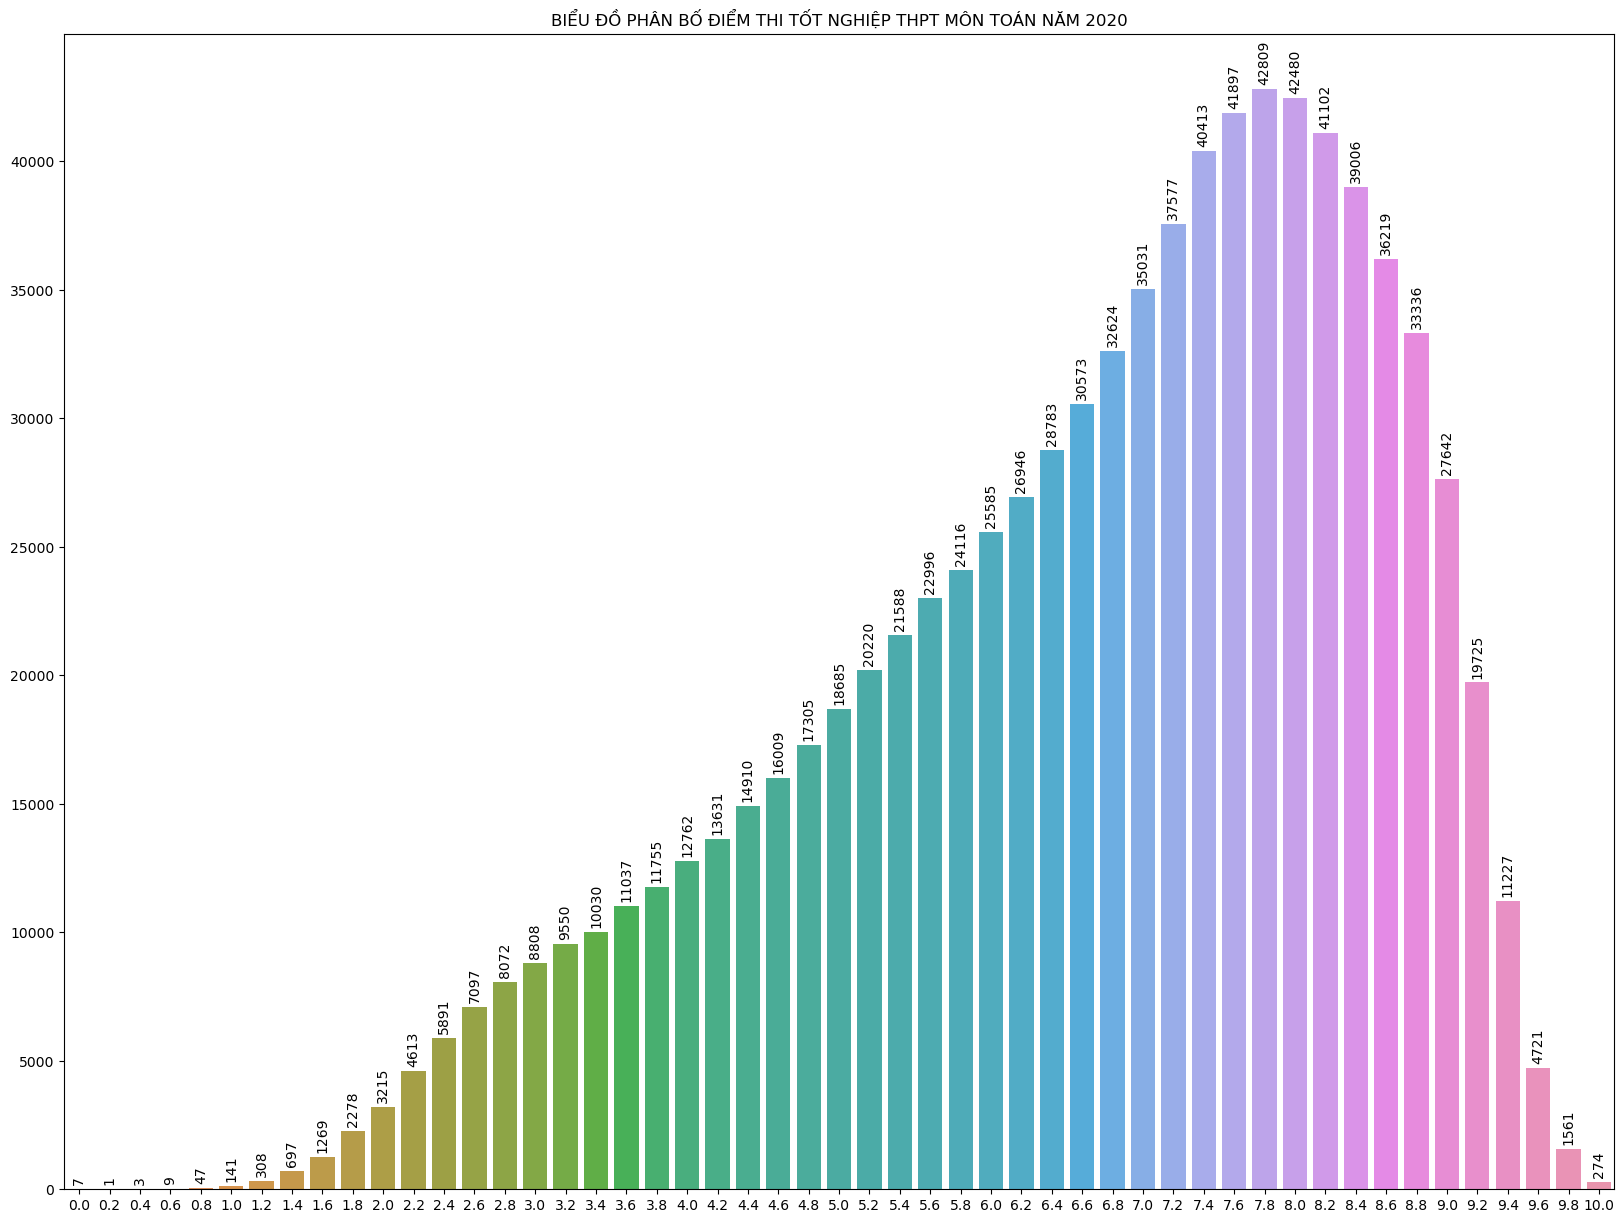

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Toán của cả nước năm 2020 cho thấy: Có 866581 thí sinh tham gia thi bài thi Toán trong đó điểm trung bình là 6.66 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.80 điểm. Số thí sinh có điểm <= 1 là 208 (chiếm tỉ lệ 0.024%); số thí sinh dưới trung bình là 159445 (chiếm tỉ lệ 18.399%); có 274 thí sinh đạt điểm 10.


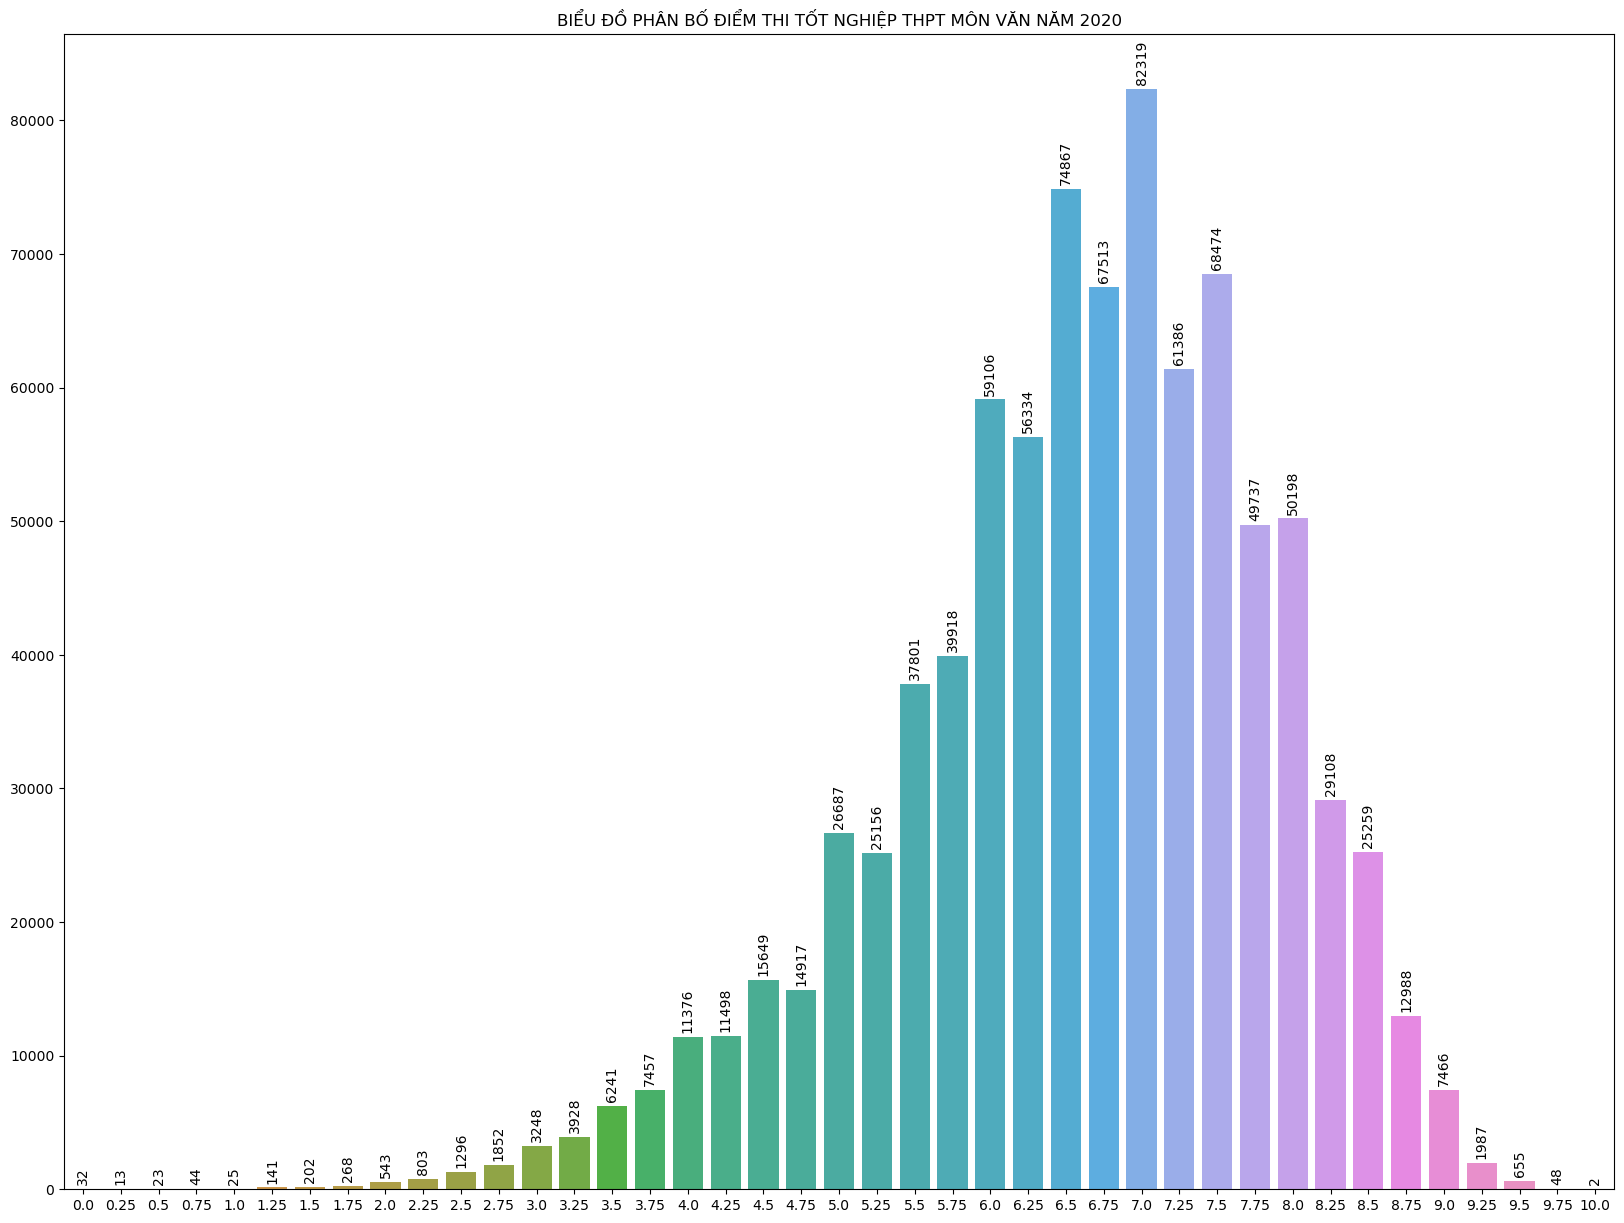

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Văn của cả nước năm 2020 cho thấy: Có 856565 thí sinh tham gia thi bài thi Văn trong đó điểm trung bình là 6.60 điểm, điểm trung vị là 6.75 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 137 (chiếm tỉ lệ 0.016%); số thí sinh dưới trung bình là 79556 (chiếm tỉ lệ 9.288%); có 2 thí sinh đạt điểm 10.


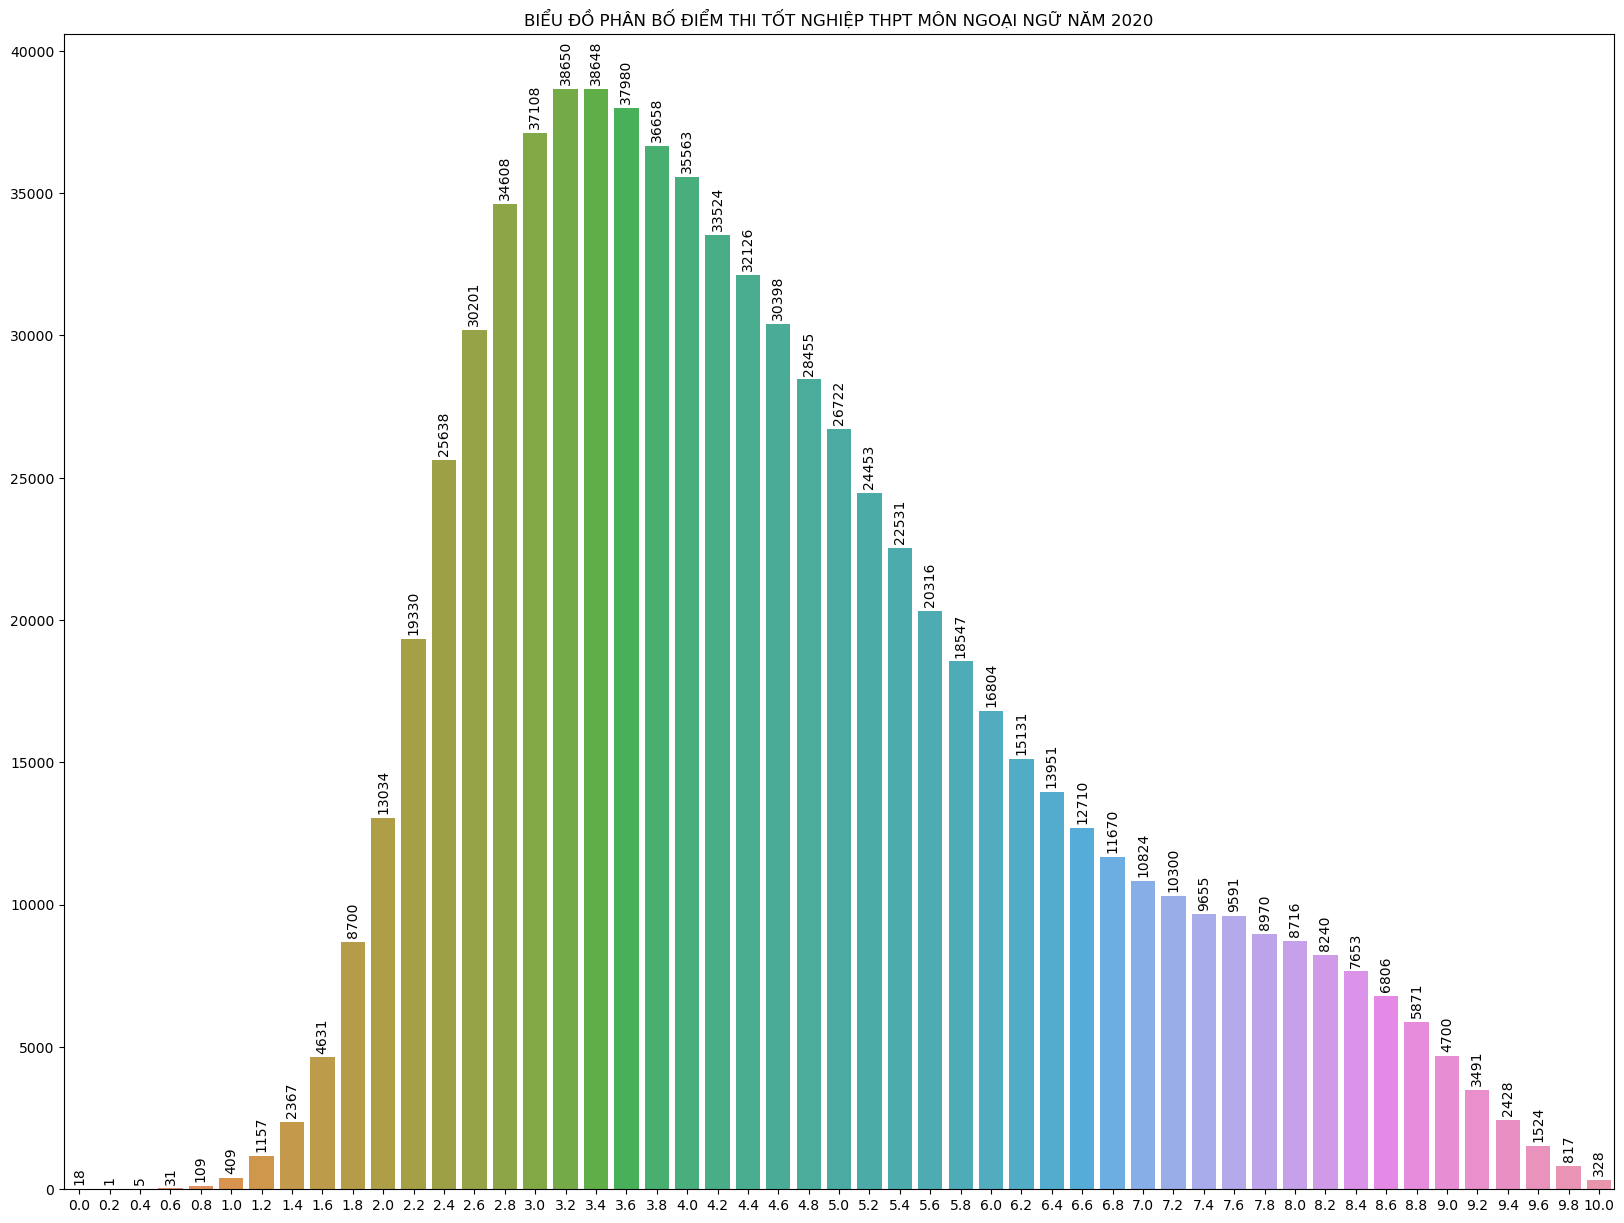

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Ngoại ngữ của cả nước năm 2020 cho thấy: Có 772098 thí sinh tham gia thi bài thi Ngoại ngữ trong đó điểm trung bình là 4.57 điểm, điểm trung vị là 4.20 điểm, điểm số có nhiều thí sinh đạt nhất là 3.20 điểm. Số thí sinh có điểm <= 1 là 573 (chiếm tỉ lệ 0.074%); số thí sinh dưới trung bình là 489349 (chiếm tỉ lệ 63.379%); có 328 thí sinh đạt điểm 10.


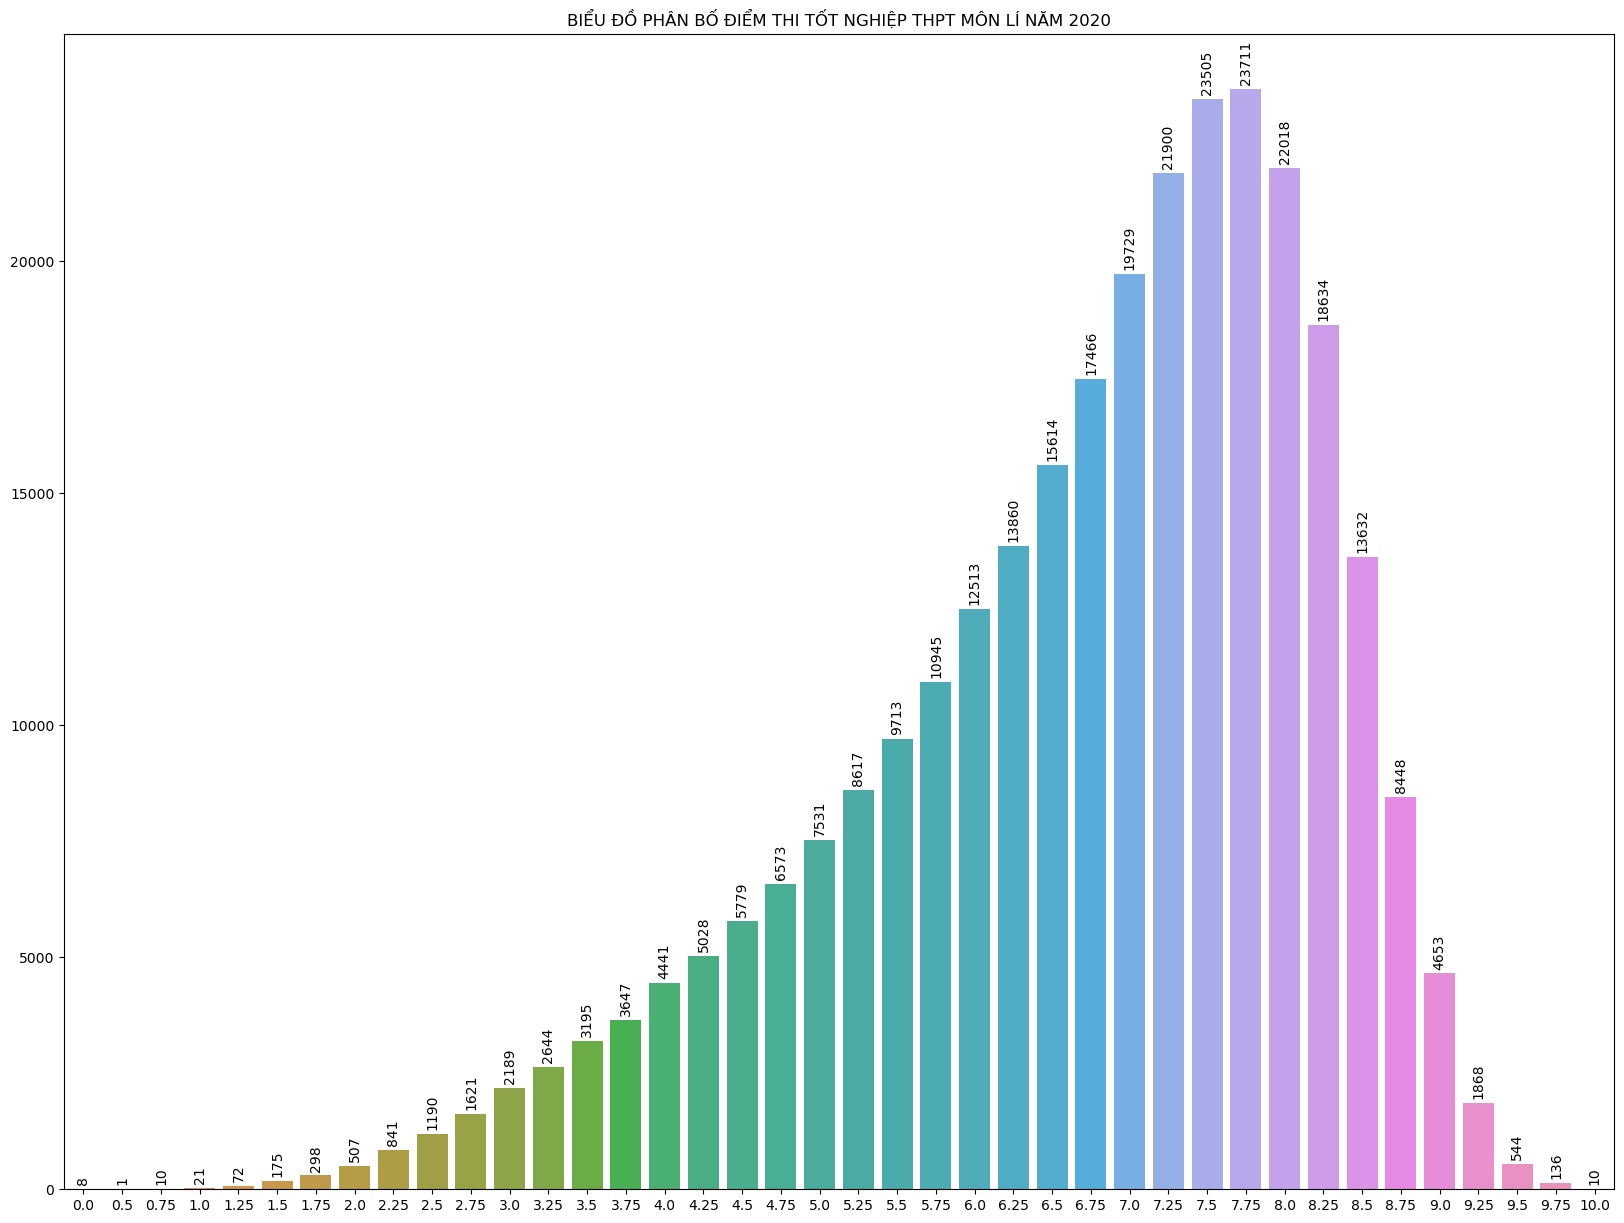

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Lí của cả nước năm 2020 cho thấy: Có 293287 thí sinh tham gia thi bài thi Lí trong đó điểm trung bình là 6.72 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.75 điểm. Số thí sinh có điểm <= 1 là 40 (chiếm tỉ lệ 0.014%); số thí sinh dưới trung bình là 38240 (chiếm tỉ lệ 13.038%); có 10 thí sinh đạt điểm 10.


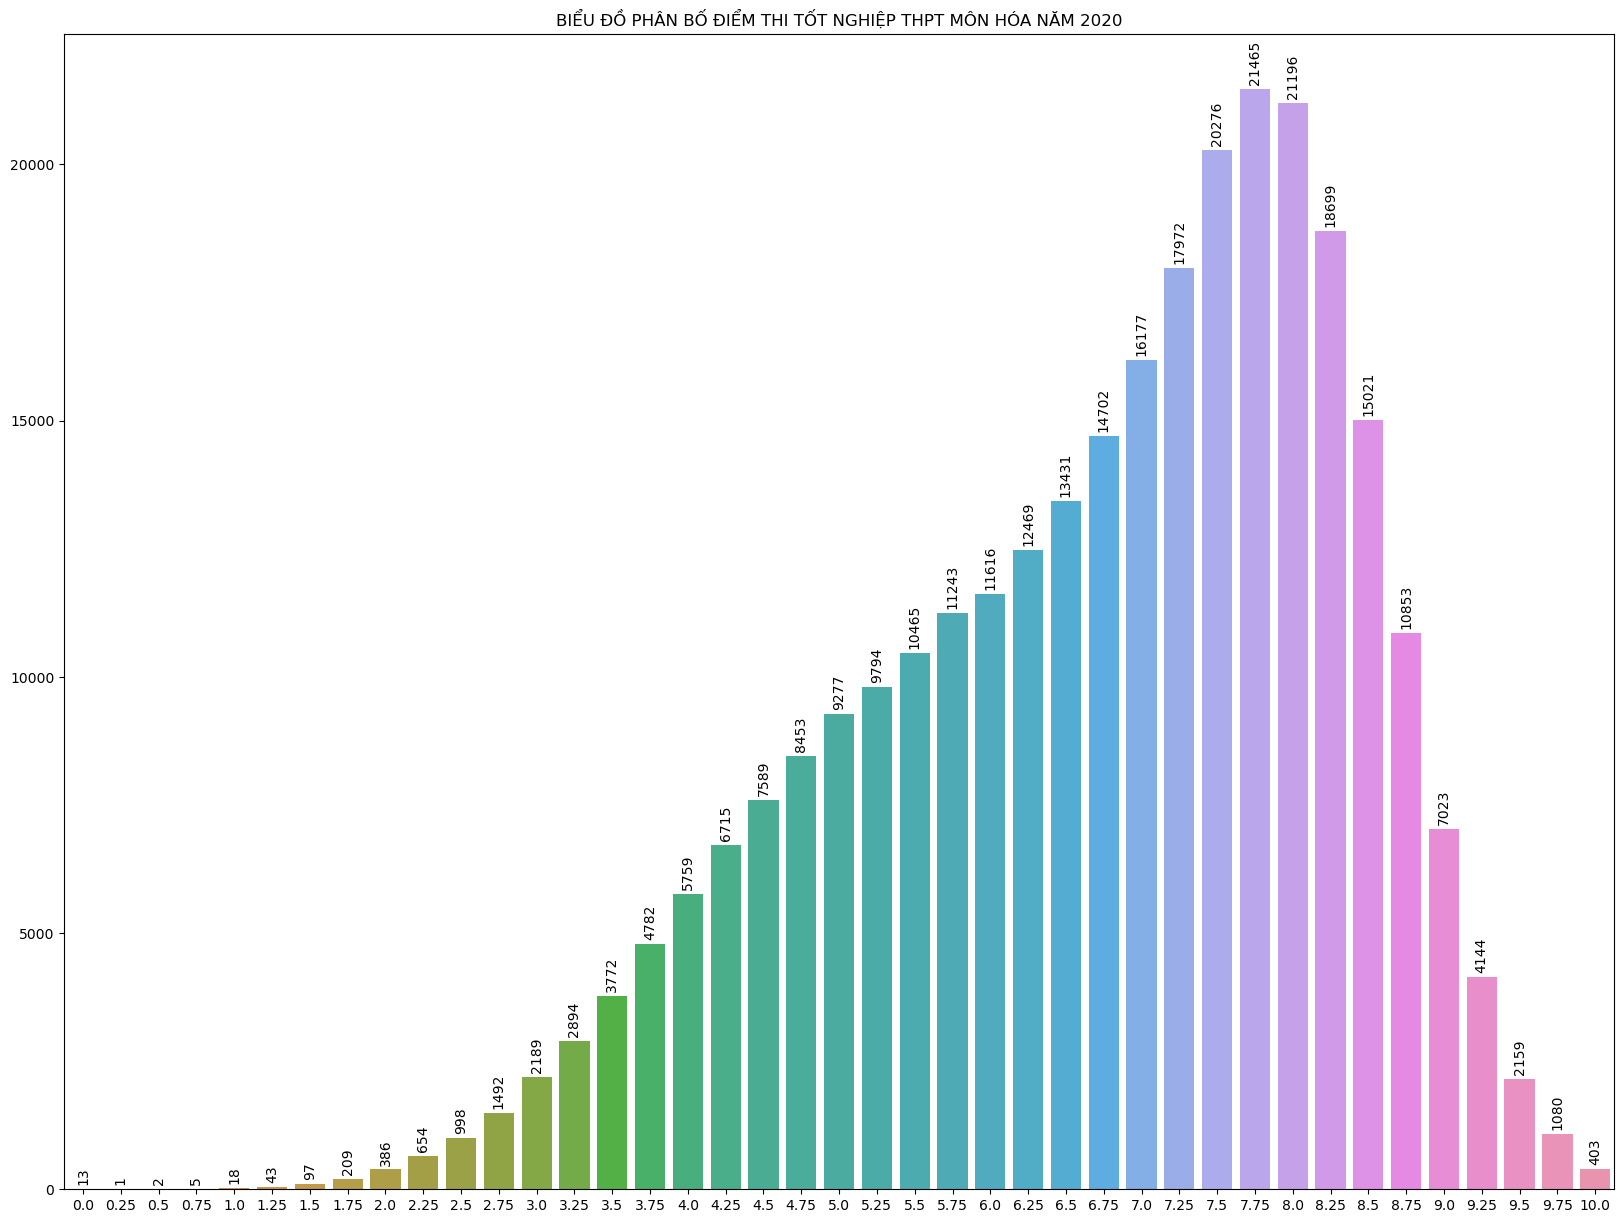

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Hóa của cả nước năm 2020 cho thấy: Có 295536 thí sinh tham gia thi bài thi Hóa trong đó điểm trung bình là 6.71 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.75 điểm. Số thí sinh có điểm <= 1 là 39 (chiếm tỉ lệ 0.013%); số thí sinh dưới trung bình là 46071 (chiếm tỉ lệ 15.589%); có 403 thí sinh đạt điểm 10.


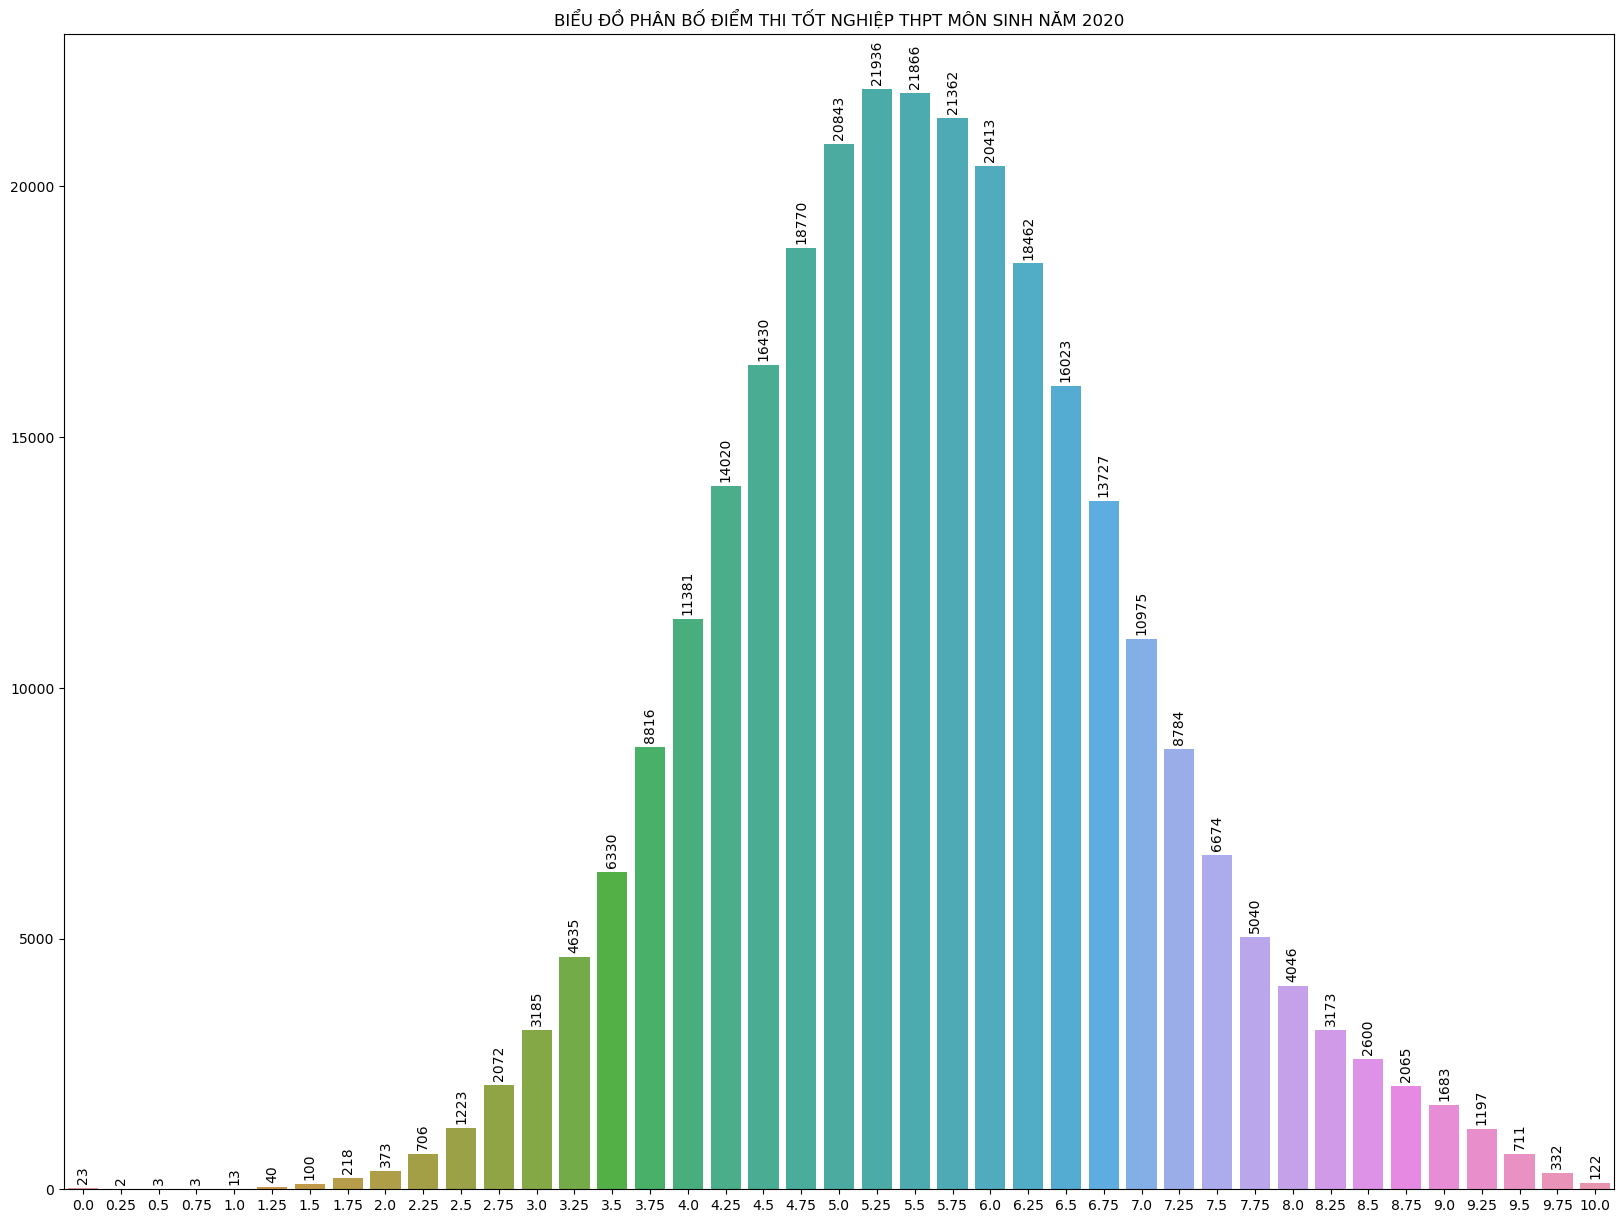

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sinh của cả nước năm 2020 cho thấy: Có 290377 thí sinh tham gia thi bài thi Sinh trong đó điểm trung bình là 5.59 điểm, điểm trung vị là 5.50 điểm, điểm số có nhiều thí sinh đạt nhất là 5.25 điểm. Số thí sinh có điểm <= 1 là 44 (chiếm tỉ lệ 0.015%); số thí sinh dưới trung bình là 88343 (chiếm tỉ lệ 30.424%); có 122 thí sinh đạt điểm 10.


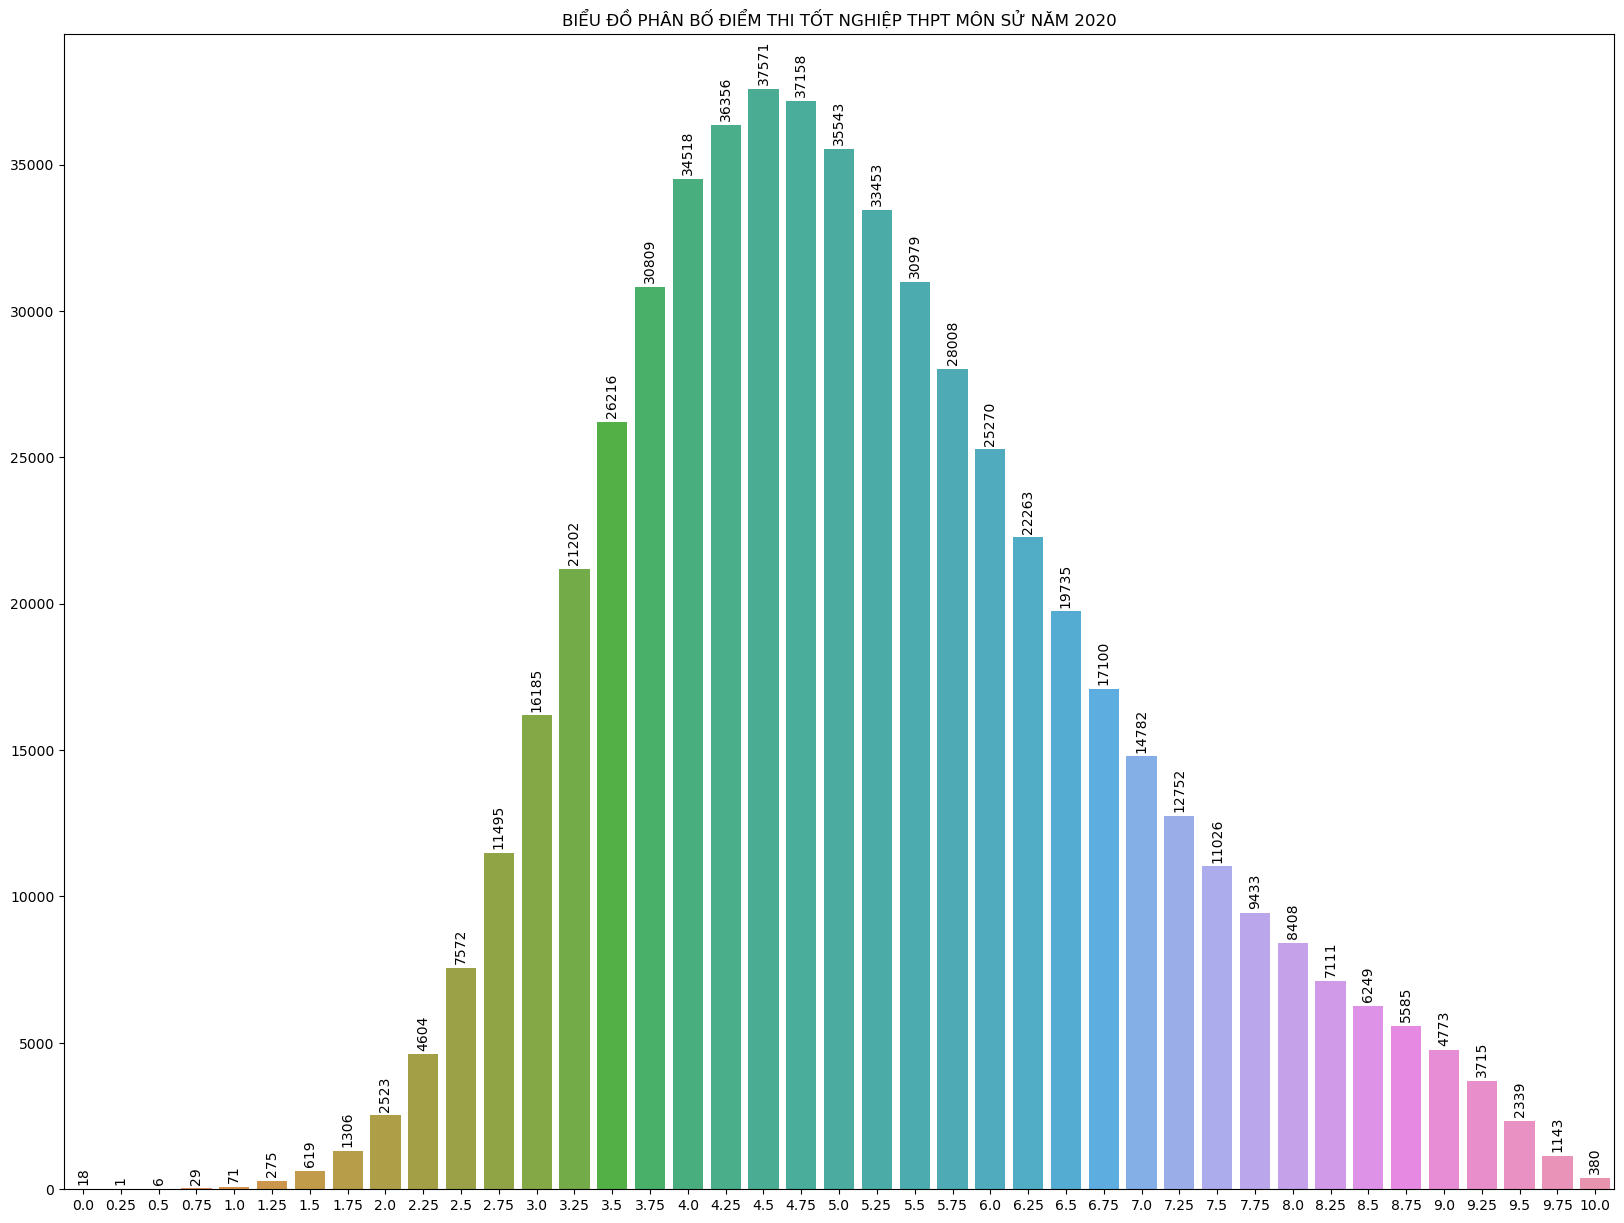

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sử của cả nước năm 2020 cho thấy: Có 568581 thí sinh tham gia thi bài thi Sử trong đó điểm trung bình là 5.18 điểm, điểm trung vị là 5.00 điểm, điểm số có nhiều thí sinh đạt nhất là 4.50 điểm. Số thí sinh có điểm <= 1 là 125 (chiếm tỉ lệ 0.022%); số thí sinh dưới trung bình là 268534 (chiếm tỉ lệ 47.229%); có 380 thí sinh đạt điểm 10.


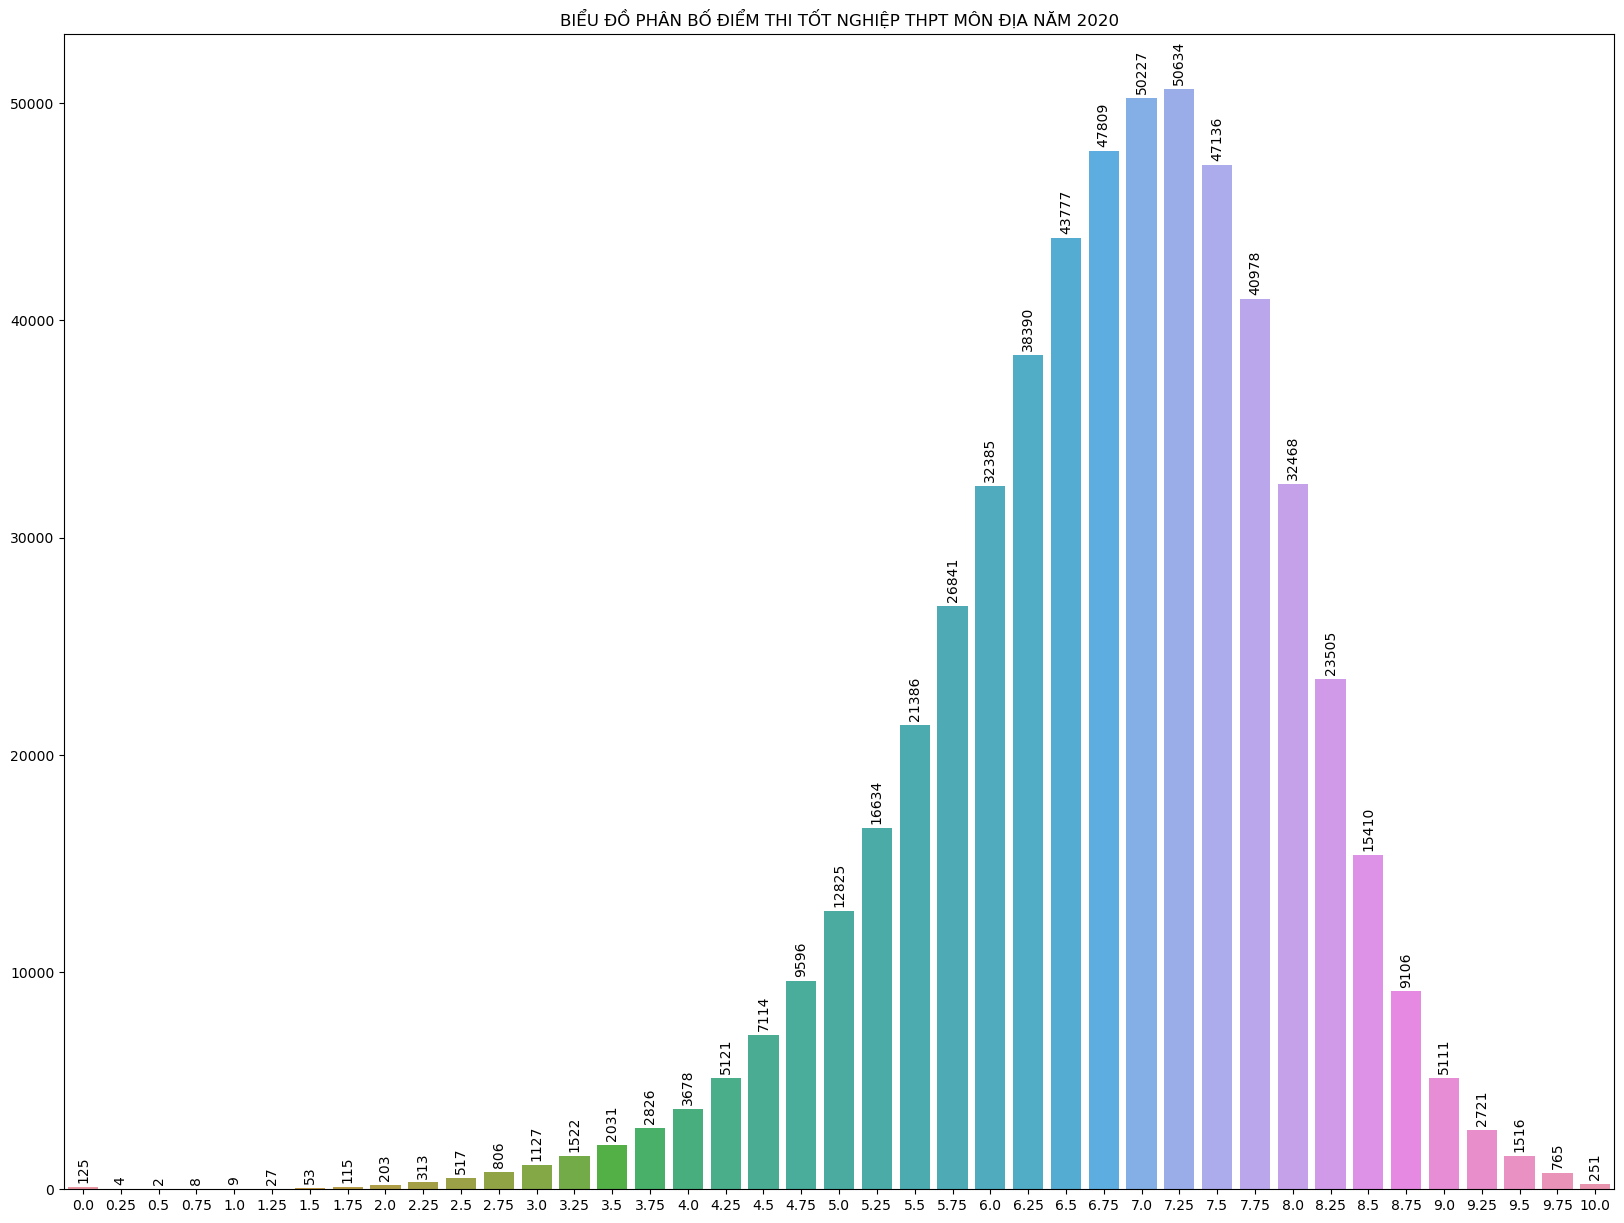

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Địa của cả nước năm 2020 cho thấy: Có 555072 thí sinh tham gia thi bài thi Địa trong đó điểm trung bình là 6.77 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.25 điểm. Số thí sinh có điểm <= 1 là 148 (chiếm tỉ lệ 0.027%); số thí sinh dưới trung bình là 35197 (chiếm tỉ lệ 6.341%); có 251 thí sinh đạt điểm 10.


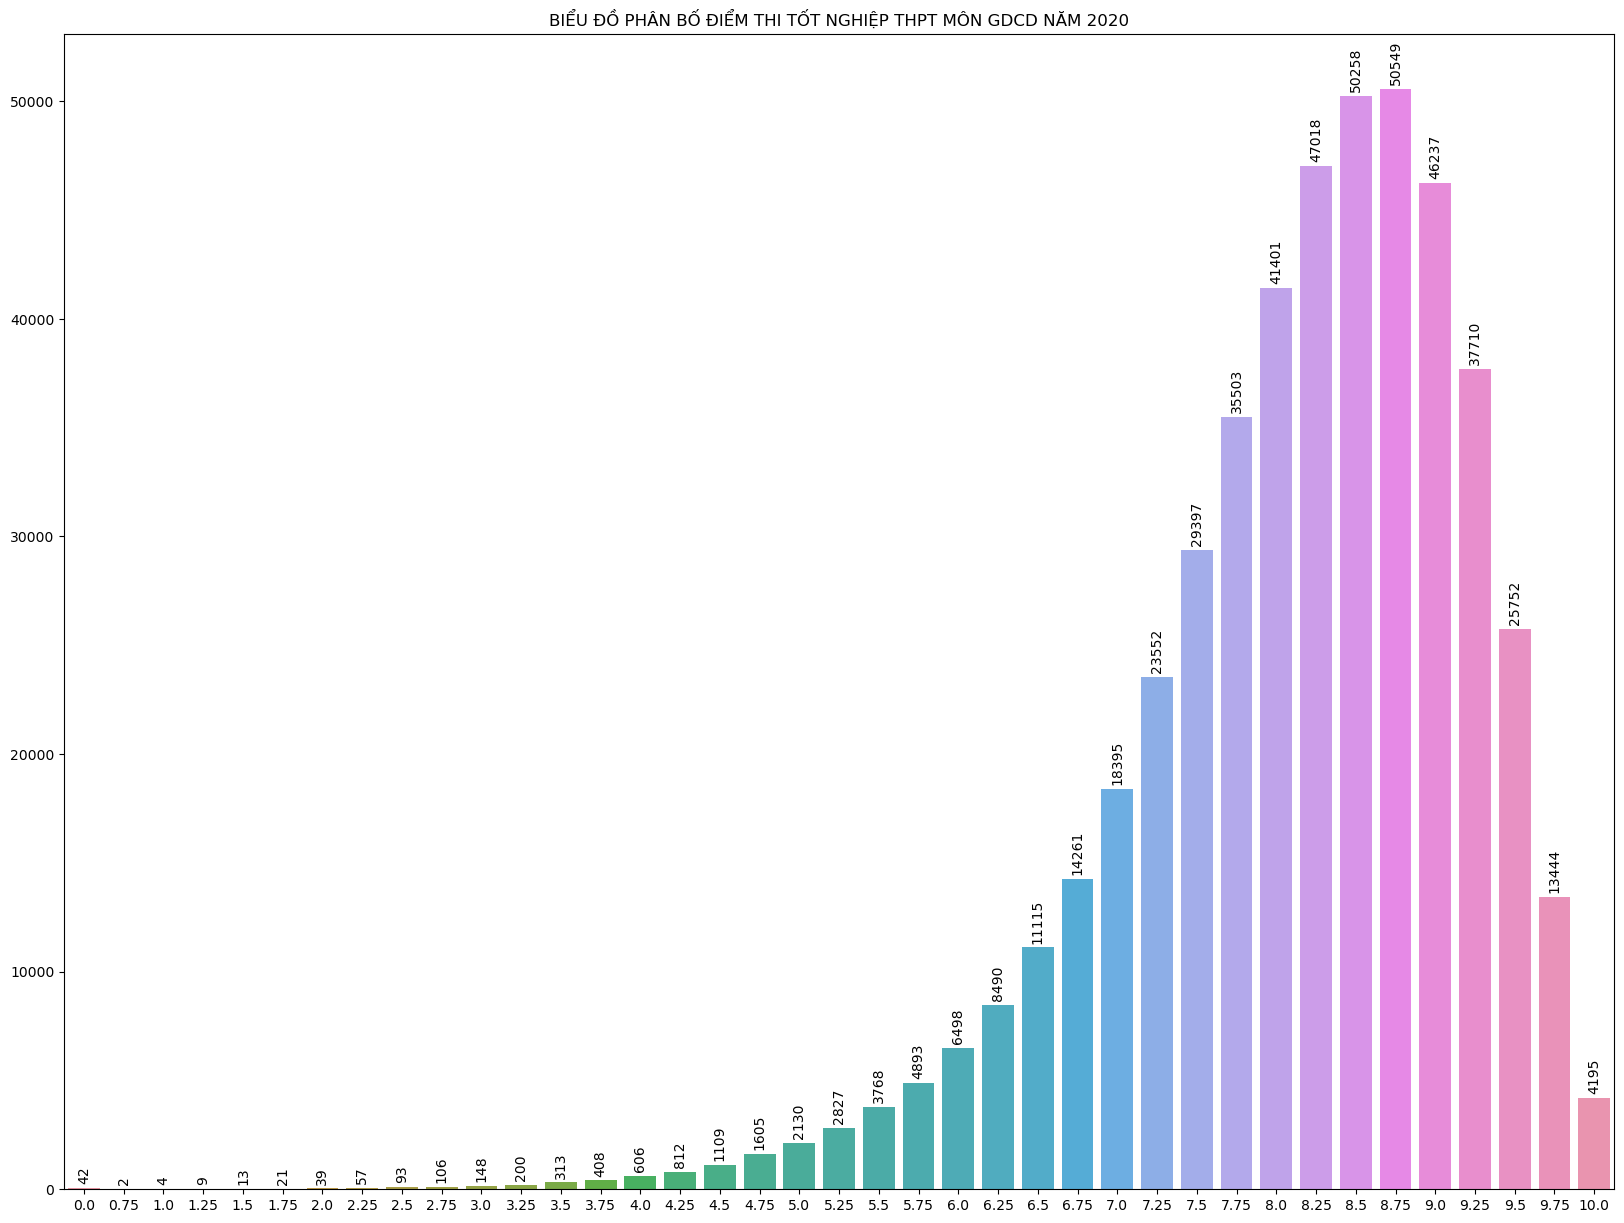

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn GDCD của cả nước năm 2020 cho thấy: Có 482980 thí sinh tham gia thi bài thi GDCD trong đó điểm trung bình là 8.13 điểm, điểm trung vị là 8.25 điểm, điểm số có nhiều thí sinh đạt nhất là 8.75 điểm. Số thí sinh có điểm <= 1 là 48 (chiếm tỉ lệ 0.010%); số thí sinh dưới trung bình là 5587 (chiếm tỉ lệ 1.157%); có 4195 thí sinh đạt điểm 10.


In [17]:
# draw histogram for each subject using seaborn histogram
for subject in SUBJECT_NAMES:
	fig, ax = plt.subplots(figsize=(20, 15))
	sns.barplot(data=grade_dict[subject], x='grade', y='count', ax=ax)
	ax.set_title(f'BIỂU ĐỒ PHÂN BỐ ĐIỂM THI TỐT NGHIỆP THPT MÔN {subject.upper()} NĂM {year}')
	ax.set_xlabel(None)
	ax.set_ylabel(None)
	ax.bar_label(ax.containers[0], rotation=90, padding=3)
	plt.show()
	analyze(grade_dict[subject], subject, year)

Tiến hành tương tự với năm 2021.

In [18]:
year = '2021'
grade_dict = {}
for subject in SUBJECT_NAMES:
	grade_dict[subject] = grade_df[year][subject].dropna()
	grade_dict[subject] = grade_dict[subject].value_counts().sort_index()
	grade_dict[subject] = grade_dict[subject].rename_axis('grade').reset_index(name='count')

grade_dict['Văn'].head(10)

grade  count
0   0.00     26
1   0.25     10
2   0.50     44
3   0.75     64
4   1.00     23
5   1.17      1
6   1.25    554
7   1.50    795
8   1.67      1
9   1.75    940

In [19]:
grade_dict['Văn']['grade'] = grade_dict['Văn']['grade'].apply(round_to_025)
grade_dict['Văn'] = grade_dict['Văn'].groupby('grade').sum().reset_index()
grade_dict['Văn'].head(10)

grade  count
0   0.00     26
1   0.25     10
2   0.50     44
3   0.75     64
4   1.00     23
5   1.25    555
6   1.50    795
7   1.75    941
8   2.00   1612
9   2.25   1828

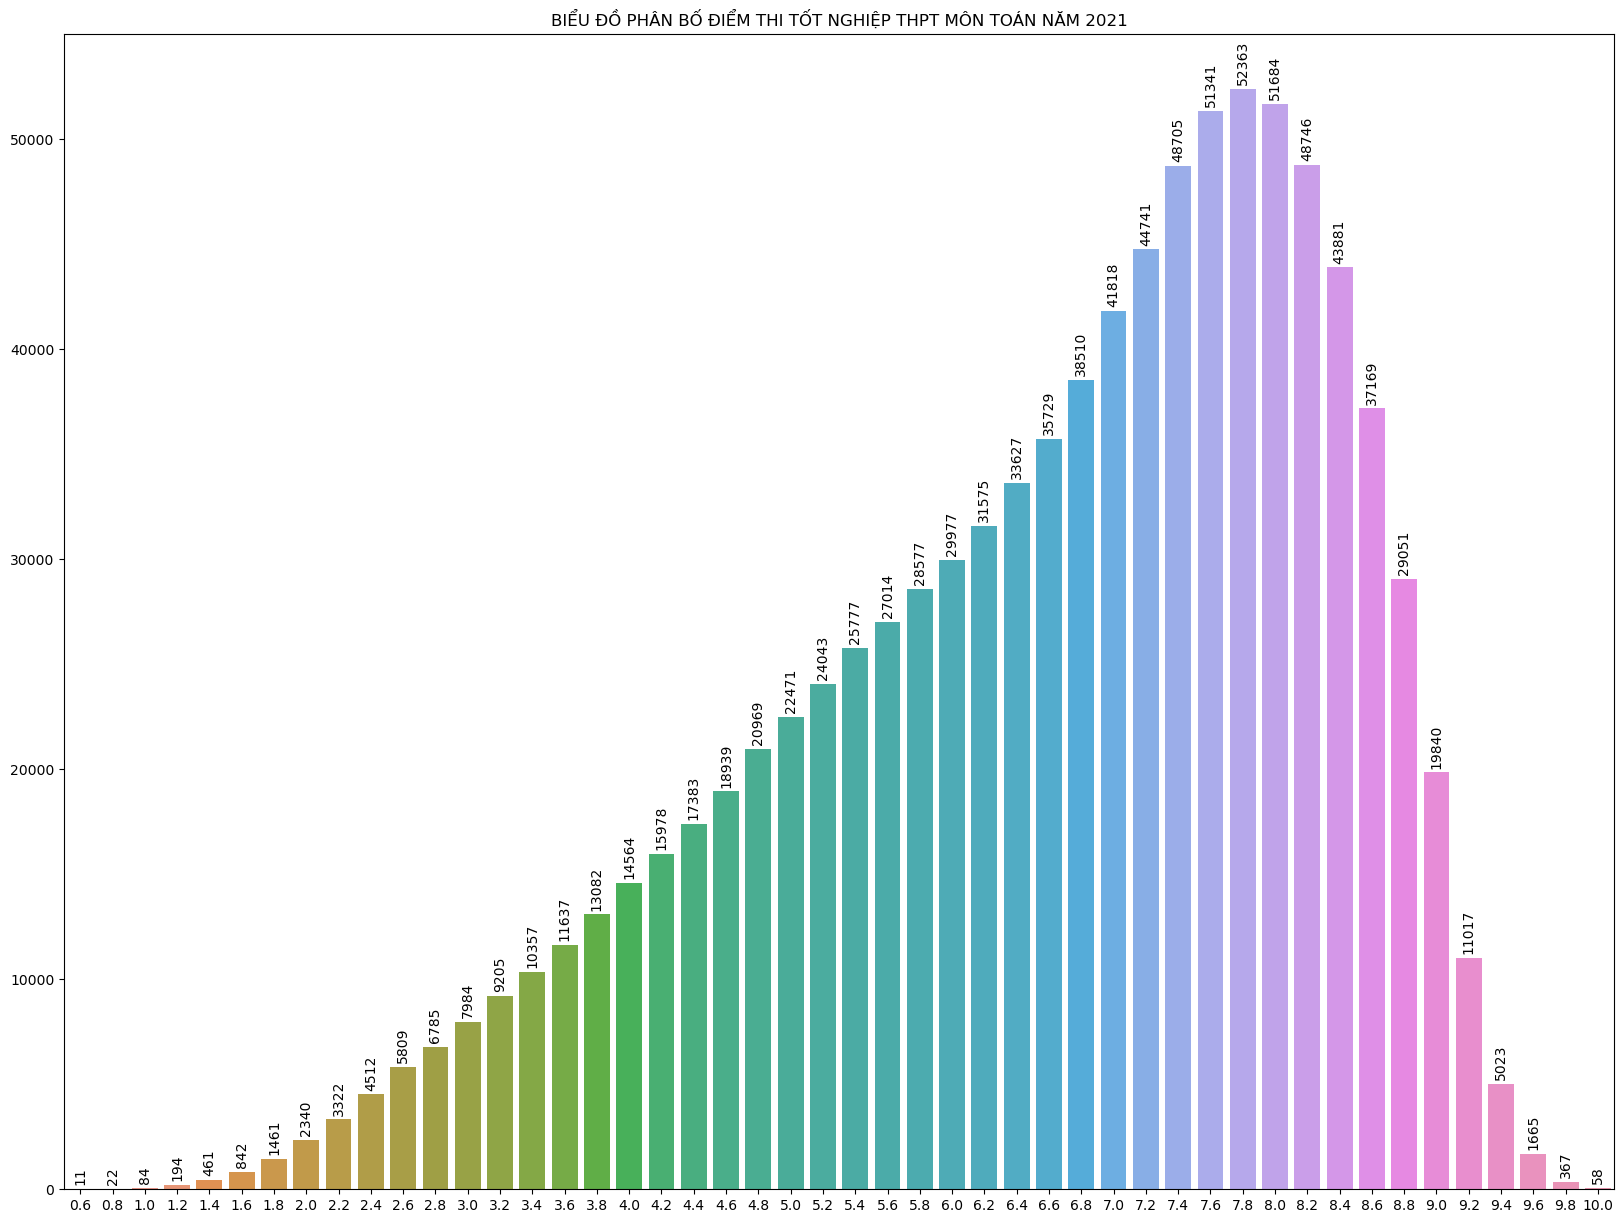

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Toán của cả nước năm 2021 cho thấy: Có 950710 thí sinh tham gia thi bài thi Toán trong đó điểm trung bình là 6.62 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.80 điểm. Số thí sinh có điểm <= 1 là 117 (chiếm tỉ lệ 0.012%); số thí sinh dưới trung bình là 165941 (chiếm tỉ lệ 17.454%); có 58 thí sinh đạt điểm 10.


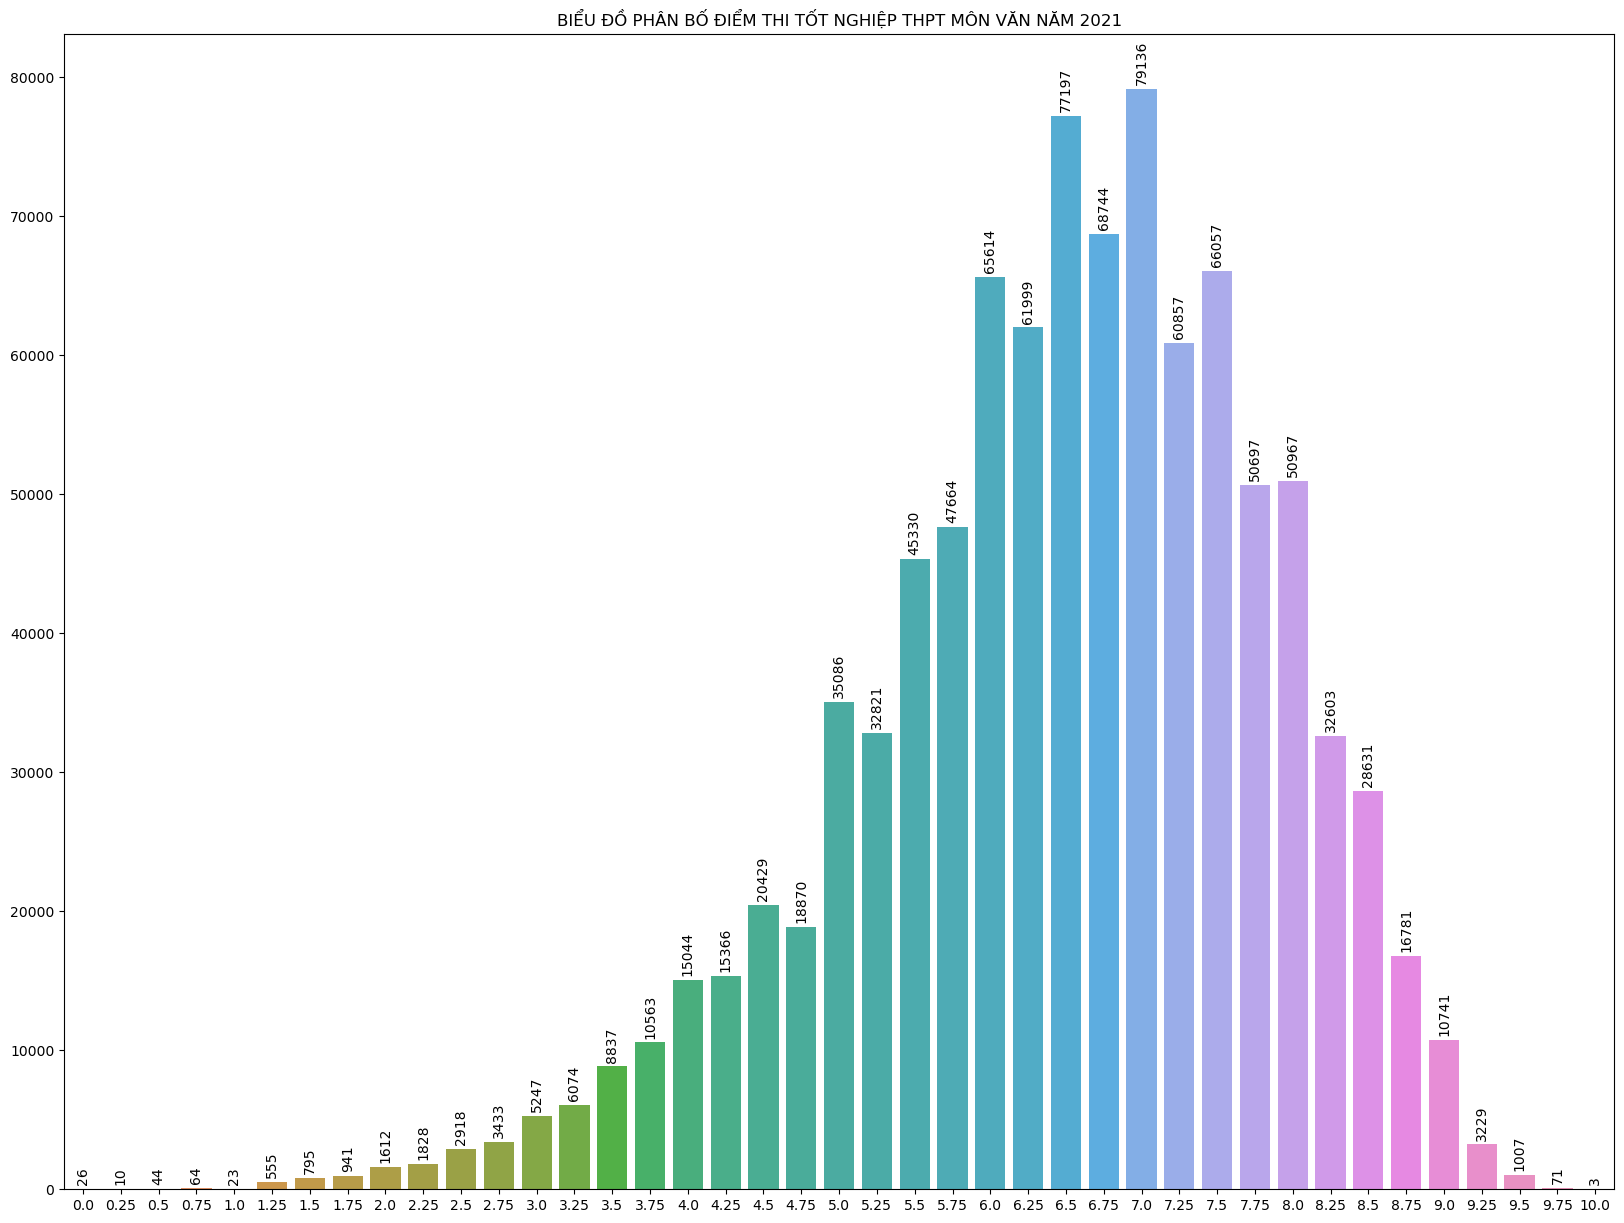

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Văn của cả nước năm 2021 cho thấy: Có 947914 thí sinh tham gia thi bài thi Văn trong đó điểm trung bình là 6.48 điểm, điểm trung vị là 6.50 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 167 (chiếm tỉ lệ 0.018%); số thí sinh dưới trung bình là 112679 (chiếm tỉ lệ 11.887%); có 3 thí sinh đạt điểm 10.


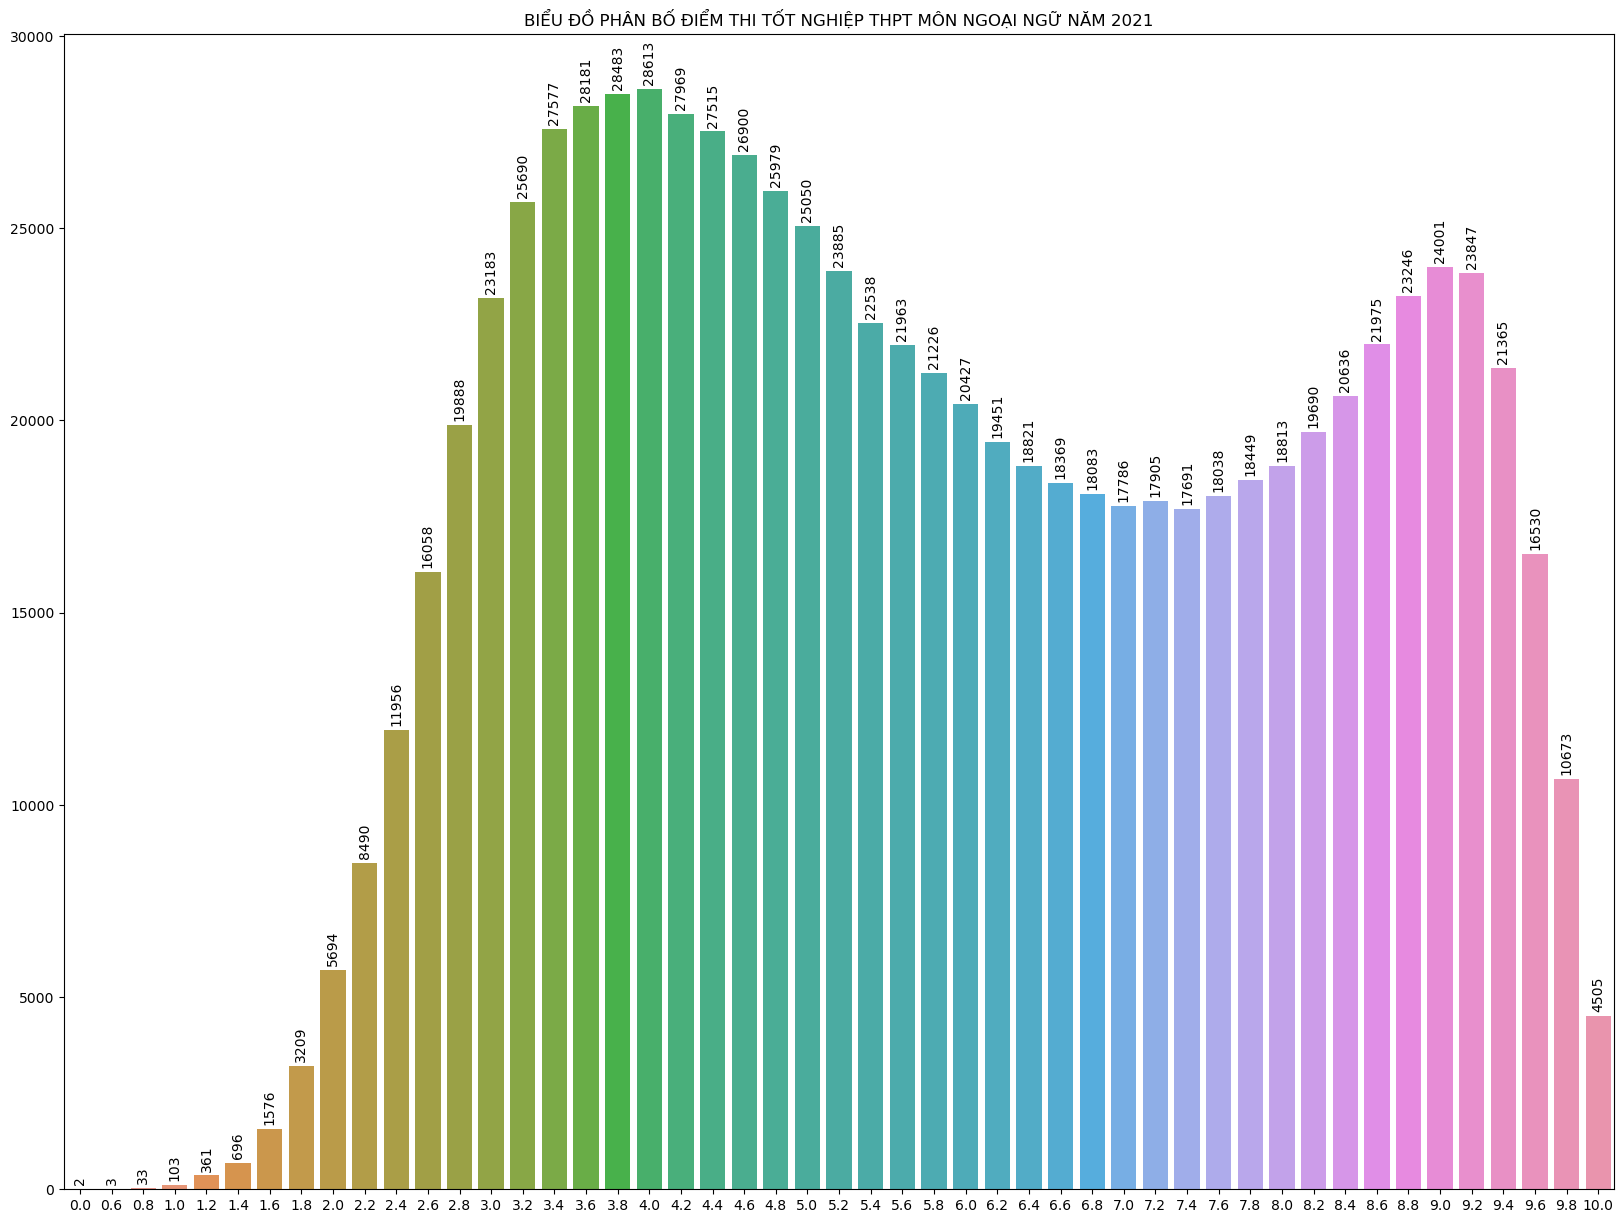

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Ngoại ngữ của cả nước năm 2021 cho thấy: Có 843122 thí sinh tham gia thi bài thi Ngoại ngữ trong đó điểm trung bình là 5.86 điểm, điểm trung vị là 5.60 điểm, điểm số có nhiều thí sinh đạt nhất là 4.00 điểm. Số thí sinh có điểm <= 1 là 141 (chiếm tỉ lệ 0.017%); số thí sinh dưới trung bình là 338159 (chiếm tỉ lệ 40.108%); có 4505 thí sinh đạt điểm 10.


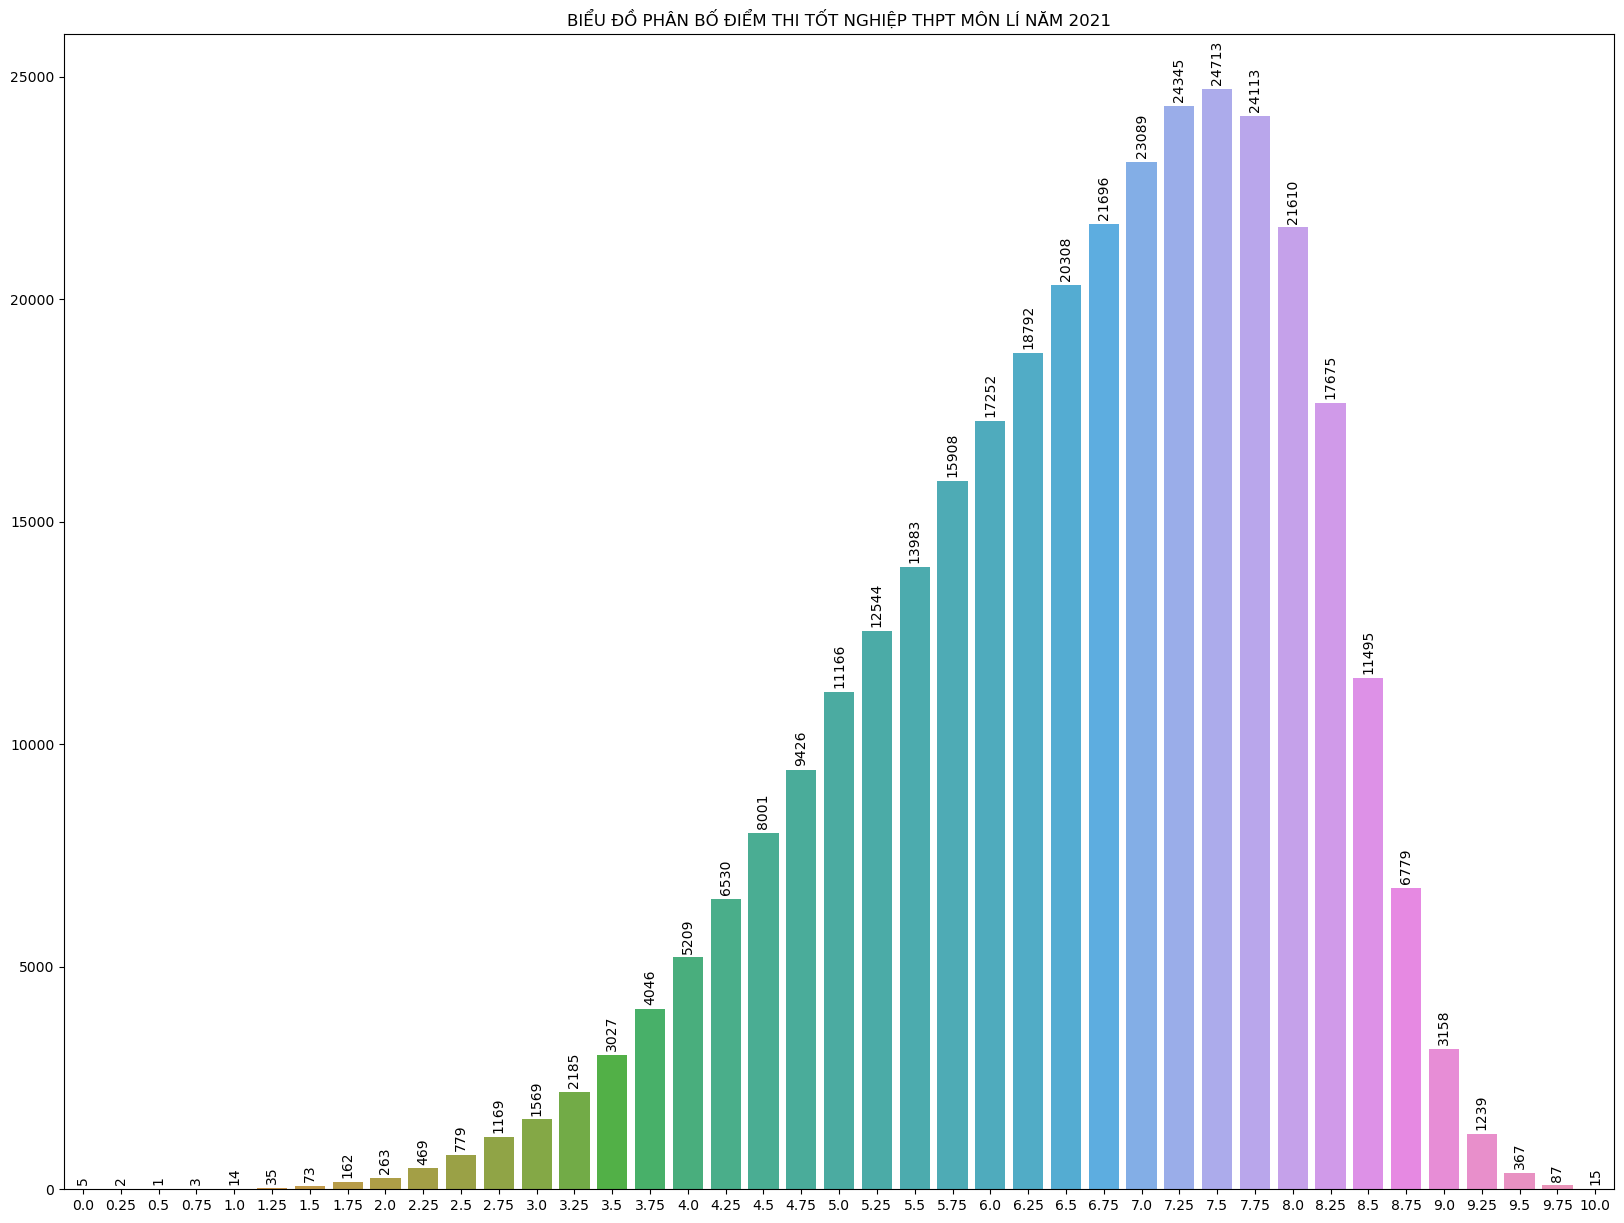

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Lí của cả nước năm 2021 cho thấy: Có 333302 thí sinh tham gia thi bài thi Lí trong đó điểm trung bình là 6.58 điểm, điểm trung vị là 6.75 điểm, điểm số có nhiều thí sinh đạt nhất là 7.50 điểm. Số thí sinh có điểm <= 1 là 25 (chiếm tỉ lệ 0.008%); số thí sinh dưới trung bình là 42968 (chiếm tỉ lệ 12.892%); có 15 thí sinh đạt điểm 10.


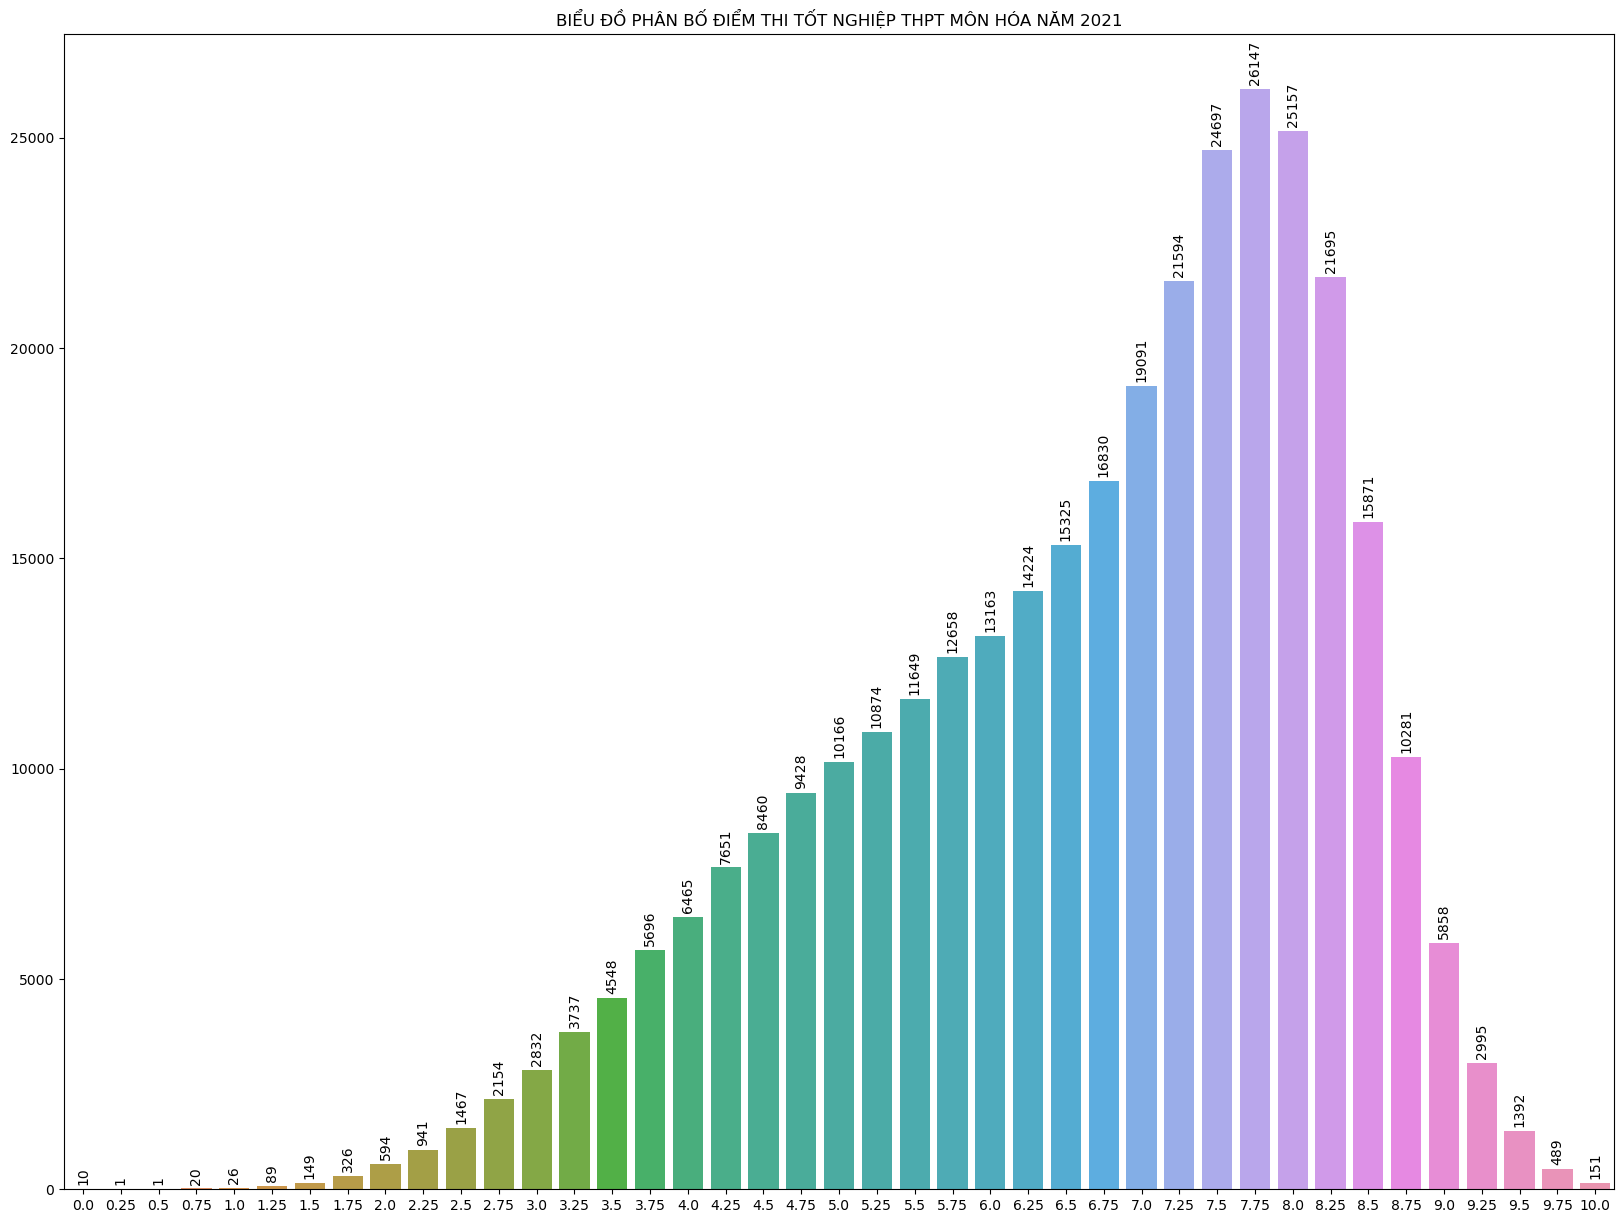

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Hóa của cả nước năm 2021 cho thấy: Có 334902 thí sinh tham gia thi bài thi Hóa trong đó điểm trung bình là 6.63 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.75 điểm. Số thí sinh có điểm <= 1 là 58 (chiếm tỉ lệ 0.017%); số thí sinh dưới trung bình là 54595 (chiếm tỉ lệ 16.302%); có 151 thí sinh đạt điểm 10.


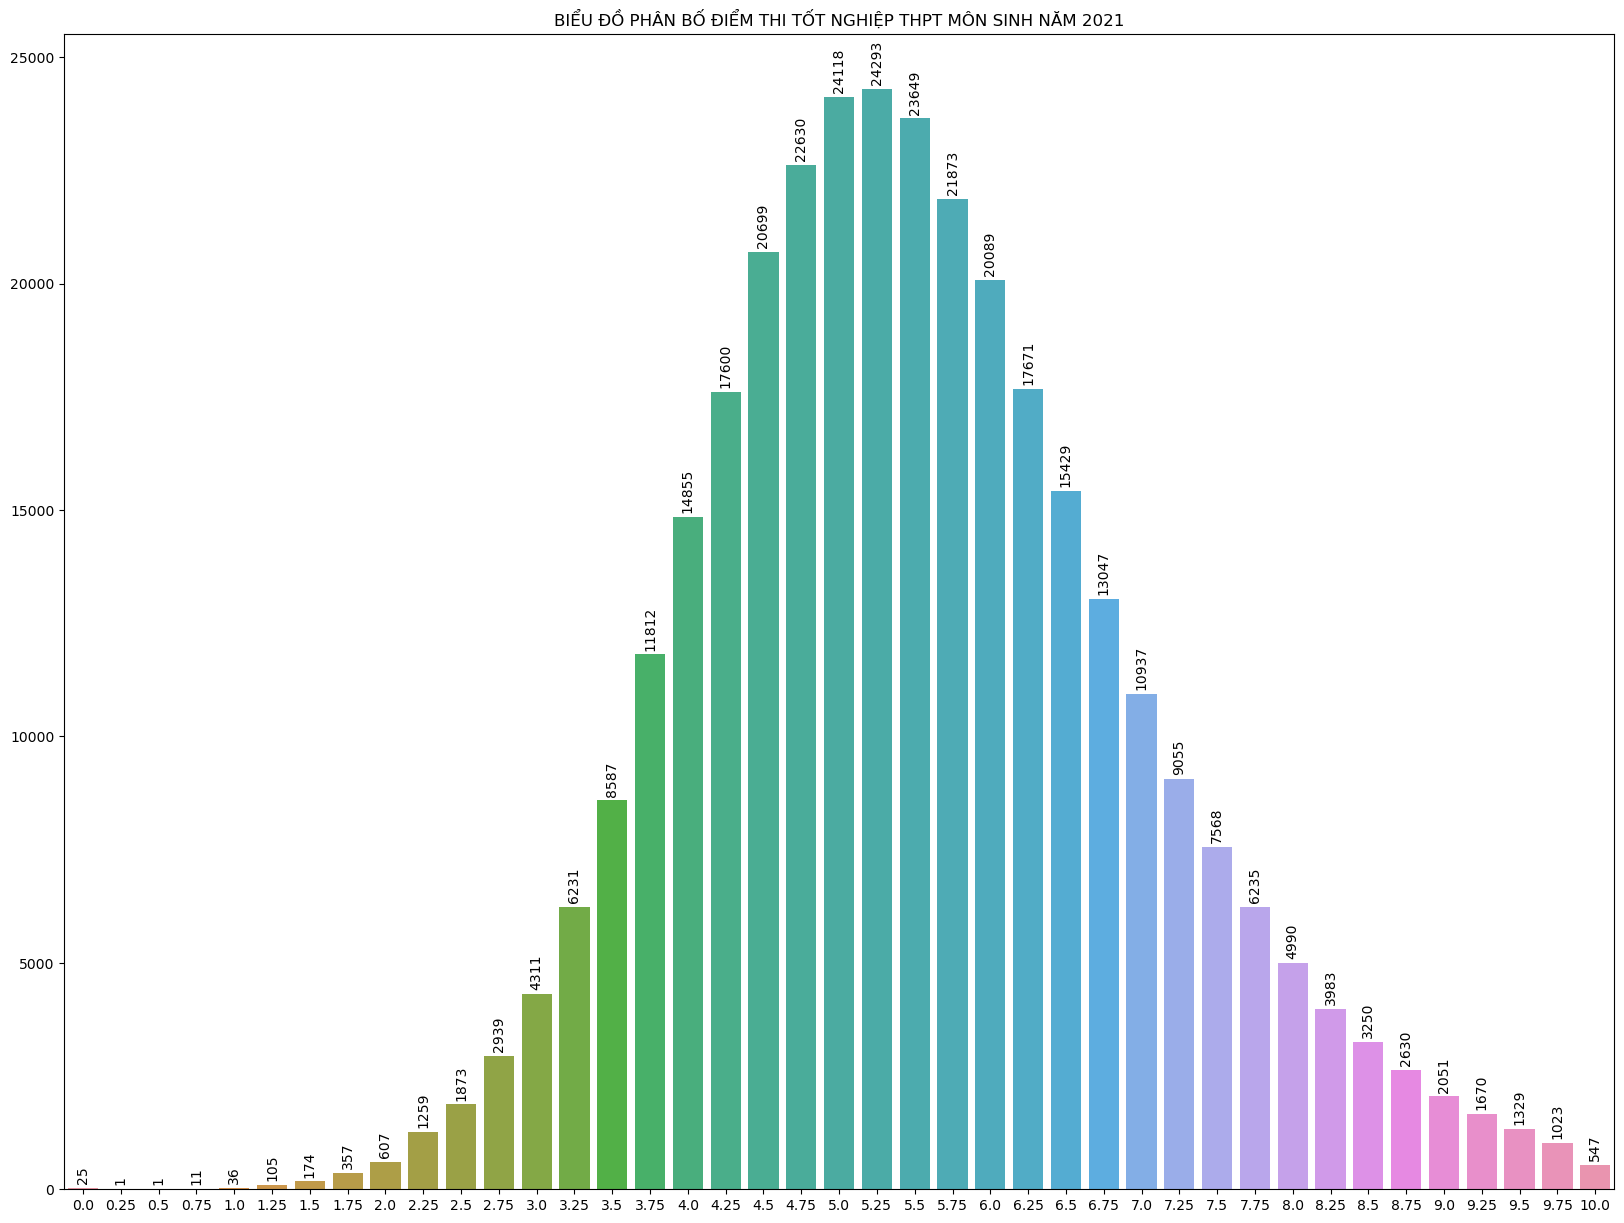

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sinh của cả nước năm 2021 cho thấy: Có 329550 thí sinh tham gia thi bài thi Sinh trong đó điểm trung bình là 5.51 điểm, điểm trung vị là 5.50 điểm, điểm số có nhiều thí sinh đạt nhất là 5.25 điểm. Số thí sinh có điểm <= 1 là 74 (chiếm tỉ lệ 0.022%); số thí sinh dưới trung bình là 114113 (chiếm tỉ lệ 34.627%); có 547 thí sinh đạt điểm 10.


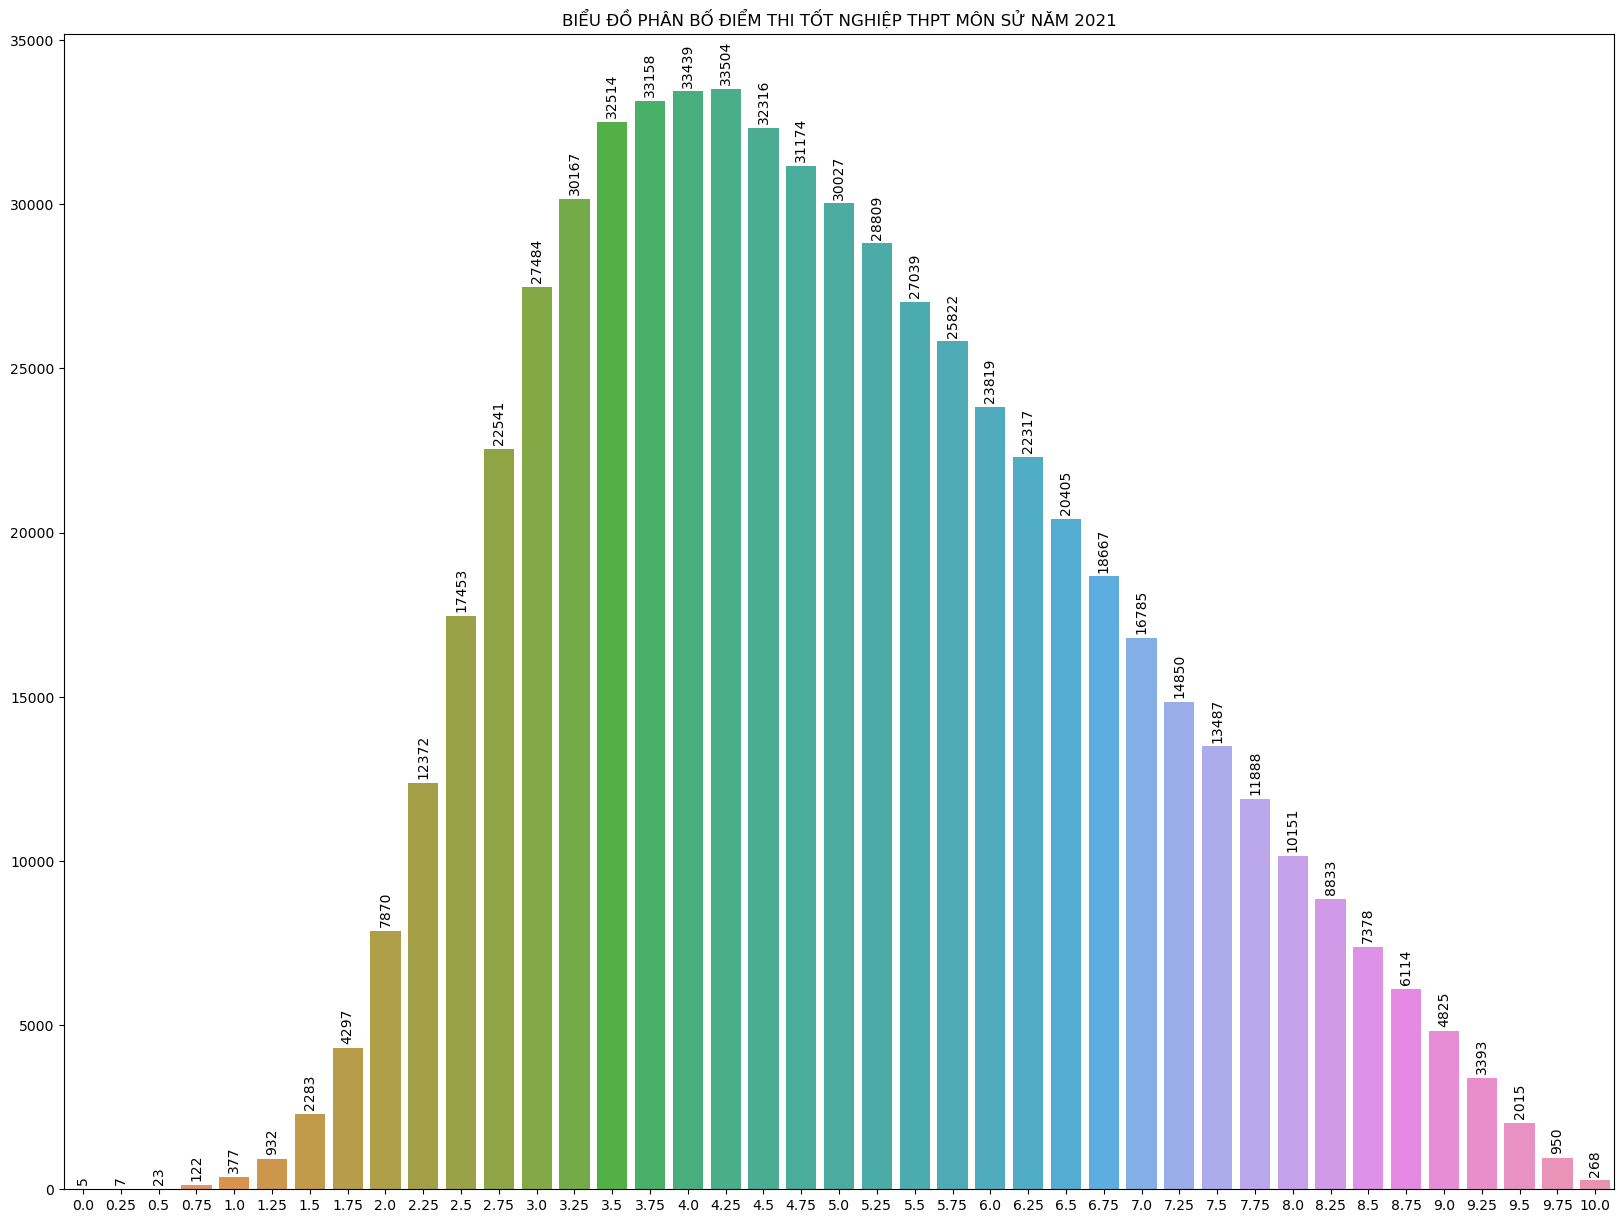

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sử của cả nước năm 2021 cho thấy: Có 619880 thí sinh tham gia thi bài thi Sử trong đó điểm trung bình là 4.98 điểm, điểm trung vị là 4.75 điểm, điểm số có nhiều thí sinh đạt nhất là 4.25 điểm. Số thí sinh có điểm <= 1 là 534 (chiếm tỉ lệ 0.086%); số thí sinh dưới trung bình là 322038 (chiếm tỉ lệ 51.952%); có 268 thí sinh đạt điểm 10.


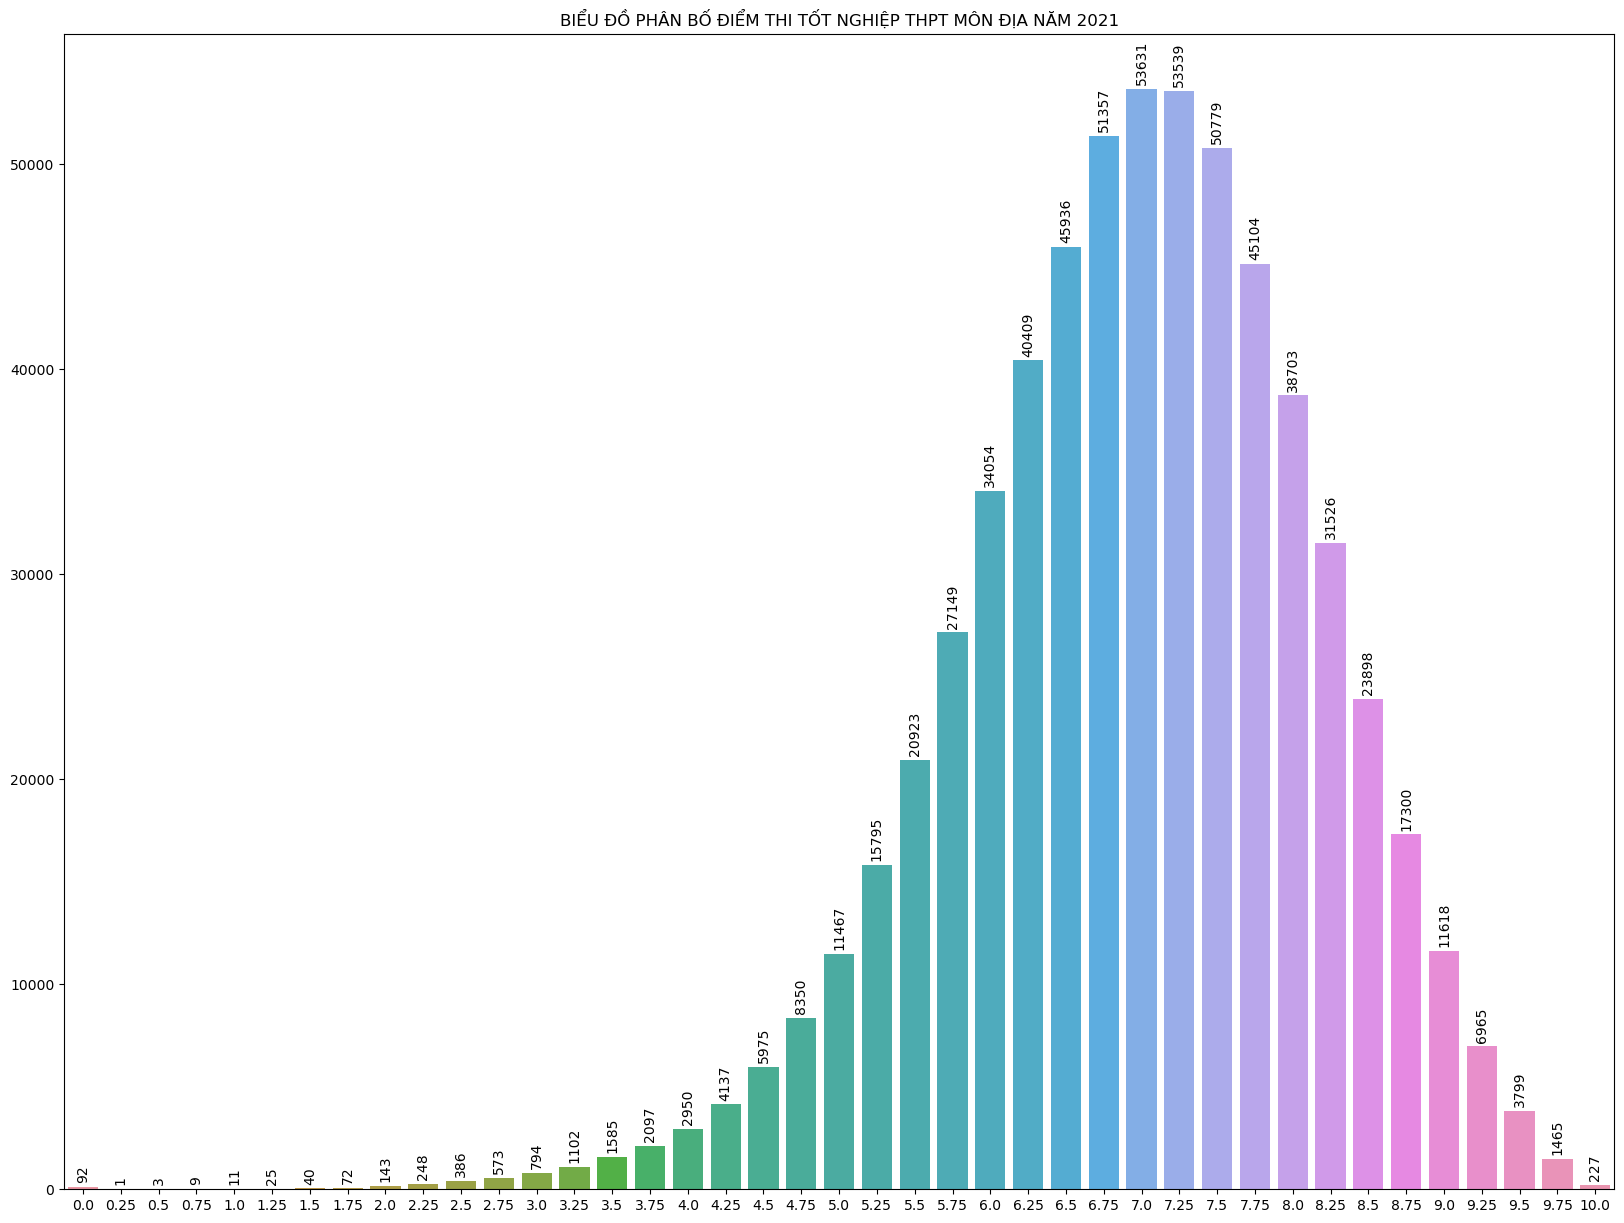

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Địa của cả nước năm 2021 cho thấy: Có 614237 thí sinh tham gia thi bài thi Địa trong đó điểm trung bình là 6.96 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 116 (chiếm tỉ lệ 0.019%); số thí sinh dưới trung bình là 28593 (chiếm tỉ lệ 4.655%); có 227 thí sinh đạt điểm 10.


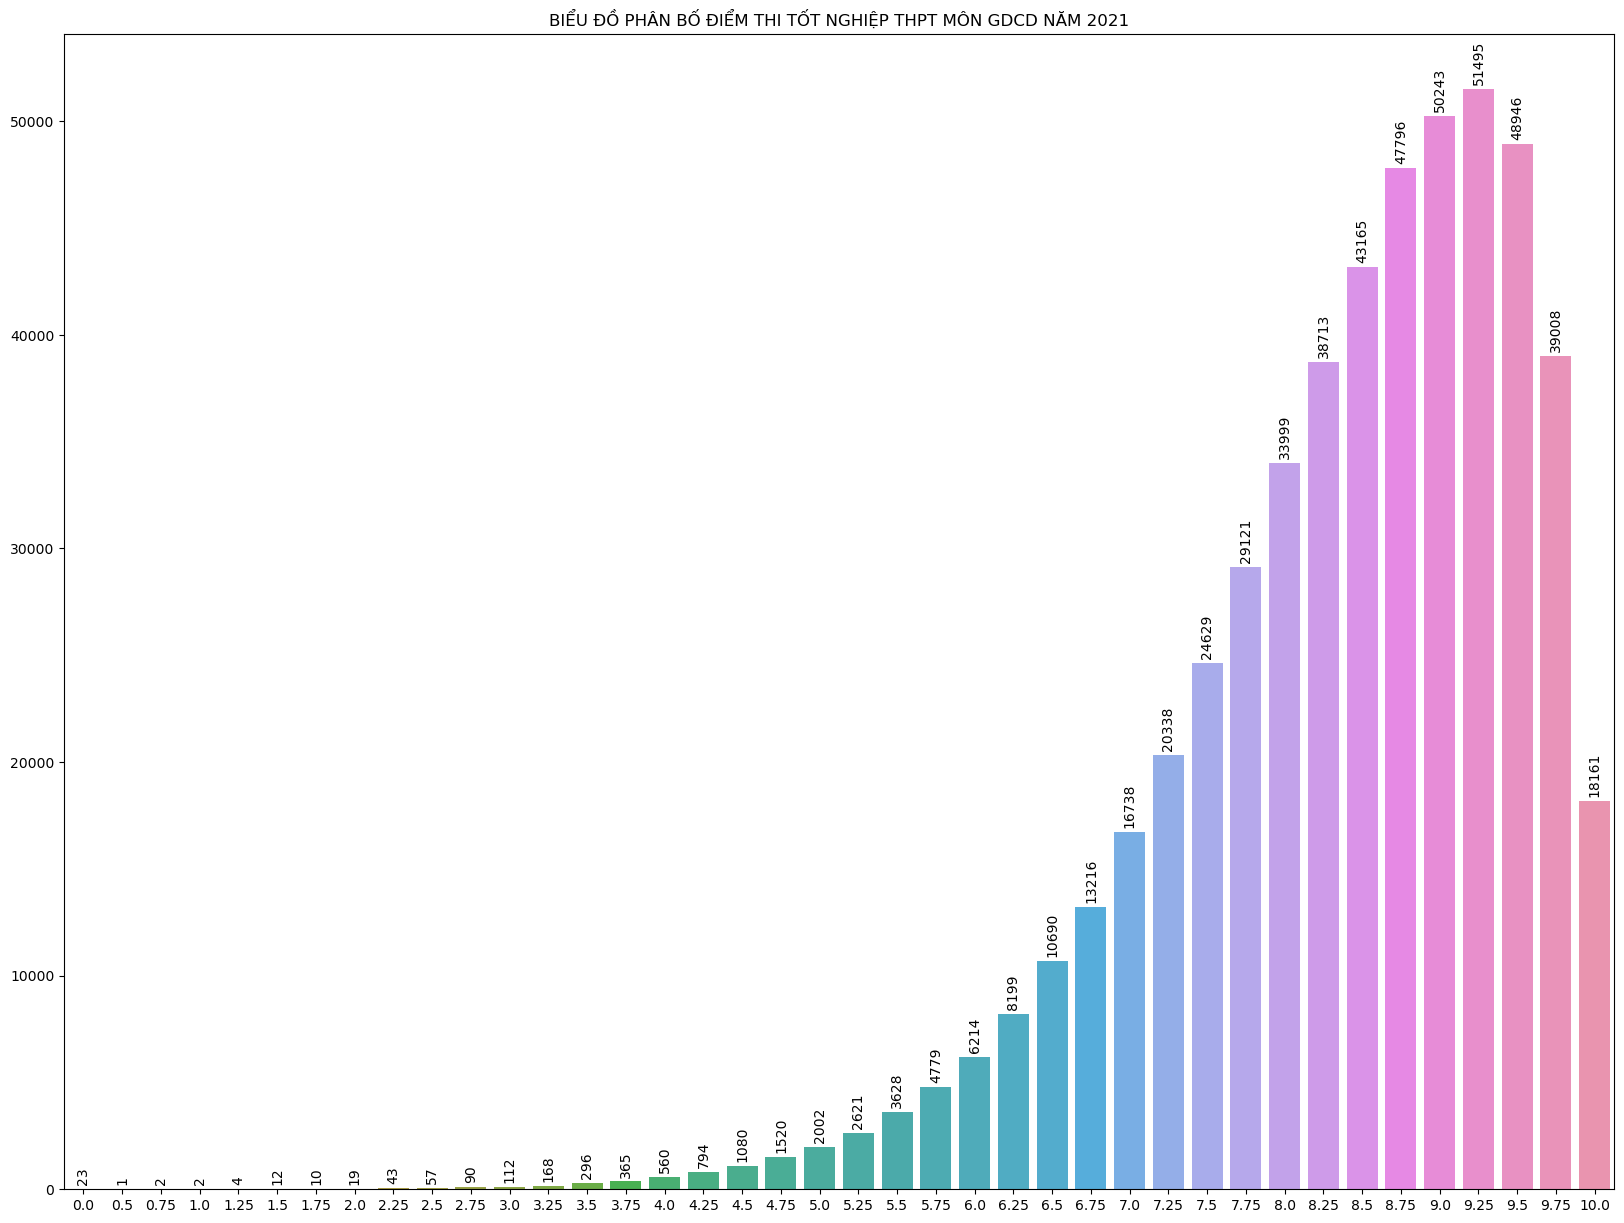

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn GDCD của cả nước năm 2021 cho thấy: Có 518859 thí sinh tham gia thi bài thi GDCD trong đó điểm trung bình là 8.38 điểm, điểm trung vị là 8.50 điểm, điểm số có nhiều thí sinh đạt nhất là 9.25 điểm. Số thí sinh có điểm <= 1 là 28 (chiếm tỉ lệ 0.005%); số thí sinh dưới trung bình là 5158 (chiếm tỉ lệ 0.994%); có 18161 thí sinh đạt điểm 10.


In [20]:
# draw histogram for each subject using seaborn histogram
for subject in SUBJECT_NAMES:
	fig, ax = plt.subplots(figsize=(20, 15))
	sns.barplot(data=grade_dict[subject], x='grade', y='count', ax=ax)
	ax.set_title(f'BIỂU ĐỒ PHÂN BỐ ĐIỂM THI TỐT NGHIỆP THPT MÔN {subject.upper()} NĂM {year}')
	ax.set_xlabel(None)
	ax.set_ylabel(None)
	ax.bar_label(ax.containers[0], rotation=90, padding=3)
	plt.show()
	analyze(grade_dict[subject], subject, year)

Cuối cùng là năm 2022.

In [21]:
year = '2022'
grade_dict = {}
for subject in SUBJECT_NAMES:
	grade_dict[subject] = grade_df[year][subject].dropna()
	grade_dict[subject] = grade_dict[subject].value_counts().sort_index()
	grade_dict[subject] = grade_dict[subject].rename_axis('grade').reset_index(name='count')
	
grade_dict['Văn'].head(10)

grade  count
0   0.00     38
1   0.25     12
2   0.50     51
3   0.75     65
4   1.00     28
5   1.25    394
6   1.33      1
7   1.50    610
8   1.75    694
9   1.92      1

In [22]:
grade_dict['Văn']['grade'] = grade_dict['Văn']['grade'].apply(round_to_025)
grade_dict['Văn'] = grade_dict['Văn'].groupby('grade').sum().reset_index()
grade_dict['Văn'].head(10)

grade  count
0   0.00     38
1   0.25     12
2   0.50     51
3   0.75     65
4   1.00     28
5   1.25    395
6   1.50    610
7   1.75    694
8   2.00   1262
9   2.25   1520

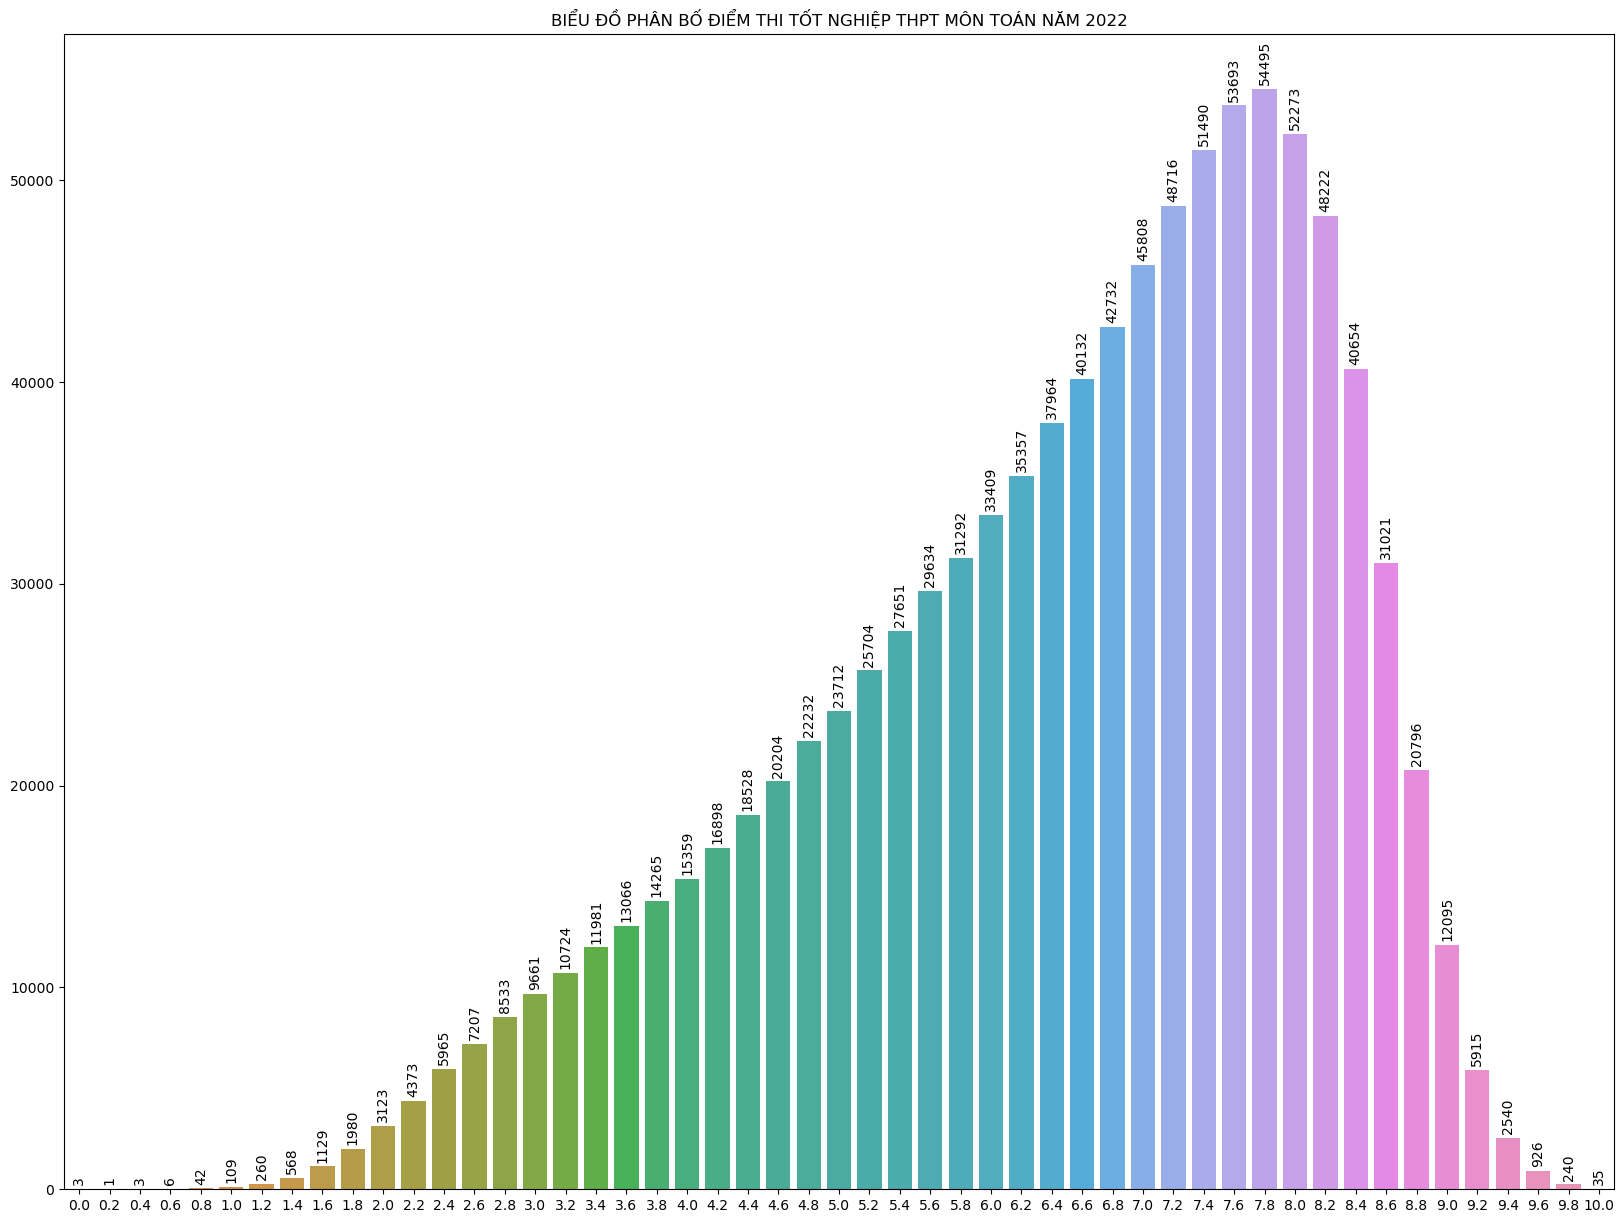

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Toán của cả nước năm 2022 cho thấy: Có 982726 thí sinh tham gia thi bài thi Toán trong đó điểm trung bình là 6.47 điểm, điểm trung vị là 6.80 điểm, điểm số có nhiều thí sinh đạt nhất là 7.80 điểm. Số thí sinh có điểm <= 1 là 164 (chiếm tỉ lệ 0.017%); số thí sinh dưới trung bình là 186220 (chiếm tỉ lệ 18.949%); có 35 thí sinh đạt điểm 10.


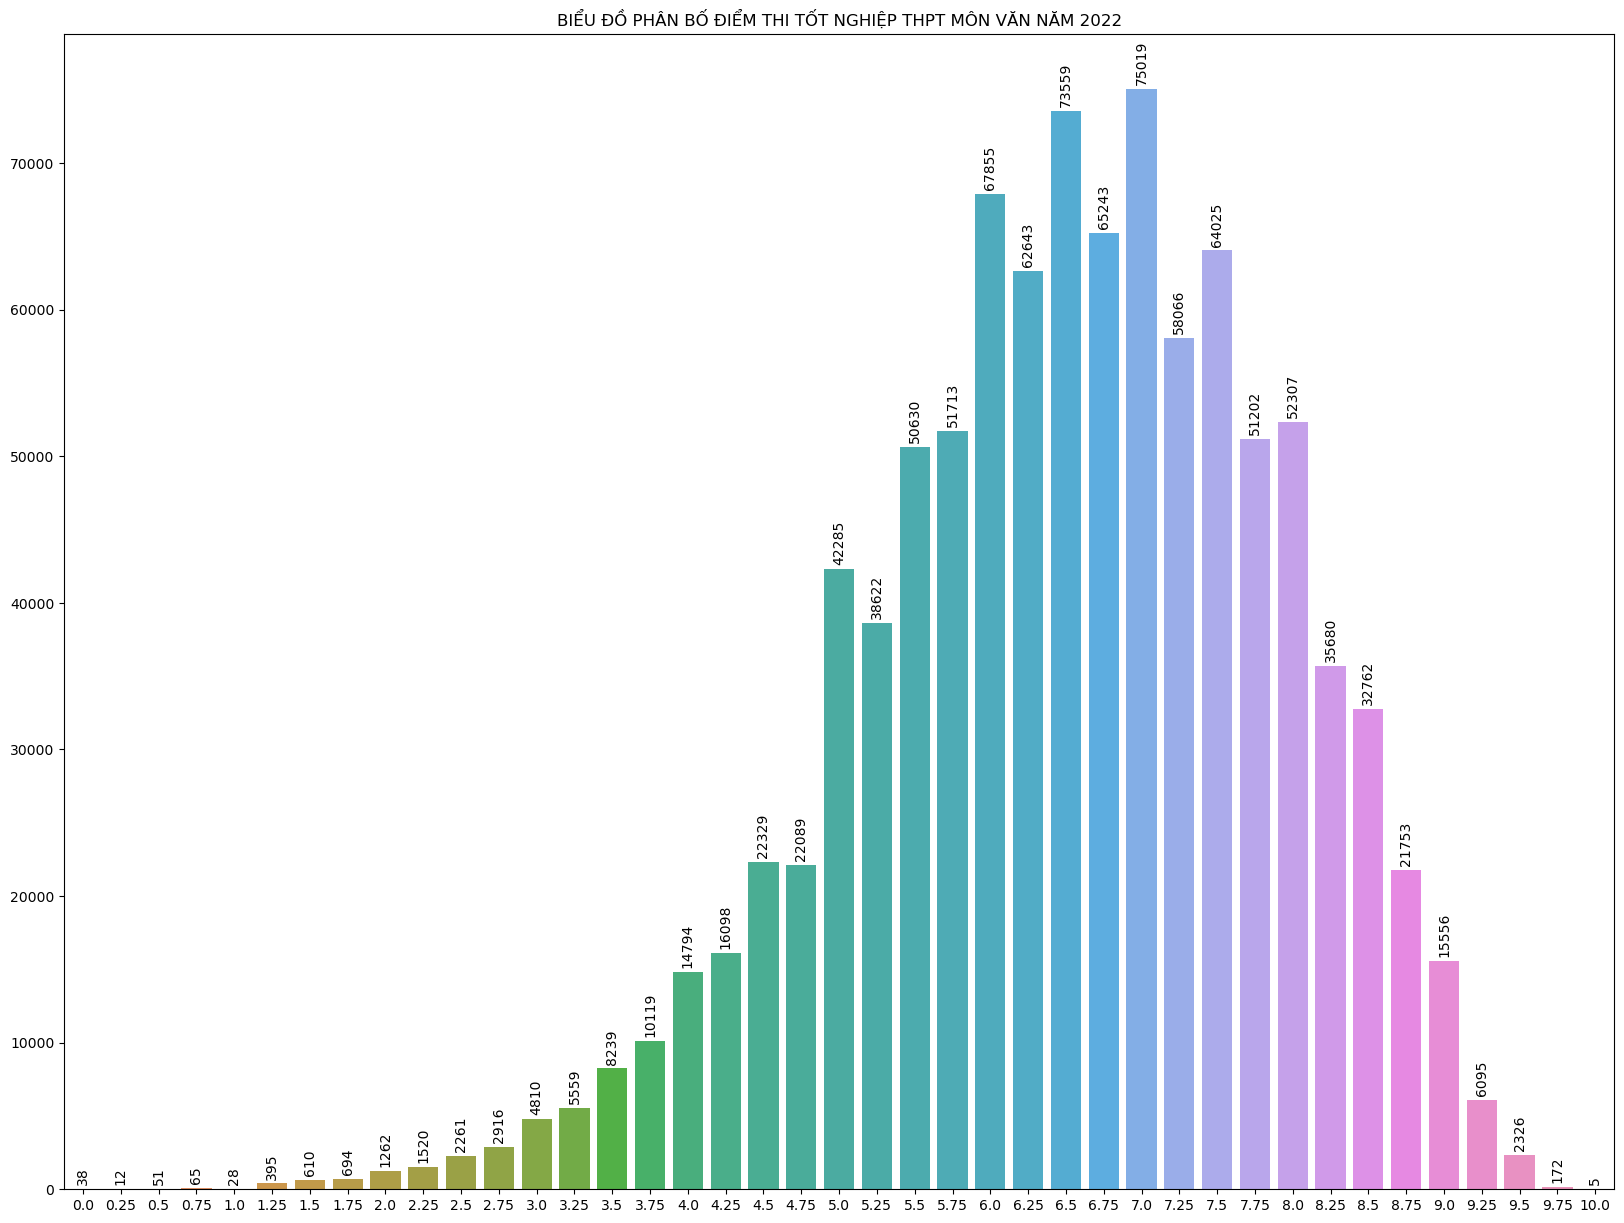

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Văn của cả nước năm 2022 cho thấy: Có 981407 thí sinh tham gia thi bài thi Văn trong đó điểm trung bình là 6.51 điểm, điểm trung vị là 6.50 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 194 (chiếm tỉ lệ 0.020%); số thí sinh dưới trung bình là 113889 (chiếm tỉ lệ 11.605%); có 5 thí sinh đạt điểm 10.


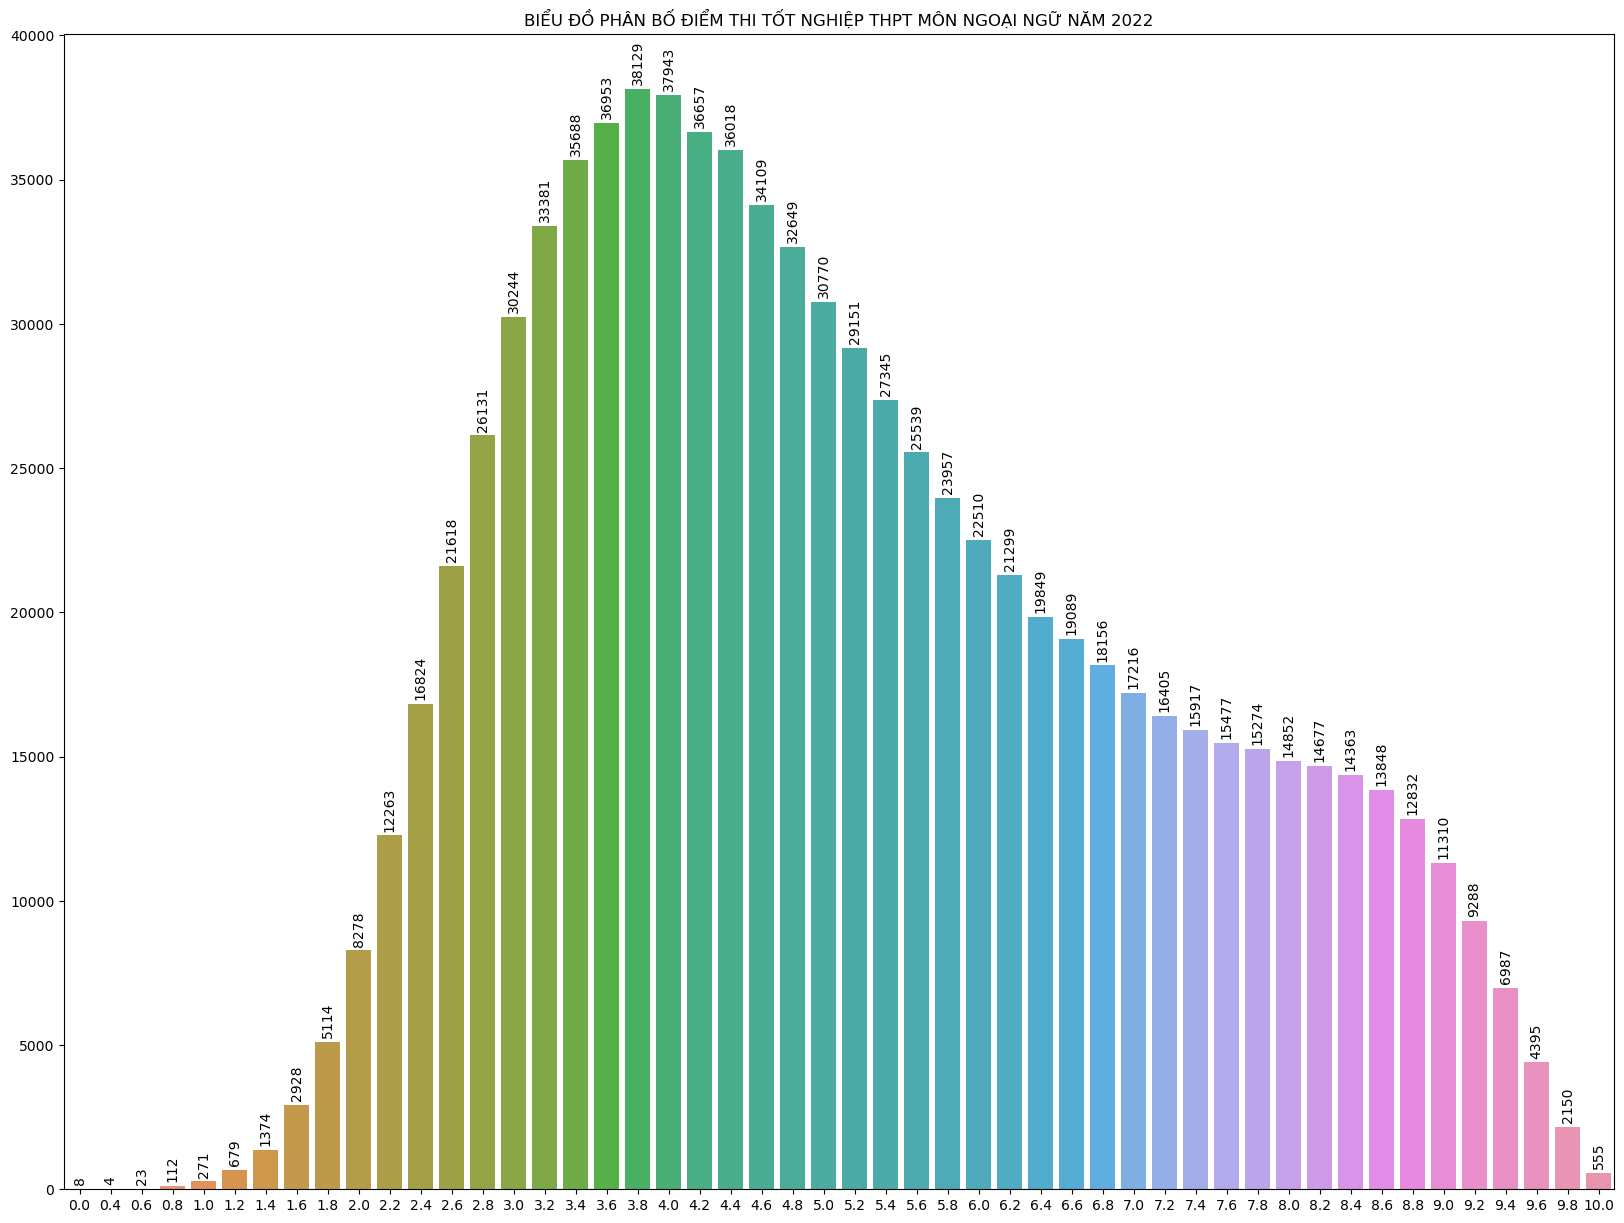

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Ngoại ngữ của cả nước năm 2022 cho thấy: Có 870609 thí sinh tham gia thi bài thi Ngoại ngữ trong đó điểm trung bình là 5.16 điểm, điểm trung vị là 4.80 điểm, điểm số có nhiều thí sinh đạt nhất là 3.80 điểm. Số thí sinh có điểm <= 1 là 418 (chiếm tỉ lệ 0.048%); số thí sinh dưới trung bình là 447398 (chiếm tỉ lệ 51.389%); có 555 thí sinh đạt điểm 10.


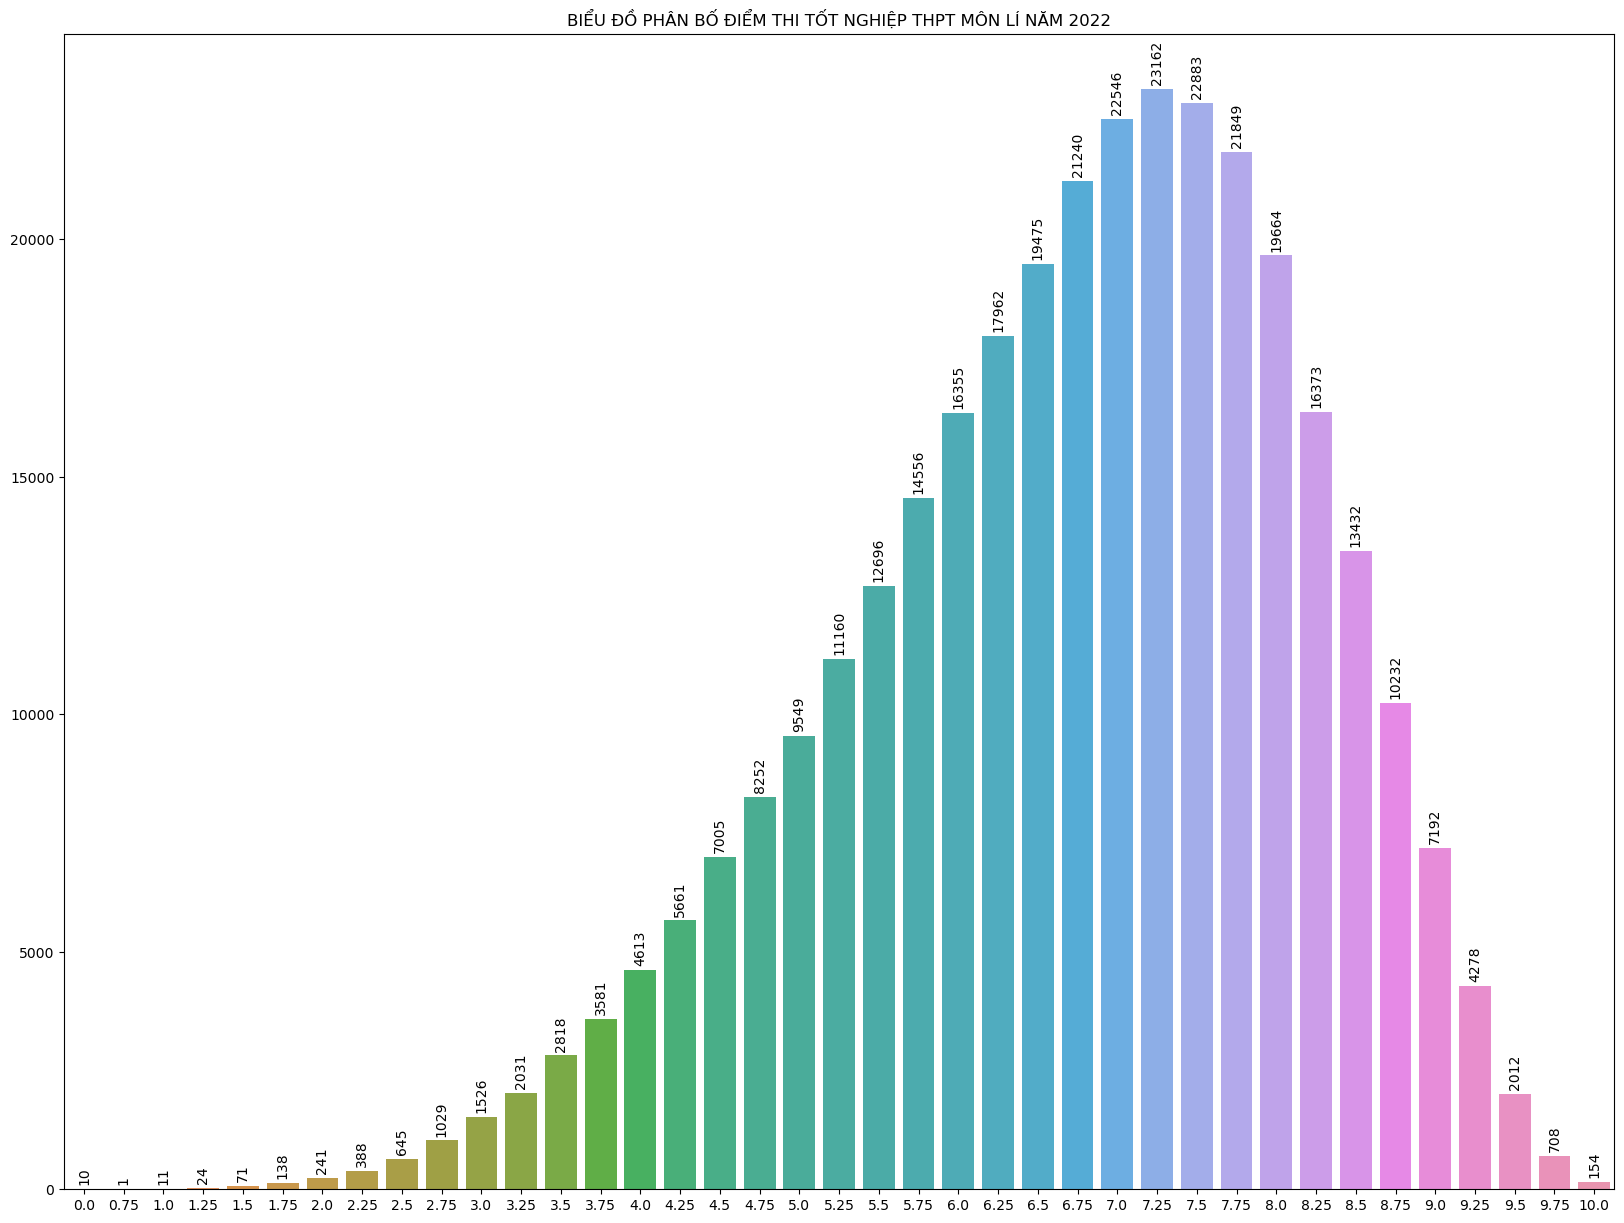

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Lí của cả nước năm 2022 cho thấy: Có 325523 thí sinh tham gia thi bài thi Lí trong đó điểm trung bình là 6.72 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.25 điểm. Số thí sinh có điểm <= 1 là 22 (chiếm tỉ lệ 0.007%); số thí sinh dưới trung bình là 38045 (chiếm tỉ lệ 11.687%); có 154 thí sinh đạt điểm 10.


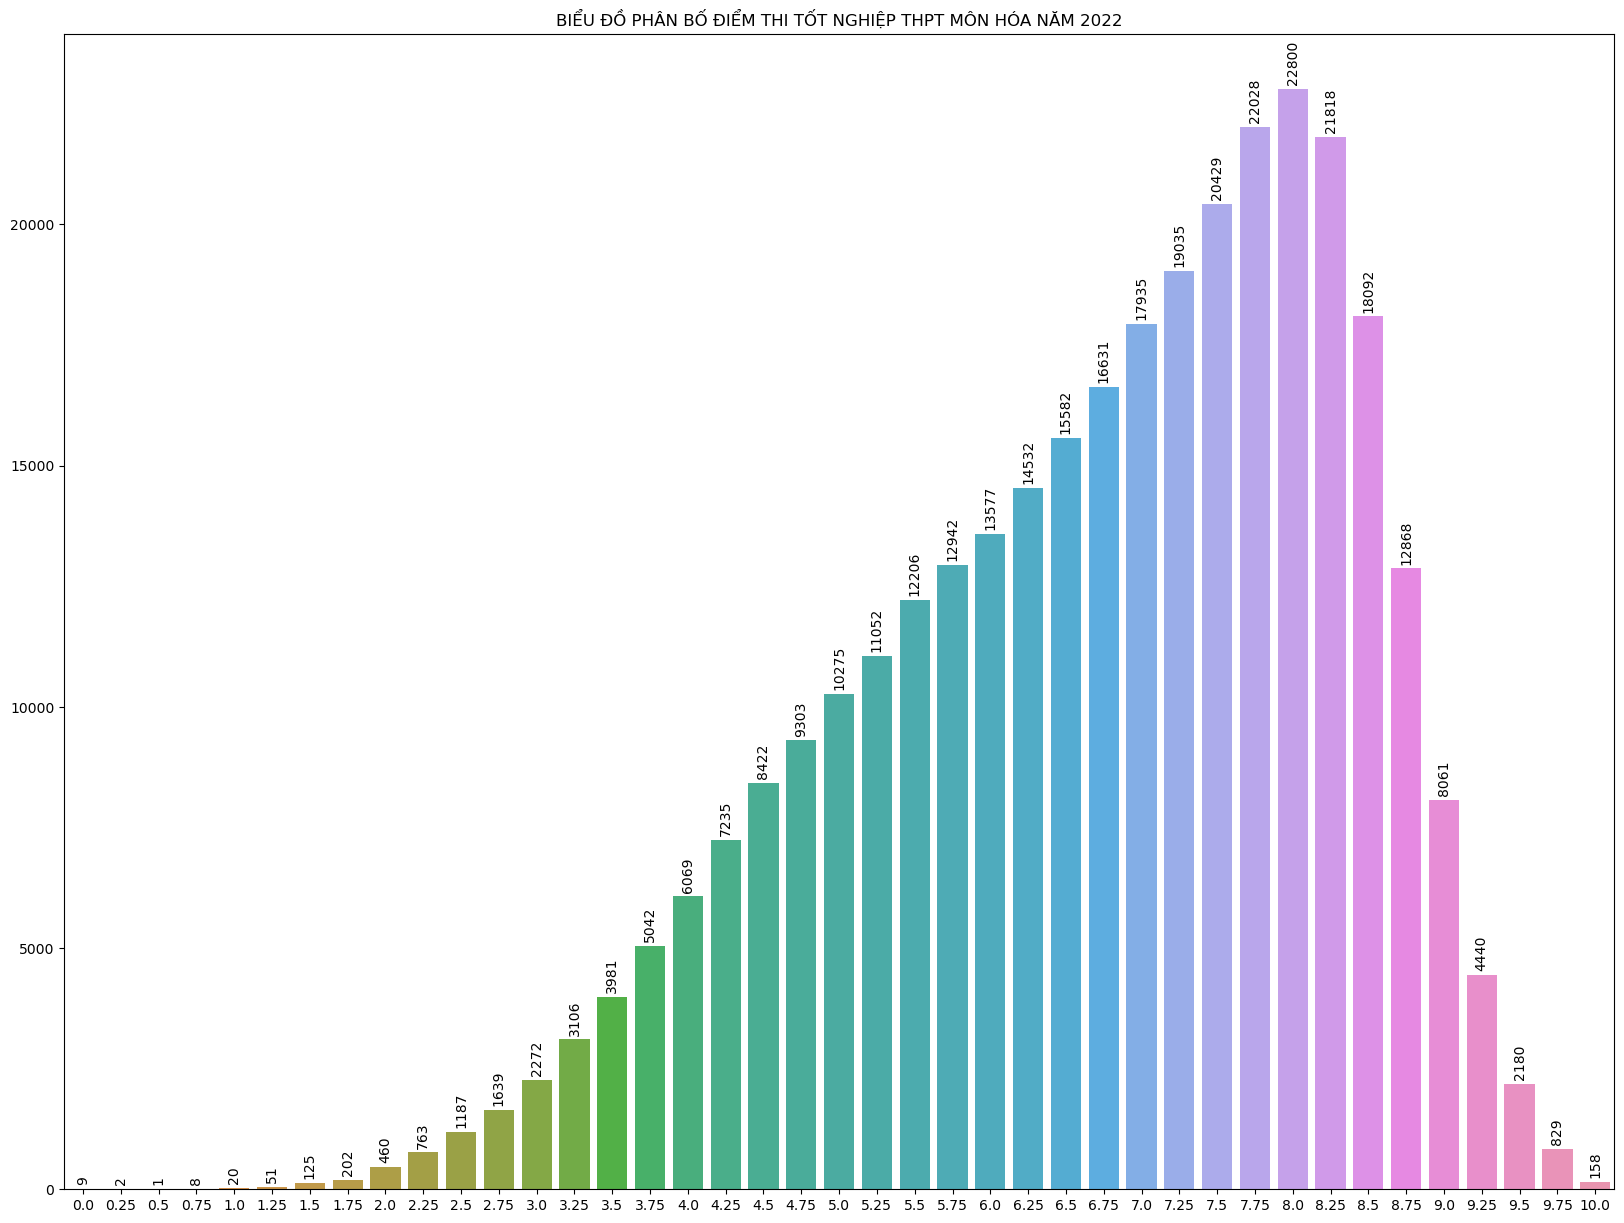

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Hóa của cả nước năm 2022 cho thấy: Có 327367 thí sinh tham gia thi bài thi Hóa trong đó điểm trung bình là 6.70 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 8.00 điểm. Số thí sinh có điểm <= 1 là 40 (chiếm tỉ lệ 0.012%); số thí sinh dưới trung bình là 49897 (chiếm tỉ lệ 15.242%); có 158 thí sinh đạt điểm 10.


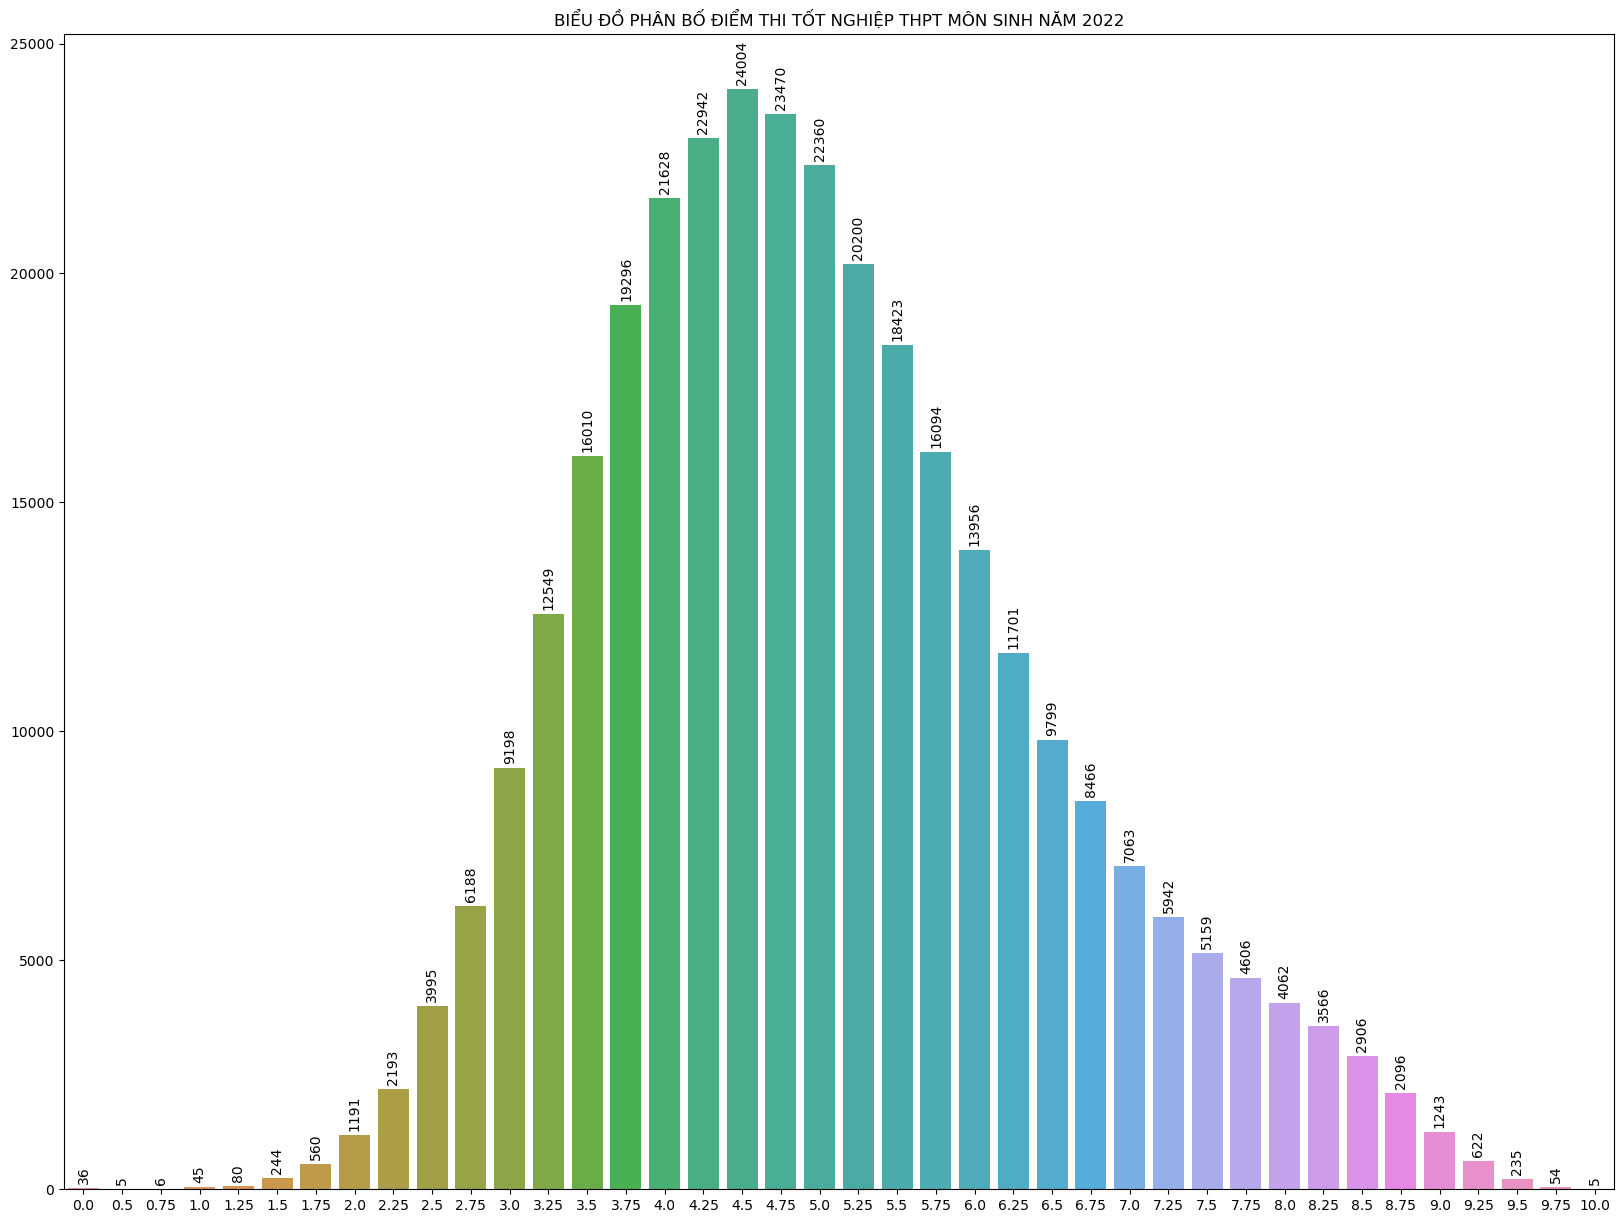

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sinh của cả nước năm 2022 cho thấy: Có 322198 thí sinh tham gia thi bài thi Sinh trong đó điểm trung bình là 5.02 điểm, điểm trung vị là 4.75 điểm, điểm số có nhiều thí sinh đạt nhất là 4.50 điểm. Số thí sinh có điểm <= 1 là 92 (chiếm tỉ lệ 0.029%); số thí sinh dưới trung bình là 163640 (chiếm tỉ lệ 50.789%); có 5 thí sinh đạt điểm 10.


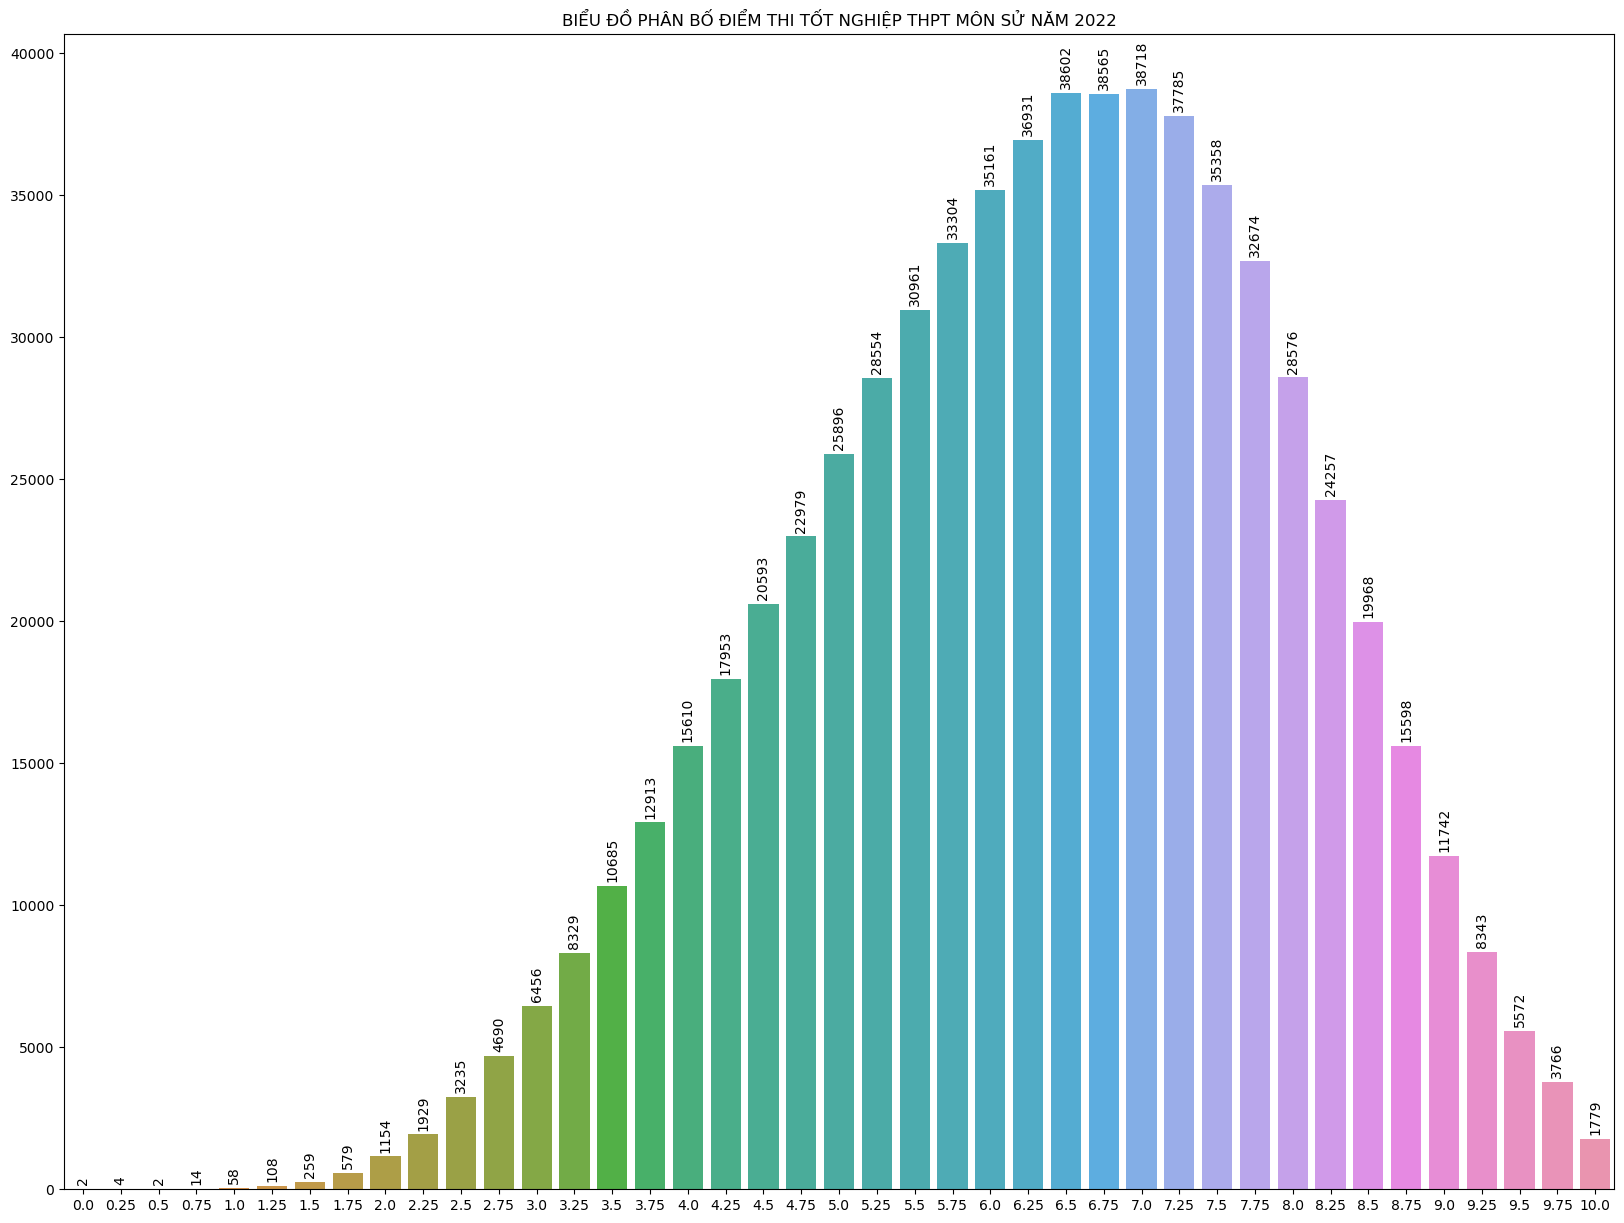

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sử của cả nước năm 2022 cho thấy: Có 659662 thí sinh tham gia thi bài thi Sử trong đó điểm trung bình là 6.34 điểm, điểm trung vị là 6.50 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 80 (chiếm tỉ lệ 0.012%); số thí sinh dưới trung bình là 127552 (chiếm tỉ lệ 19.336%); có 1779 thí sinh đạt điểm 10.


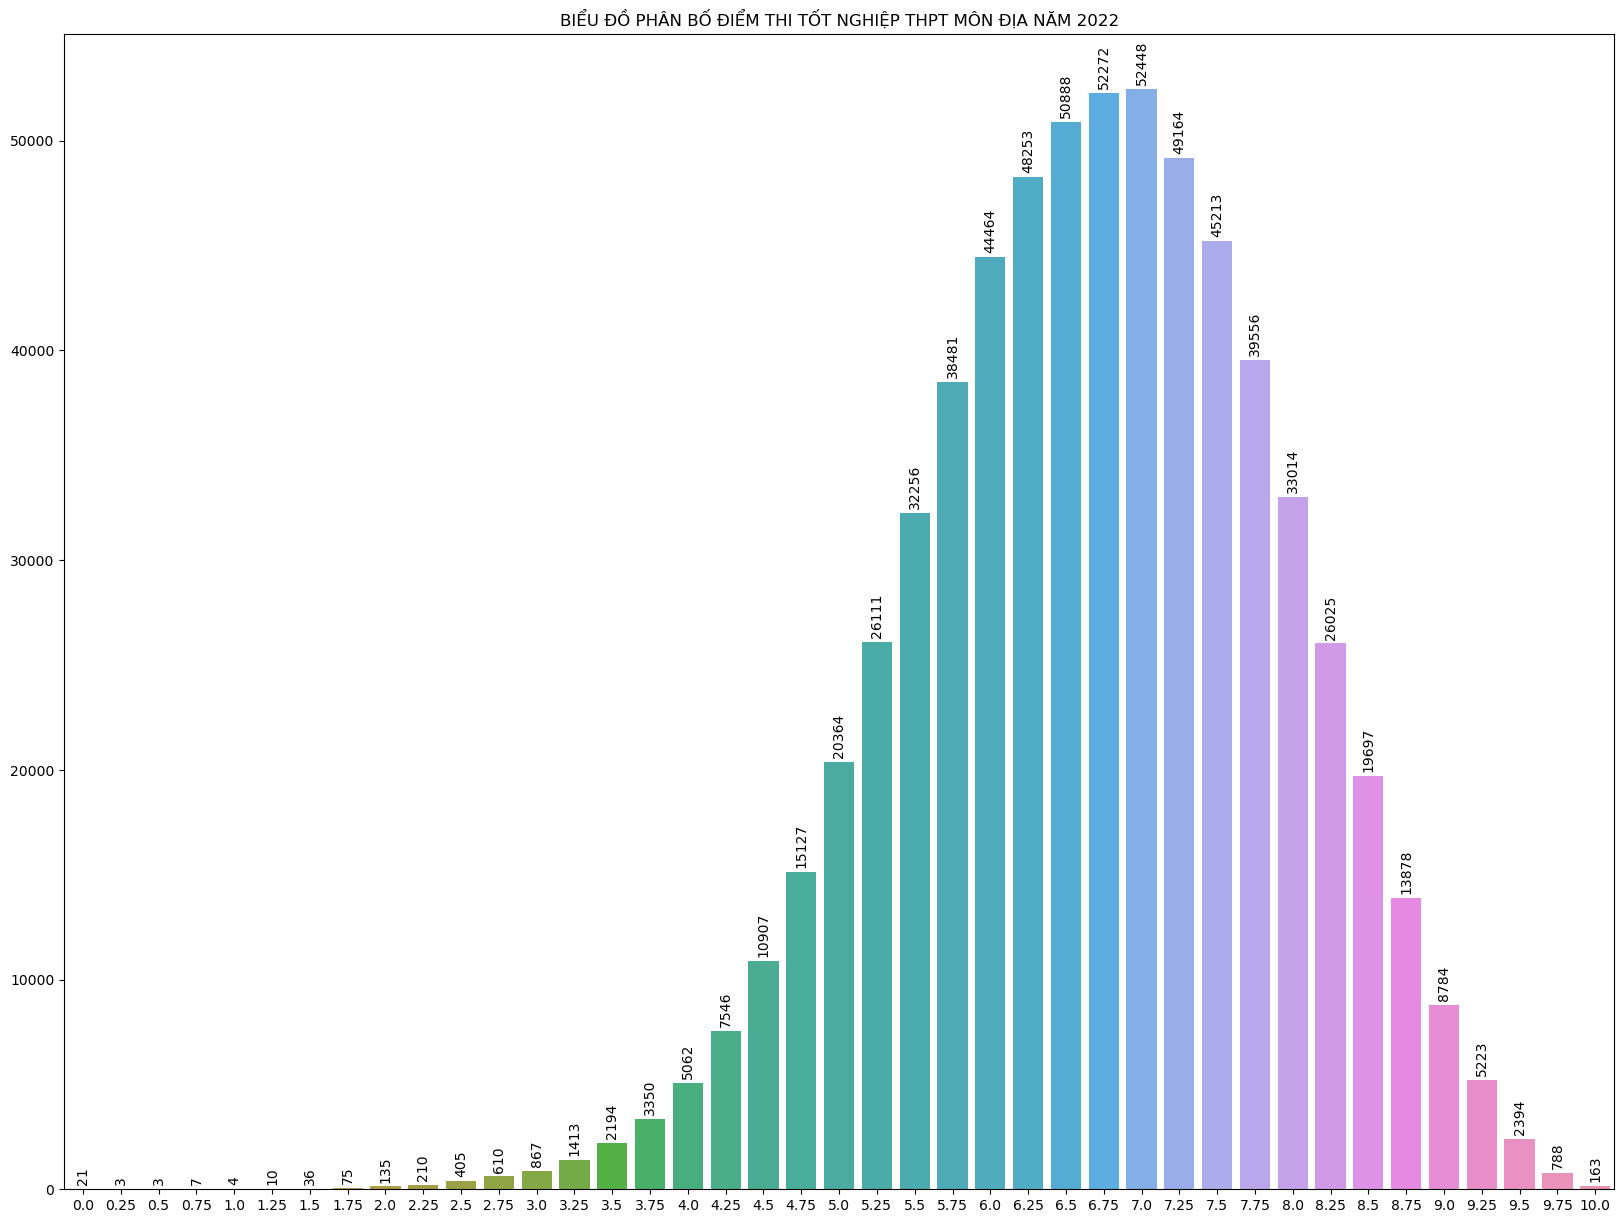

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Địa của cả nước năm 2022 cho thấy: Có 657421 thí sinh tham gia thi bài thi Địa trong đó điểm trung bình là 6.68 điểm, điểm trung vị là 6.75 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 38 (chiếm tỉ lệ 0.006%); số thí sinh dưới trung bình là 47985 (chiếm tỉ lệ 7.299%); có 163 thí sinh đạt điểm 10.


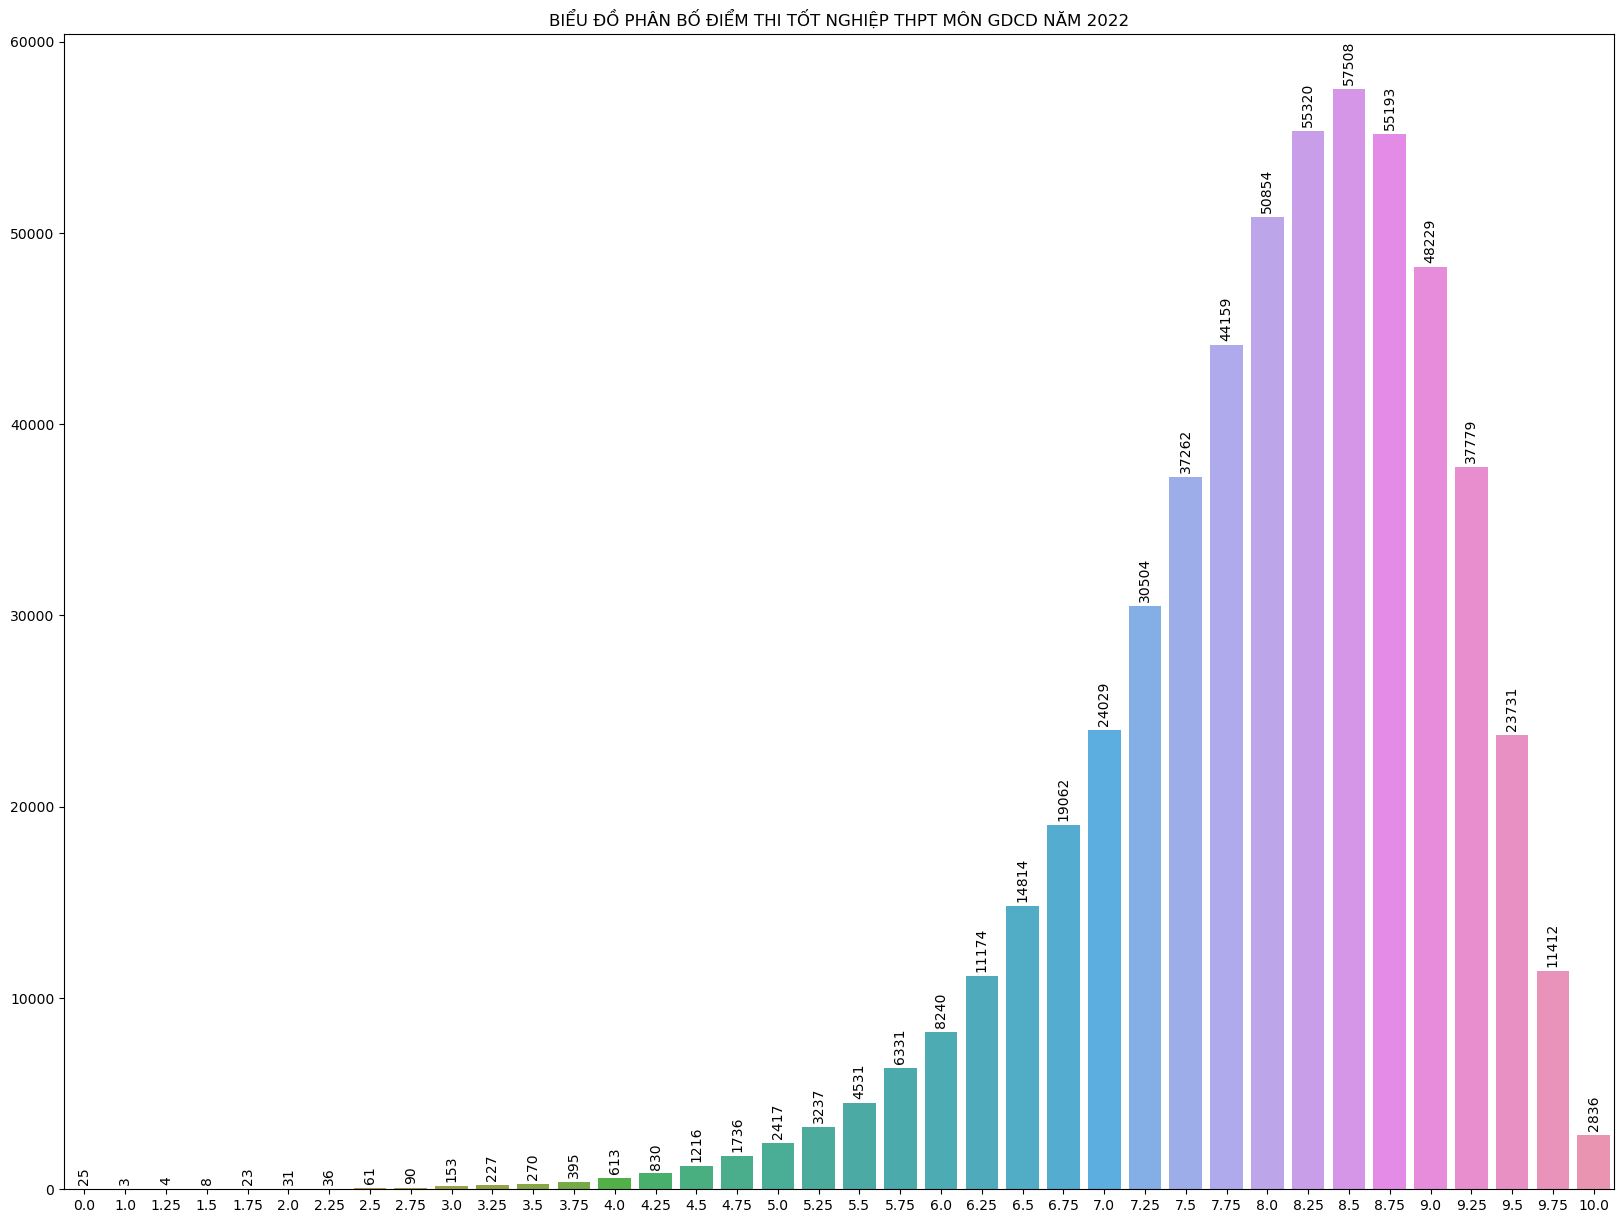

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn GDCD của cả nước năm 2022 cho thấy: Có 554343 thí sinh tham gia thi bài thi GDCD trong đó điểm trung bình là 8.03 điểm, điểm trung vị là 8.25 điểm, điểm số có nhiều thí sinh đạt nhất là 8.50 điểm. Số thí sinh có điểm <= 1 là 28 (chiếm tỉ lệ 0.005%); số thí sinh dưới trung bình là 5721 (chiếm tỉ lệ 1.032%); có 2836 thí sinh đạt điểm 10.


In [23]:
# draw histogram for each subject using seaborn histogram
for subject in SUBJECT_NAMES:
	fig, ax = plt.subplots(figsize=(20, 15))
	sns.barplot(data=grade_dict[subject], x='grade', y='count', ax=ax)
	ax.set_title(f'BIỂU ĐỒ PHÂN BỐ ĐIỂM THI TỐT NGHIỆP THPT MÔN {subject.upper()} NĂM {year}')
	ax.set_xlabel(None)
	ax.set_ylabel(None)
	ax.bar_label(ax.containers[0], rotation=90, padding=3)
	plt.show()
	analyze(grade_dict[subject], subject, year)

## Câu hỏi 2

### Nội dung câu hỏi
Số lượng theo xếp loại tốt nghiệp qua từng năm?

### Ý nghĩa khi trả lời được câu hỏi
Giúp ta biết sự thay đổi ở tổng số thí sinh tham dự kỳ thi nói chung và số lượng theo xếp loại tốt nghiệp nói riêng qua ba năm 2020, 2021 và 2022. Từ đó, ta có thể đưa ra những nhận định về độ khó của đề thi từng năm.

### Tiền xử lý

Tạo bản sao cho `grade_df`.

In [24]:
year = ['2020', '2021', '2022']
grade_df_copy = {}
for y in year:
    grade_df_copy[y] = grade_df[y].copy()

Tính điểm xét loại cho từng thí sinh bằng cách thêm cột `'ĐXLTN'`, biết:
- Điểm xét loại tốt nghiệp đối với hệ THPT = (Toán + Văn + Ngoại ngữ + TB-KHTN (hoặc TB-KHXH)) / 4
- Điểm xét loại tốt nghiệp đối với hệ GDTX = (Toán + Văn + Ngoại ngữ) / 3
Bên cạnh đó, các cột `'TB-KHTN'`, `'TB-KHXH'`, `'Ngoại ngữ'` cũng cần đổi tên thành `'TBKHTN'`, `'TBKHXH'`, `'Ngoại_ngữ'` để có thể thực hiện truy vấn ở bước Phân tích dữ liệu để trả lời cho các câu hỏi.

In [25]:
for y in year:
    grade_df_copy[y]['ĐXLTN'] = grade_df_copy[y][['Toán', 'Văn', 'Ngoại ngữ', 'TB-KHTN', 'TB-KHXH']].mean(axis=1, skipna=True)
    grade_df_copy[y] = grade_df_copy[y].rename({'TB-KHTN':'TBKHTN', 'TB-KHXH':'TBKHXH', 'Ngoại ngữ':'Ngoại_ngữ'}, axis=1)

### Phân tích dữ liệu để trả lời cho các câu hỏi
Để trả lời cho câu hỏi này, ta sẽ làm như sau:

Bước 1: Tạo dataframe `num_xeploai` để lưu số lượng theo xếp loại tốt nghiệp qua từng năm, biết điều kiện xếp loại như sau:

    Giỏi:         ĐXLTN >= 8      và      tất cả bài thi >= 7
    Khá:          ĐXLTN >= 6.5    và      tất cả bài thi >= 7
    Trung bình:   ĐXLTN >= 5      và      tất cả bài thi >  1
    Trượt:        ĐXLTN <  5      hoặc    có một bài thi <= 1

Bước 2:
- Vẽ biểu đồ miền (stacked area chart) để trực quan cho số lượng theo xếp loại tốt nghiệp qua từng năm.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

Code bước 1:

In [26]:
num_xeploai = {}
for y in year:
    num_xeploai[y]  = {'Giỏi':len(grade_df_copy[y].query('ĐXLTN >= 8 & Toán >= 7 & Văn >= 7 & Ngoại_ngữ >= 7 & (TBKHTN >= 7 | TBKHXH >= 7)'))}
    num_xeploai[y] |= {'Khá':len(grade_df_copy[y].query('ĐXLTN >= 6.5 & Toán >= 6 & Văn >= 6 & Ngoại_ngữ >= 6 & (TBKHTN >= 6 | TBKHXH >= 6)')) - num_xeploai[y]['Giỏi']}
    num_xeploai[y] |= {'Trung bình':len(grade_df_copy[y].query('ĐXLTN >= 5 & Toán > 1 & Văn > 1 & Ngoại_ngữ > 1 & (TBKHTN > 1 | TBKHXH > 1)')) - num_xeploai[y]['Giỏi'] - num_xeploai[y]['Khá']}
    num_xeploai[y] |= {'Trượt':len(grade_df_copy[y]) - num_xeploai[y]['Giỏi'] - num_xeploai[y]['Khá'] - num_xeploai[y]['Trung bình']}
    num_xeploai[y]
num_xeploai = pd.DataFrame(num_xeploai)
print('Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này:')
num_xeploai

Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này:


2020    2021    2022
Giỏi         24015   58125   40888
Khá         102840  200048  151491
Trung bình  530240  480303  555019
Trượt       213391  222426  248043

Code bước 2:

Chúng ta hãy nhìn vào sự thay đổi ở số lượng theo xếp loại tốt nghiệp qua từng năm


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_58536\3781736901.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


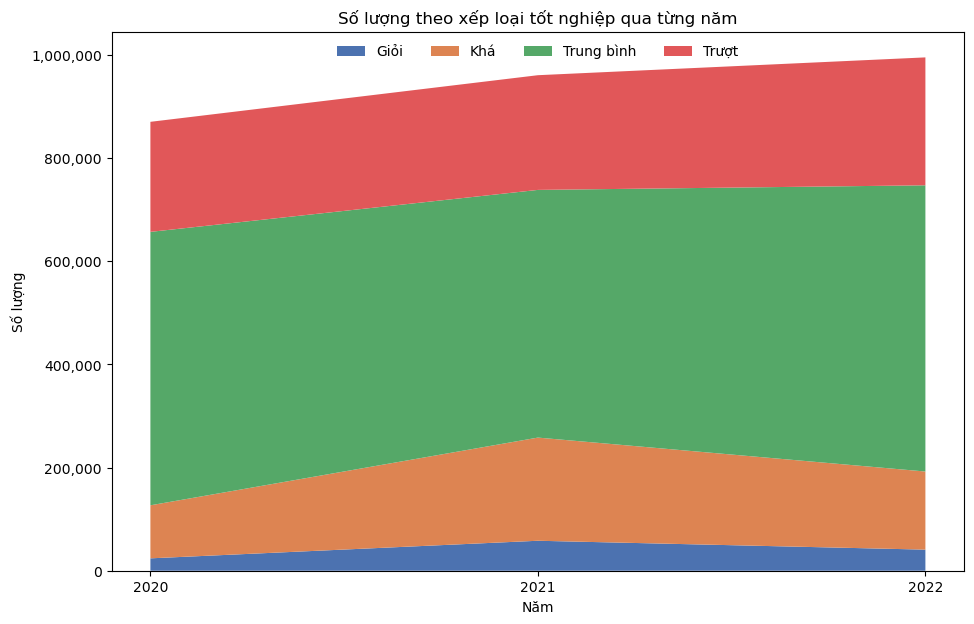

In [38]:
color_map = ['#4C72B0', '#DD8452', '#55A868', '#E15759']
fig = plt.figure(figsize=(11, 7))
plt.stackplot(year, num_xeploai.loc[['Giỏi']], num_xeploai.loc[['Khá']], num_xeploai.loc[['Trung bình']], num_xeploai.loc[['Trượt']],
              labels=num_xeploai.index,
              colors=color_map)
plt.legend(loc='upper center', frameon=False, ncol=len(num_xeploai.index))
plt.title('Số lượng theo xếp loại tốt nghiệp qua từng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
print('Chúng ta hãy nhìn vào sự thay đổi ở số lượng theo xếp loại tốt nghiệp qua từng năm')
plt.show()

### Nhận xét
- Tổng số thí sinh tham dự kỳ thi tăng đều qua từng năm.
- Số lượng thí sinh bị trượt nhiều nhất vào năm 2022.
- Ở năm 2021, số lượng thí sinh xếp loại giỏi, khá nhiều hơn và xếp loại trung bình ít hơn so với hai năm còn lại. Nếu giả định số lượng theo xếp loại tốt nghiệp phản ánh mức độ khó dễ của đề bài, thì ta có thể kết luận rằng đề thi vào năm 2021 sẽ có phần dễ đối với thí sinh năm đó hơn hai năm còn lại.

## Câu hỏi 3

### Nội dung câu hỏi
So sánh theo tỉ lệ dự thi và tỉ lệ xếp loại giỏi giữa 6 vùng kinh tế - xã hội của Việt Nam qua từng năm?

### Ý nghĩa khi trả lời được câu hỏi
Giúp ta biết được sự thay đổi ở tỉ lệ tham dự kỳ thi và tỉ lệ xếp loại giỏi của các vùng miền qua từng năm. Từ đó, đưa ra kết luận về vùng miền nào có nhiều thí sinh đạt loại giỏi về xếp loại tốt nghiệp trong ba năm 2020, 2021 và 2022.

### Tiền xử lý

Tạo bản sao cho `grade_df`.

In [28]:
year = ['2020', '2021', '2022']
grade_df_copy = {}
for y in year:
    grade_df_copy[y] = grade_df[y].copy()

Phân chia vùng miền bằng cách thêm hai cột `'Vùng'` và `'Miền'`.

In [30]:
vung = {'LAI CHÂU'      :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'ĐIỆN BIÊN'     :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'LÀO CAI'       :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'HÀ GIANG'      :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'SƠN LA'        :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'YÊN BÁI'       :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'TUYÊN QUANG'   :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'CAO BẰNG'      :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'PHÚ THỌ'       :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'BẮC KẠN'       :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'HÒA BÌNH'      :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'THÁI NGUYÊN'   :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'LẠNG SƠN'      :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        'BẮC GIANG'     :'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC',
        
        'VĨNH PHÚC'     :'ĐỒNG BẰNG SÔNG HỒNG',
        'HÀ NỘI'        :'ĐỒNG BẰNG SÔNG HỒNG',
        'BẮC NINH'      :'ĐỒNG BẰNG SÔNG HỒNG',
        'NINH BÌNH'     :'ĐỒNG BẰNG SÔNG HỒNG',
        'HÀ NAM'        :'ĐỒNG BẰNG SÔNG HỒNG',
        'HƯNG YÊN'      :'ĐỒNG BẰNG SÔNG HỒNG',
        'HẢI DƯƠNG'     :'ĐỒNG BẰNG SÔNG HỒNG',
        'NAM ĐỊNH'      :'ĐỒNG BẰNG SÔNG HỒNG',
        'THÁI BÌNH'     :'ĐỒNG BẰNG SÔNG HỒNG',
        'HẢI PHÒNG'     :'ĐỒNG BẰNG SÔNG HỒNG',
        'QUẢNG NINH'    :'ĐỒNG BẰNG SÔNG HỒNG',
        
        'THANH HÓA'             :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'NGHỆ AN'               :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'HÀ TĨNH'               :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'QUẢNG BÌNH'            :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'QUẢNG TRỊ'             :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'THỪA THIÊN - HUẾ'      :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'QUẢNG NAM'             :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'ĐÀ NẴNG'               :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'QUẢNG NGÃI'            :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'BÌNH ĐỊNH'             :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'PHÚ YÊN'               :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'KHÁNH HÒA'             :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'NINH THUẬN'            :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        'BÌNH THUẬN'            :'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG',
        
        'KON TUM'       :'TÂY NGUYÊN',
        'GIA LAI'       :'TÂY NGUYÊN',
        'ĐẮK LẮK'       :'TÂY NGUYÊN',
        'ĐẮK NÔNG'      :'TÂY NGUYÊN',
        'LÂM ĐỒNG'      :'TÂY NGUYÊN',
        
        'TÂY NINH'              :'ĐÔNG NAM BỘ',
        'BÌNH PHƯỚC'            :'ĐÔNG NAM BỘ',
        'BÌNH DƯƠNG'            :'ĐÔNG NAM BỘ',
        'HỒ CHÍ MINH'           :'ĐÔNG NAM BỘ',
        'ĐỒNG NAI'              :'ĐÔNG NAM BỘ',
        'BÀ RỊA - VŨNG TÀU'     :'ĐÔNG NAM BỘ',
        
        'AN GIANG'      :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'ĐỒNG THÁP'     :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'LONG AN'       :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'KIÊN GIANG'    :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'CẦN THƠ'       :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'TIỀN GIANG'    :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'HẬU GIANG'     :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'VĨNH LONG'     :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'CÀ MAU'        :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'BẠC LIÊU'      :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'SÓC TRĂNG'     :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'TRÀ VINH'      :'ĐỒNG BẰNG SÔNG CỬU LONG',
        'BẾN TRE'       :'ĐỒNG BẰNG SÔNG CỬU LONG'}

mien = {'TRUNG DU VÀ MIỀN NÚI PHÍA BẮC'         :'BẮC',
        'ĐỒNG BẰNG SÔNG HỒNG'                   :'BẮC',
        'BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG'  :'TRUNG',
        'TÂY NGUYÊN'                            :'TRUNG',
        'ĐÔNG NAM BỘ'                           :'NAM',
        'ĐỒNG BẰNG SÔNG CỬU LONG'               :'NAM'}

In [31]:
for y in year:
    grade_df_copy[y]['Vùng'] = grade_df_copy[y]['Tỉnh/Thành phố'].map(vung)
    grade_df_copy[y]['Miền'] = grade_df_copy[y]['Vùng'].map(mien)

### Phân tích dữ liệu để trả lời cho các câu hỏi
Để trả lời cho câu hỏi này, ta sẽ làm như sau:

Bước 1: Tạo hai dataframe `num_vungmien` và `num_gioi_vungmien` để lưu số lượng dự thi và số lượng xếp loại tốt nghiệp giỏi theo từng vùng miền qua từng năm.

Bước 2:
- Vẽ các biểu đồ bánh Doughnut (Doughnut Chart) để trực quan cho tỉ lệ dự thi và tỉ lệ xếp loại giỏi của các vùng miền qua từng năm.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

Code bước 1:

In [39]:
num_vungmien = {}
for y in year:
    num_vungmien[y] = pd.DataFrame(grade_df_copy[y][['Vùng', 'Miền']].groupby('Miền').value_counts())

num_vungmien = pd.concat([num_vungmien['2020'], num_vungmien['2021'], num_vungmien['2022']], axis=1)
num_vungmien.columns = year
print('Chúng ta hãy nhìn vào dataframe chứa số lượng dự thi theo từng vùng miền qua từng năm:')
num_vungmien

Chúng ta hãy nhìn vào dataframe chứa số lượng dự thi theo từng vùng miền qua từng năm:


2020    2021    2022
Miền  Vùng                                                        
BẮC   ĐỒNG BẰNG SÔNG HỒNG                   227148  271817  258593
      TRUNG DU VÀ MIỀN NÚI PHÍA BẮC         121321  131588  129663
NAM   ĐỒNG BẰNG SÔNG CỬU LONG               138811  130940  156209
      ĐÔNG NAM BỘ                           132409  140697  149221
TRUNG BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG  188093  213563  228987
      TÂY NGUYÊN                             45051   52659   53255

In [40]:
# Thực hiện việc chỉ lấy những thí sinh xếp loại giỏi tương tự như câu 2
for y in year:
    grade_df_copy[y]['ĐXLTN'] = grade_df_copy[y][['Toán', 'Văn', 'Ngoại ngữ', 'TB-KHTN', 'TB-KHXH']].mean(axis=1, skipna=True)
    grade_df_copy[y] = grade_df_copy[y].rename({'TB-KHTN':'TBKHTN', 'TB-KHXH':'TBKHXH', 'Ngoại ngữ':'Ngoại_ngữ'}, axis=1)
    
grade_gioi_df = {}
for y in year:
    grade_gioi_df[y]  = grade_df_copy[y].query('ĐXLTN >= 8 & Toán >= 7 & Văn >= 7 & Ngoại_ngữ >= 7 & (TBKHTN >= 7 | TBKHXH >= 7)')

num_gioi_vungmien = {}
for y in year:
    num_gioi_vungmien[y] = pd.DataFrame(grade_gioi_df[y][['Vùng', 'Miền']].groupby('Miền').value_counts())

num_gioi_vungmien = pd.concat([num_gioi_vungmien['2020'], num_gioi_vungmien['2021'], num_gioi_vungmien['2022']], axis=1)
num_gioi_vungmien.columns = year
print('Chúng ta hãy nhìn vào dataframe chứa số lượng xếp loại giỏi theo từng vùng miền qua từng năm:')
num_gioi_vungmien

Chúng ta hãy nhìn vào dataframe chứa số lượng xếp loại giỏi theo từng vùng miền qua từng năm:


2020   2021   2022
Miền  Vùng                                                     
BẮC   ĐỒNG BẰNG SÔNG HỒNG                   11028  25944  20059
      TRUNG DU VÀ MIỀN NÚI PHÍA BẮC          1723   5156   3707
NAM   ĐÔNG NAM BỘ                            4254   8420   5280
      ĐỒNG BẰNG SÔNG CỬU LONG                2565   6079   3216
TRUNG BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG   3279   9373   6860
      TÂY NGUYÊN                              705   2097   1188

Code bước 2:

Chúng ta hãy nhìn vào sự thay đổi ở tỉ lệ dự thi và tỉ lệ xếp loại giỏi theo từng vùng miền qua từng năm:


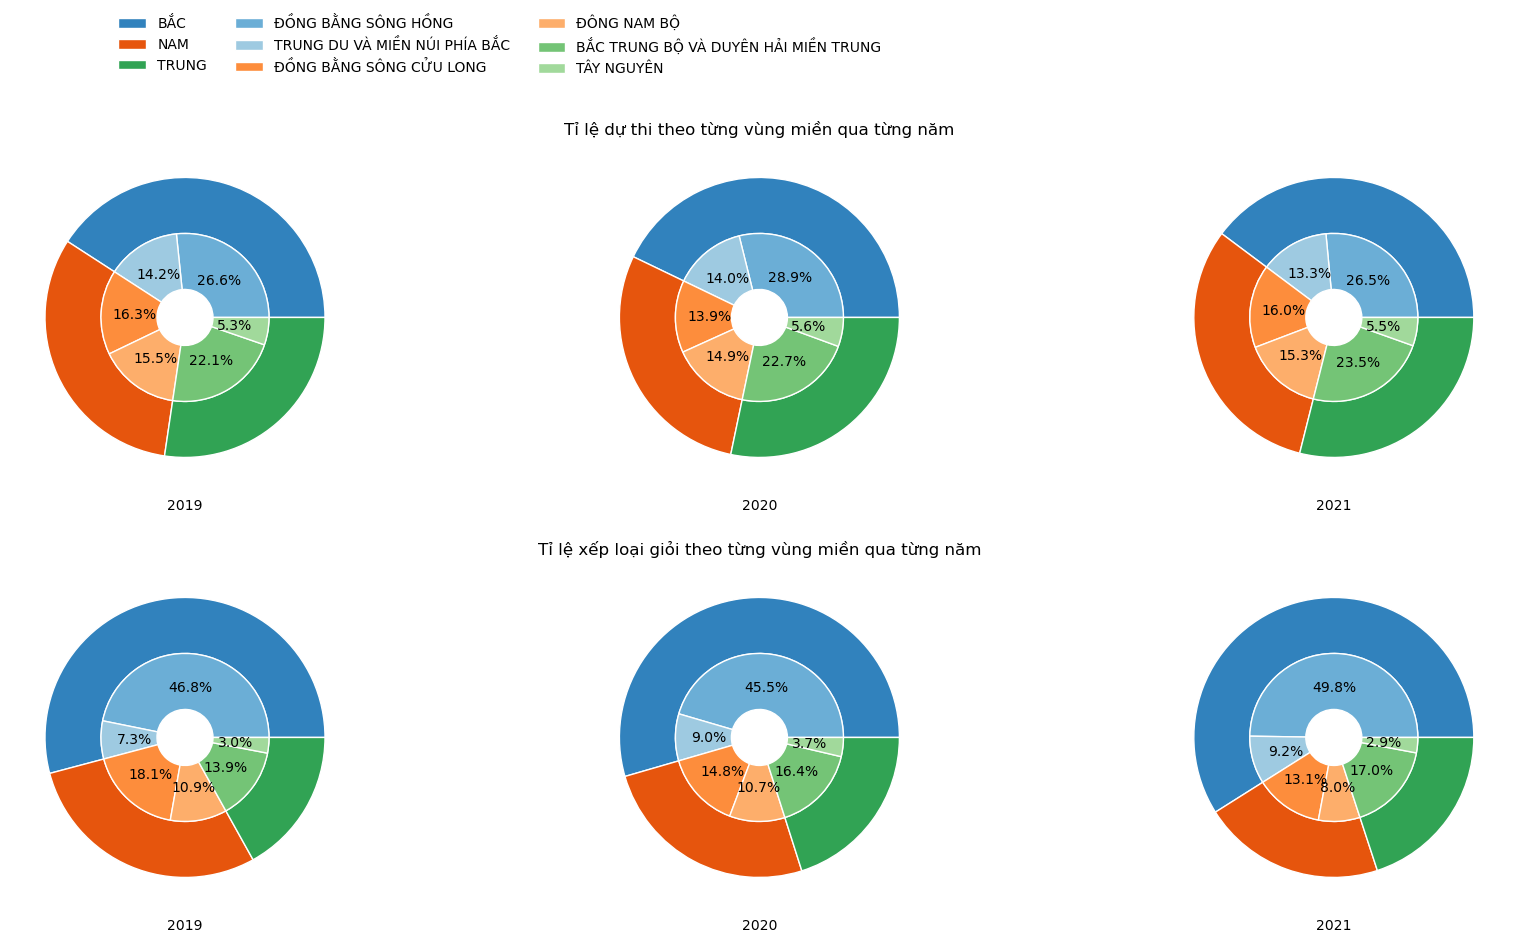

In [141]:
fig, ax = plt.subplots(2, len(num_vungmien.columns), figsize=(21, 10))
size = 0.4

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

for i in range(len(num_vungmien.columns)):
       ax[0][i].pie(num_vungmien[num_vungmien.columns[i]].groupby(level=[0]).sum(),
                    radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'))
       ax[0][i].pie(num_vungmien[num_vungmien.columns[i]],
                    autopct='%1.1f%%',
                    radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))
       ax[0][i].set_xlabel(2019 + i)

for i in range(len(num_gioi_vungmien.columns)):
       ax[1][i].pie(num_gioi_vungmien[num_gioi_vungmien.columns[i]].groupby(level=[0]).sum(),
                    radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'))
       ax[1][i].pie(num_gioi_vungmien[num_gioi_vungmien.columns[i]],
                    autopct='%1.1f%%',
                    radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))
       ax[1][i].set_xlabel(2019 + i)

ax[0][0].legend(list(num_vungmien.index.get_level_values(0).unique()) + list(num_vungmien.index.get_level_values(1).unique()),
                loc='upper center', ncol=3, bbox_to_anchor=(1.4, 1.4), frameon=False)
ax[0][1].set_title('Tỉ lệ dự thi theo từng vùng miền qua từng năm')
ax[1][1].set_title('Tỉ lệ xếp loại giỏi theo từng vùng miền qua từng năm')
print('Chúng ta hãy nhìn vào sự thay đổi ở tỉ lệ dự thi và tỉ lệ xếp loại giỏi theo từng vùng miền qua từng năm:')
plt.show()

### Nhận xét
- Tỉ lệ thí sinh tham dự kỳ thi theo từng vùng miền không có sự thay đổi đáng kể qua từng năm và tương đối đồng đều giữa 3 miền Bắc, Trung, Nam.
    - Ở miền Bắc, tỉ lệ thí sinh dự thi ở vùng Đồng Bằng Sông Hồng lớn hơn vùng Trung Du Và Miền Núi Bắc Bộ.
    - Ở miền Trung, tỉ lệ thí sinh dự thi ở vùng Bắc Trung Bộ Và Duyên Hải Miền Trung lớn hơn nhiều so với vùng Tây Nguyên.
    - Ở miền Nam, tỉ lệ thí sinh dự thi gần bằng nhau giữa Đồng Bằng Sông Cửu Long và Đông Nam Bộ.
- Tỉ lệ thí sinh xếp loại giỏi luôn là cao nhất ở miền Bắc, cụ thể hơn là ở vùng Đồng Bằng Sông Hồng (gần 50%) qua từng năm.

Từ những nhận xét trên, ta có thể kết luận tỉ lệ dự thi và tỉ lệ xếp loại giỏi không có sự biến động đáng kể qua ba năm 2020, 2021 và 2022. Vùng Đồng Bằng Sông Hồng ở miền Bắc nước ta luôn có nhiều thí sinh xếp loại giỏi hơn so với các vùng còn lại.